# 라이브러리 불러오기

In [ ]:
import tensorflow as tf     # 텐서플로우를 tf 약칭으로 불러온다.
# tensorflow.keras.layers() -> tf.keras.layer()

from tensorflow import keras
from tensorflow.keras.layers import *
# tensorflow.keras.layers() -> keras.layers()

from tensorflow.keras import layers
# keras.layers() -> layers()

#As a result, tensorflow.keras.layers() -> layers()

# 그래프 그리는 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임, 데이터 처리 라이브러리
import pandas as pd

# 수식 계산, 행렬 처리에 유능함
import numpy as np

# 학습 및 평가 라이브러리
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
import joblib

# 통계 라이브러리 (정규분포 등)
from scipy.stats import uniform

# 시간 라이브러리
import time

# 현재 시간 입력
from datetime import date
today = date.today()

import os

Font_Title = {"fontsize" : 24}
Font_Xlabel = {"fontsize" : 14}
Font_Ylabel = {"fontsize" : 14}

In [ ]:
def CreateFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


def LoadFile(file_path, file_name, file_type='csv', index = False):
    if file_type == 'csv':
        file_load = pd.read_csv("{}/{}.csv".format(file_path, file_name), # encoding='euc-kr'
                                header = 0) 
        print(f"Dataset is loaded from: {file_path}/{file_name}.csv")
        print(f"Dataset shape: {file_load.shape}") 

    elif file_type == 'pkl':
        file_load = joblib.load(file_path + "/" + file_name + ".pkl")
        print("Scaler is loaded from: {}/{}.pkl".format(file_path, file_name))

    elif file_type == 'model':
        file_load = keras.models.load_model(f"{file_path}/{file_name}")
        print(f"Model is loaded from: {file_path}/{file_name}")
        
    return file_load


def SaveFile(file_save, file_path, file_name, file_type='csv'):
    if file_type == 'csv':
        file_save.to_csv(file_path + "/" + file_name +".csv", index = False)
        print("Data is saved to: {}/{}.csv".format(file_path, file_name))
        print("Data shape: {}".format(file_save.shape))

    elif file_type == 'pkl':
        joblib.dump(file_save, file_path + "/" + file_name + ".pkl")
        print("Scaler is saved to: {}/{}.pkl".format(file_path, file_name))


def FileExist(file_path, file_name, file_type='csv'):
    if file_type == "csv":
        IsTrue = os.path.exists(file_path + "/" + file_name + ".csv")

    elif file_type == "pkl":
        IsTrue = os.path.exists(file_path + "/" + file_name + ".pkl")

    elif file_type == 'model':
        IsTrue = os.path.exists(f"{file_path}/{file_name}")

    return IsTrue

# 드라이브 마운트

In [ ]:
#4/1AY0e-g5Yzt3fzAVQ_KxWbJ4PNu9zdCMWgLVRlMjXTgmQqaWSIwfguwTZXBE

from google.colab import drive
drive.mount('/content/gdrive')

Path_Project = "/content/gdrive/My Drive/2,3-BDO"
Path_Data = Path_Project + "/Data"
Path_Modeling = Path_Project + "/Modeling"
Path_Graph = Path_Project + "/Graph"

CreateFolder(Path_Data)
CreateFolder(Path_Modeling)
CreateFolder(Path_Graph)

Mounted at /content/gdrive


# 압력 보정 모델

In [ ]:
Name_Data_Aspen = f"Final Data Aspen"
Data_Aspen = LoadFile(Path_Data, Name_Data_Aspen, 'csv')

Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data Aspen.csv
Dataset shape: (758, 13)


In [ ]:
X_Pressure = ["TT-3061-3", "TT-3061-4"]
Y_Pressure = ["PT-3061-3"]
Var_Pressure = X_Pressure + Y_Pressure

Data_Pressure = Data_Aspen[Var_Pressure]
Mean_Pressure = Data_Pressure.mean(axis=0)
Std_Pressure = Data_Pressure.std(axis=0)

display(Mean_Pressure)
print()
display(Std_Pressure)

Data_Pressure_sc = (Data_Pressure - Mean_Pressure)/Std_Pressure

TT-3061-3     94.942644
TT-3061-4    126.822232
PT-3061-3     -0.889198
dtype: float64

TT-3061-3    30.953018
TT-3061-4     7.195392
PT-3061-3     0.042855
dtype: float64

In [ ]:
# def DNN(num_x, num_y, num_layers, num_neurons):
#     model = keras.Sequential()
#     model.add(  Dense( num_neurons, activation="relu", input_shape=[num_x] )  )
#     for i in range(num_layers-1):
#         model.add(  Dense( num_neurons, activation="relu" )  )
#     model.add(  Dense( num_y )  )

#     optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
#     model.compile(loss='mse',
#                   optimizer = optimizer)
#     return model



# Model_Pressure = DNN(2, 1, 3, 10)
# history = Model_Pressure.fit(Data_Pressure_sc[X_Pressure], Data_Pressure_sc[Y_Pressure],
#                              epochs = 10000, callbacks=[keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='loss')],
#                              verbose = 2, batch_size=64)
# Model_Pressure.save(f'{Path_Modeling}/Pressure prediction model')

In [ ]:
Name_Model_Pressure = f"Final Model Pressure Prediction"
Model_Pressure = LoadFile(Path_Modeling, Name_Model_Pressure, 'model')

Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Model Pressure Prediction


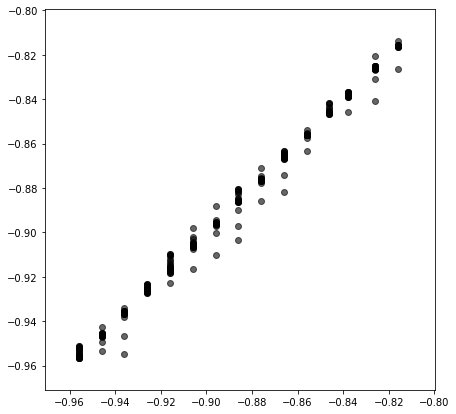

In [ ]:
Predict_pressure_sc = Model_Pressure.predict(Data_Pressure_sc[X_Pressure])
Predict_pressure = Predict_pressure_sc * Std_Pressure[Y_Pressure].values + Mean_Pressure[Y_Pressure].values
# Predict_sample2 = Absolute_Leaky_Relu(Predict_sample)
Actual_pressure = Data_Pressure[Y_Pressure].values

plt.figure(figsize=(7,7))
plt.scatter(Actual_pressure, Predict_pressure, c='k', alpha=0.6)
plot_min = np.minimum(Actual_pressure.min(), Predict_pressure.min())
plot_max = np.maximum(Actual_pressure.max(), Predict_pressure.max())
plot_len = plot_max - plot_min

plot_low = plot_min - plot_len*0.1
plot_upp = plot_max + plot_len*0.1

plt.xlim(plot_low, plot_upp)
plt.ylim(plot_low, plot_upp)
plt.show()

# Sequence-to-sequence RNN

## Load plant data 

In [ ]:
Name_Data_Plant = f"Final Data Plant"
Data_Plant = LoadFile(Path_Data, Name_Data_Plant, 'csv')

Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data Plant.csv
Dataset shape: (83701, 17)


In [ ]:
Data_Plant_for_Pressure_sc = (Data_Plant[X_Pressure]-Mean_Pressure[X_Pressure])/Std_Pressure[X_Pressure]
Data_Plant_Pressure_sc = Model_Pressure.predict(Data_Plant_for_Pressure_sc)
Data_Plant_Pressure = Data_Plant_Pressure_sc*Std_Pressure[Y_Pressure].values + Mean_Pressure[Y_Pressure].values

Data_Plant["PT-3061-3"] = Data_Plant_Pressure

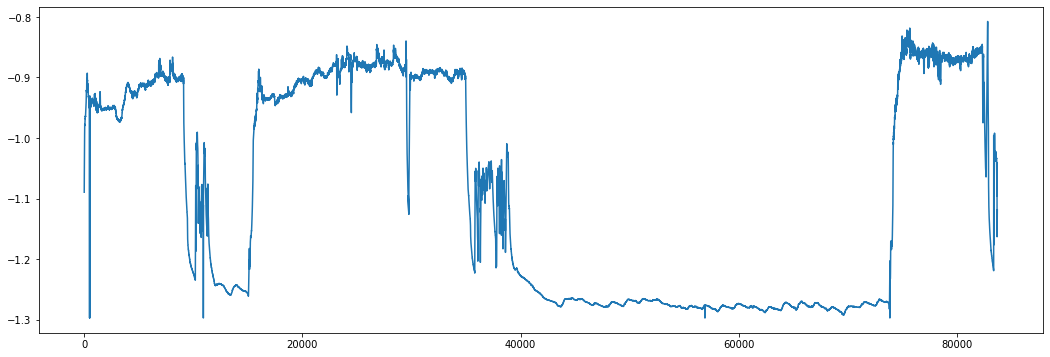

In [ ]:
Data_Plant["PT-3061-3"].plot(figsize=(18,6))

In [ ]:
Var_Process = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "LT-3061-2", "FT-3062-1", "TT-3061-3", "TT-3061-4", "PT-3061-3"]
             #FD RATE     #STM RATE    #RFLX RATE   #LVL DGR     #PRDT RATE   #MDL TEMP    #BTM TEMP    #BTM PRSR
Var_Sensor = ["TT-3061-3", "TT-3061-4", "PT-3061-3"]         

Num_Process = len(Var_Process)
Num_Sensor = len(Var_Sensor)

Data_Plant = Data_Plant[Var_Process]

## 데이터 전처리

### On-data Clustering

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

def KmeanTest(data, num_test = 10):
    num_clusters = list(range(1,num_test))
    inertia_list = []
    for i in num_clusters:
        model = KMeans(n_clusters=i)
        model.fit(data)
        inertia_list.append(model.inertia_)
    
    plt.figure(figsize=(12,6))
    plt.plot(num_clusters, inertia_list, 'bo-')
    plt.xlabel("Number of Clusters(k)", fontdict=Font_xlabel)
    plt.ylabel("Inertia", fontdict=Font_ylabel)

def KmeanCluster(data, num_cluster, target_columns=False, colors=False, random_state=False):
    data_copy = data.copy()

    if target_columns:
        data_target = data_copy[target_columns]
    else:
        data_target = data_copy

    mean_data = data_target.mean(axis=0)
    std_data = data_target.std(axis=0)
    data_sc = (data_target - mean_data)/std_data

    model_cluster = KMeans(n_clusters = num_cluster, random_state=random_state)
    model_cluster.fit(data_sc)

    column_labels = model_cluster.labels_
    data_copy['Cluster'] = column_labels

    count_cluster = Counter(column_labels)
    count_sort = sorted(count_cluster.items(), reverse = True, key = lambda x: x[1])
    cluster_sorted = [x[0] for x in count_sort]
    

    color_list = ["blue", "forestgreen", "red", "gray", "orange", "brown", "lightcoral", "darkkhaki", "ivory"]
    if colors:
        color_list = colors

    column_color = []

    for row in data_copy['Cluster']:
        for i, cluster in enumerate(cluster_sorted):
            if row == cluster:
                column_color.append(color_list[i])
    
    data_copy['Color'] = column_color
    
    return data_copy, model_cluster

def KmeanPlot(data_clust, variables=False, figsize=6):
    data_copy = data_clust.copy()
    num_plot = len(data_copy.columns)

    if variables:
        num_plot = len(variables)
        data_copy = data_copy[variables]

    plt.rcParams['axes.facecolor'] = 'w'

    color_list = data_copy['Color'].unique()

    plot_var = data_copy.columns[:-2]
    plt.figure(figsize=(figsize*len(plot_var), figsize))
    for i, var in enumerate(plot_var):
        plt.subplot(1, len(plot_var), i+1)
        for j, color in enumerate(color_list):
            data_plot = data_copy.loc[ data_copy['Color'] == color]
            plt.scatter(data_plot.index, data_plot[var], color = color, s = 10, alpha = 0.8)
        
        plt.title(var, fontdict = Font_Title)
        plt.grid(True, color = 'gray', linestyle='--', alpha = 0.5)
    
    # plt.tight_layout()

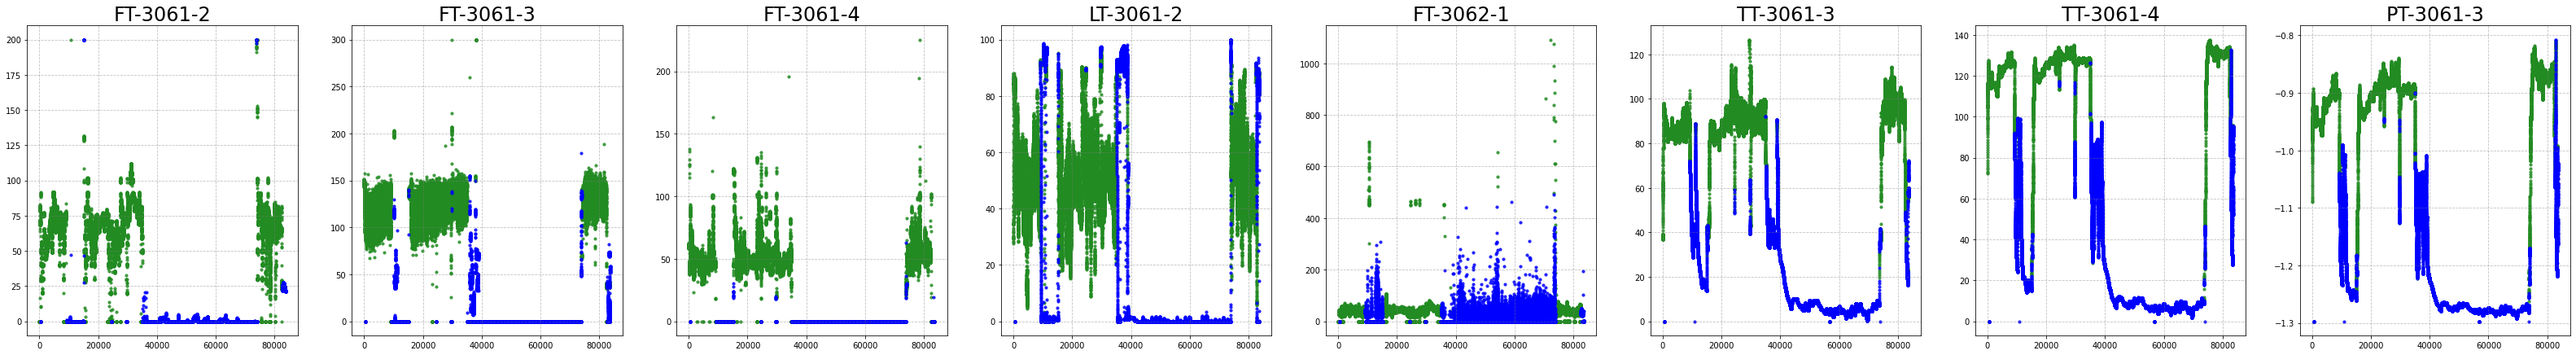

In [ ]:
target_data = Data_Plant
n_cluster = 2
random_state = 10

data_clust, _ = KmeanCluster(target_data, num_cluster=n_cluster, target_columns=False, random_state=random_state)
KmeanPlot(data_clust, figsize=7)

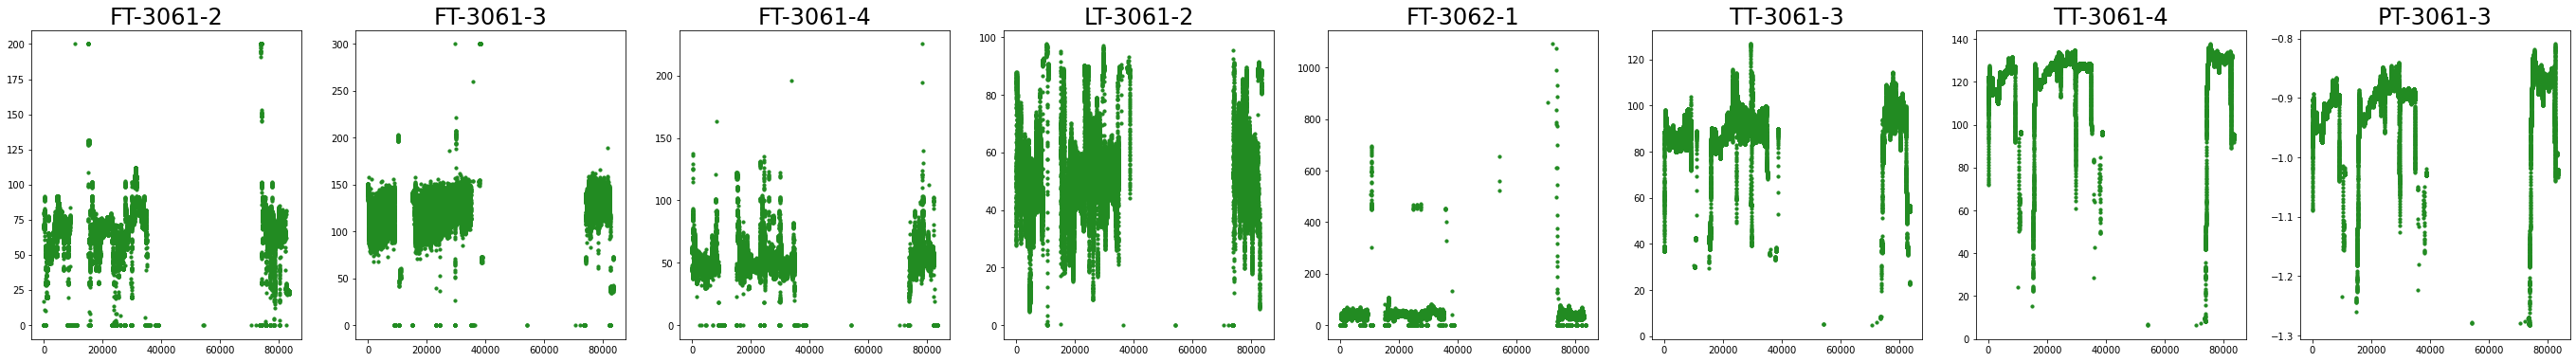

In [ ]:
on_color = 'forestgreen'
# on_color = 'blue'

data_on = data_clust.loc[data_clust["Color"] == on_color]
plot_var = Var_Process
plt.figure(figsize=(len(plot_var)*6,6))
for i, var in enumerate(plot_var):
    plt.subplot(1, len(plot_var), i+1)
    plt.scatter(data_on.index, data_on[var], color = on_color, s=10)
    plt.title(var, fontdict = Font_Title)

Data_Plant_On = data_on

In [ ]:
Data_Plant_On

FT-3061-2  FT-3061-3  FT-3061-4  ...  PT-3061-3  Cluster        Color
0            0.0      144.8       62.0  ...  -1.089499        1  forestgreen
1            0.0      151.2       60.4  ...  -1.087855        1  forestgreen
2            0.0      145.4       58.6  ...  -1.085850        1  forestgreen
3            0.0      147.2       59.6  ...  -1.082884        1  forestgreen
4            0.0      150.4       61.0  ...  -1.079597        1  forestgreen
...          ...        ...        ...  ...        ...      ...          ...
83558       22.4       38.5        0.0  ...  -1.023675        1  forestgreen
83559       22.4       38.4        0.0  ...  -1.023075        1  forestgreen
83560       22.4       39.7        0.0  ...  -1.023075        1  forestgreen
83561       22.5       39.7        0.0  ...  -1.022754        1  forestgreen
83562       22.4       40.1        0.0  ...  -1.022795        1  forestgreen

[38043 rows x 10 columns]

### Outliers removal by Z-score

In [ ]:
def ZScore(data, z_index, target_columns=False):
    data_copy = data.copy()

    if target_columns:
        data_target = data_copy[target_columns]
    else:
        data_target = data_copy

    mean = data_target.mean(axis=0)
    std = data_target.std(axis=0)
    zscore = (data_target - mean) / std

    condition_outlier = (zscore < -z_index) | (zscore > z_index)
    boolean_outlier = condition_outlier.any(axis=1)
    index_outlier = boolean_outlier.loc[boolean_outlier == True].index
    num_outlier = len(index_outlier)

    data_outliers = data_target.loc[index_outlier]
    data_z = data_target.drop(index_outlier)

    plot_var = data_z.columns
    plt.figure(figsize=(len(plot_var)*6,6))
    for i, var in enumerate(plot_var):
        plt.subplot(1, len(plot_var), i+1)
        plt.scatter(data_outliers.index, data_outliers[var], color='red', s=10)
        plt.scatter(data_z.index, data_z[var], color = 'blue', s=10)
        plt.title(var, fontdict = Font_Title)

    print(num_outlier, "outliers are removed")

    return data_z

2481 outliers are removed
1814 outliers are removed
2129 outliers are removed


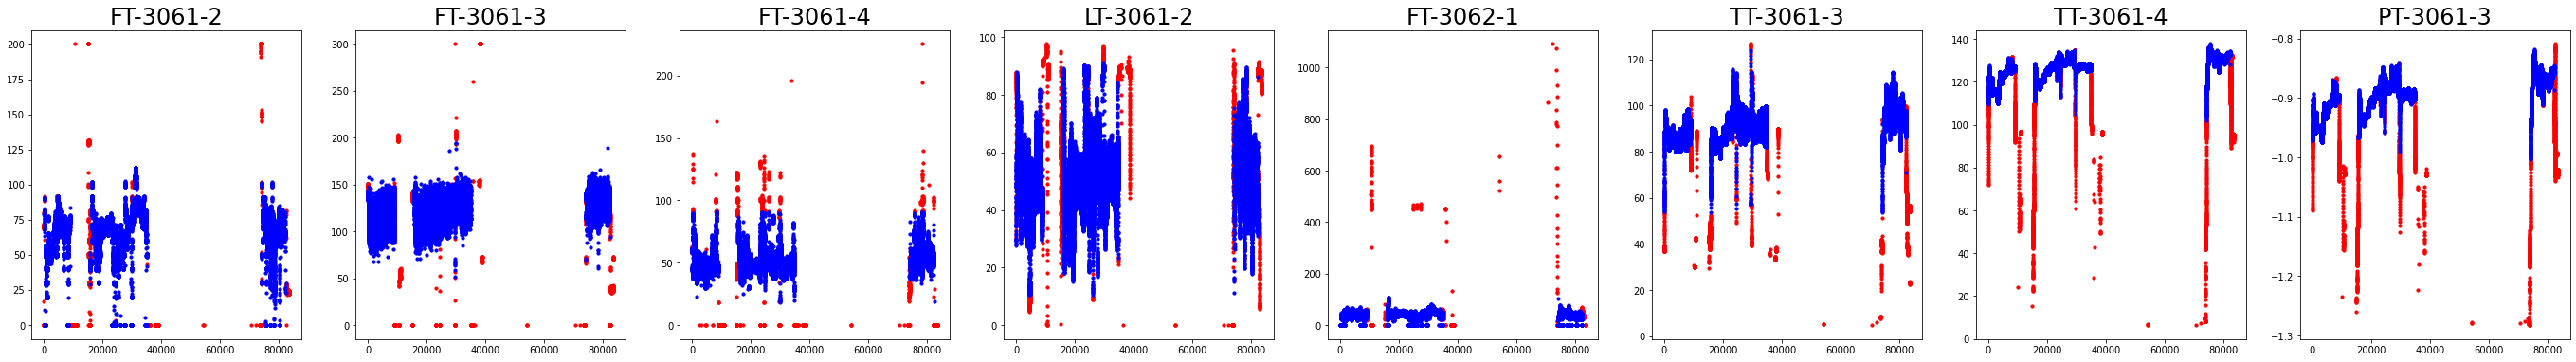

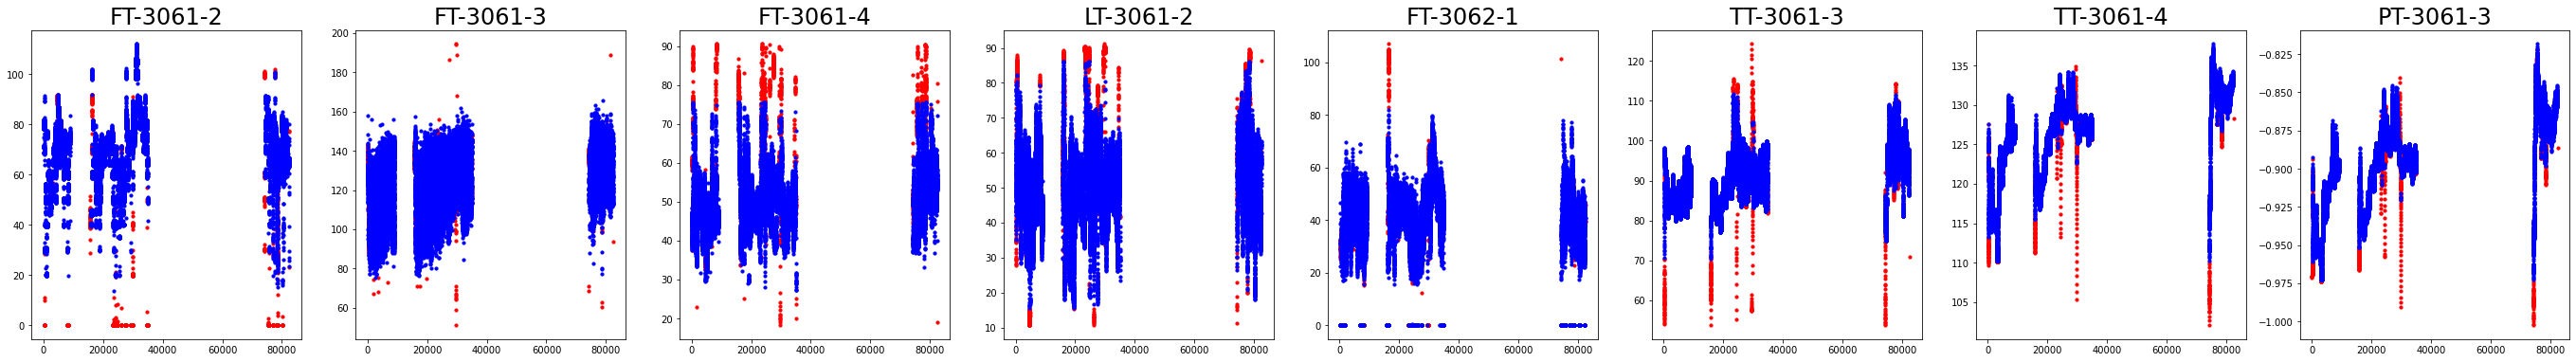

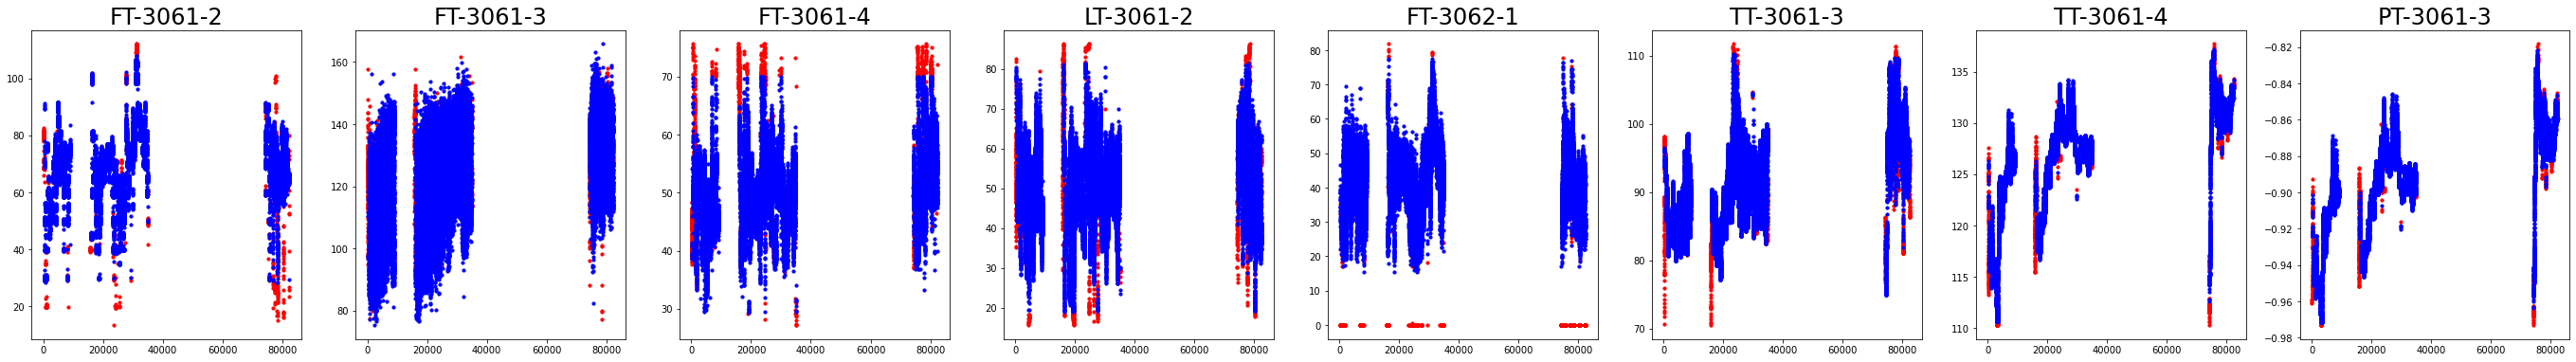

In [ ]:
target_data = Data_Plant_On
z_index = 3.0
target_columns = Var_Process
num_iteration = 3

for i in range(num_iteration):
    if not i:
        data_z = ZScore(target_data, z_index, target_columns)

    else:
        data_z = ZScore(data_z, z_index, target_columns)

In [ ]:
Data_Plant_On_Z = data_z

### 연속데이터 분류

In [ ]:
def ContsDatasets(data, min_length = 50):
    data_copy = data.copy()

    range_cts_list = []

    for i in range(len(data_copy)):
        if not i:
            index_start = data_copy.index[i]
            index_check = index_start
            index_check += 1

        elif index_check == data_copy.index[i]:
            index_check += 1

        else:
            index_end = data_copy.index[i-1]
            if index_end - index_start > min_length:
                range_cts_list.append(range(index_start, index_end))
            index_start = data_copy.index[i]
            index_check = index_start
            index_check += 1
    print(range_cts_list)
    data_cts_list = []

    for range_cts in range_cts_list:
        data_cts_list.append(data_copy.loc[range_cts])

    return data_cts_list

In [ ]:
target_data = Data_Plant_On_Z
min_length = 500

data_cts = ContsDatasets(target_data, min_length = min_length)

len(data_cts)

[range(1915, 2589), range(2591, 3109), range(3608, 4455), range(4831, 6791), range(7151, 7726), range(8277, 9094), range(16649, 17512), range(17691, 18648), range(19894, 23131), range(26217, 26938), range(27637, 29437), range(29969, 30949), range(31204, 33629), range(76090, 76957), range(78639, 80184), range(80610, 81591), range(81593, 82184)]


17

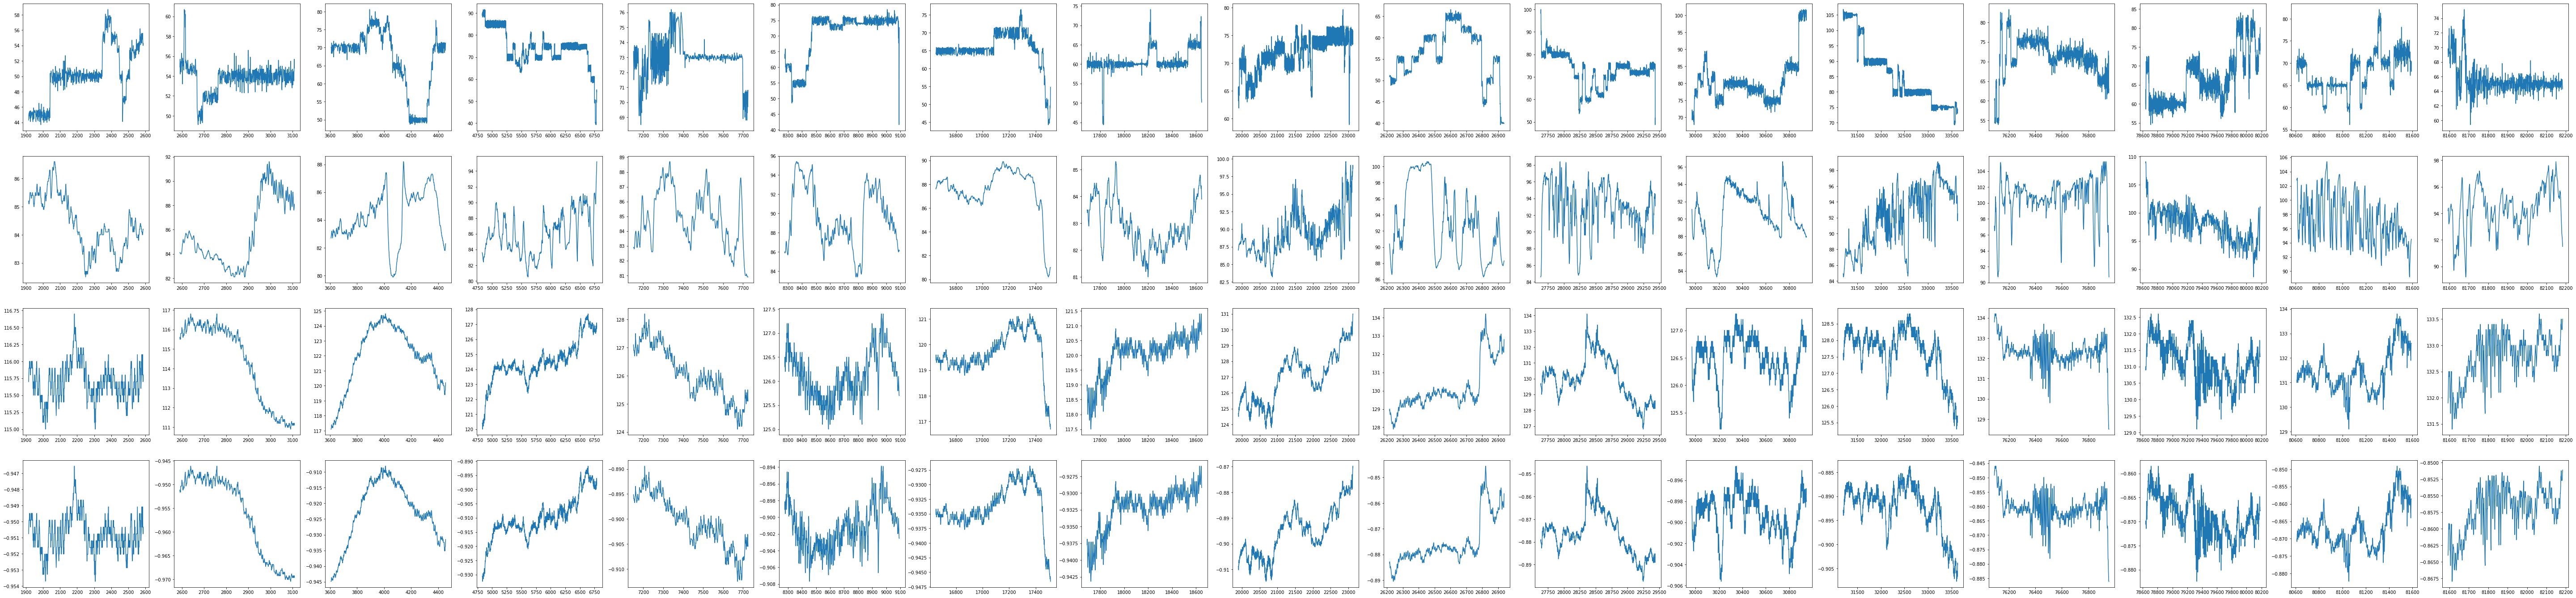

In [ ]:
data_plot = data_cts
var_plot = ["FT-3061-2", "TT-3061-3", "TT-3061-4", "PT-3061-3"]

fig_size = 6
plt.figure(figsize=(fig_size*len(data_plot), fig_size*len(var_plot)))
for i, var in enumerate(var_plot):
    for j, data in enumerate(data_plot):
        plt.subplot(len(var_plot), len(data_plot), len(data_plot)*i+j+1)
        plt.plot(data.index, data[var])
plt.show()

In [ ]:
Data_Plant_On_Z_Cts = data_cts

### DENOISE by Exponentially Weighted Averages(EWA)

In [ ]:
def EWA(data, alpha, target_columns=False):

    data_copy = data.copy()

    if target_columns:
        target_data = data_copy[target_columns]
    else:
        target_data = data_copy

    for index in range(len(data)):
        if not index:
            data_denoise = target_data.iloc[[index]]
        else:
            ewa = alpha*data_denoise.iloc[index-1] + (1-alpha)*target_data.iloc[index]
            data_denoise = data_denoise.append(ewa, ignore_index=True)

    if target_columns:
        data_copy[target_columns] = data_denoise
    else:
        data_copy = data_denoise

    return data_copy

In [ ]:
# EWA for lists

target_data = Data_Plant_On_Z_Cts
alpha = 0.9
Name_Data_EWA = f"Final Data for Modeling"

Update = False
data_ewa_list = []
if not FileExist(Path_Data, Name_Data_EWA, 'model') or Update:
    CreateFolder(f"{Path_Data}/{Name_Data_EWA}")

    for i, data in enumerate(target_data):
        data_ewa = EWA(data, alpha)
        data_ewa_list.append(data_ewa)
        SaveFile(data_ewa, f"{Path_Data}/{Name_Data_EWA}", f"Series {i+1}", 'csv')
else:
    for i in range(17):
        data_ewa = LoadFile(f"{Path_Data}/{Name_Data_EWA}", f"Series {i+1}", 'csv')
        data_ewa_list.append(data_ewa)

Data_Plant_On_Z_Cts_EWA = data_ewa_list

Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 1.csv
Dataset shape: (674, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 2.csv
Dataset shape: (518, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 3.csv
Dataset shape: (847, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 4.csv
Dataset shape: (1960, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 5.csv
Dataset shape: (575, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 6.csv
Dataset shape: (817, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 7.csv
Dataset shape: (863, 8)
Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data for Modeling/Series 8.csv
Dataset shape: (957, 8)
Dataset is load

In [ ]:
data_plot = Data_Plant_On_Z_Cts
var_plot = Var_Process

fig_size = 6
plt.figure(figsize=(fig_size*len(data_plot), fig_size*len(var_plot)))
for i, var in enumerate(var_plot):
    for j, data in enumerate(data_plot):
        plt.subplot(len(var_plot), len(data_plot), len(data_plot)*i+j+1)
        plt.plot(data.index, data[var])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data_plot = Data_Plant_On_Z_Cts_EWA
var_plot = Var_Process

fig_size = 6
plt.figure(figsize=(fig_size*len(data_plot), fig_size*len(var_plot)))
for i, var in enumerate(var_plot):
    for j, data in enumerate(data_plot):
        plt.subplot(len(var_plot), len(data_plot), len(data_plot)*i+j+1)
        plt.plot(data.index, data[var])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

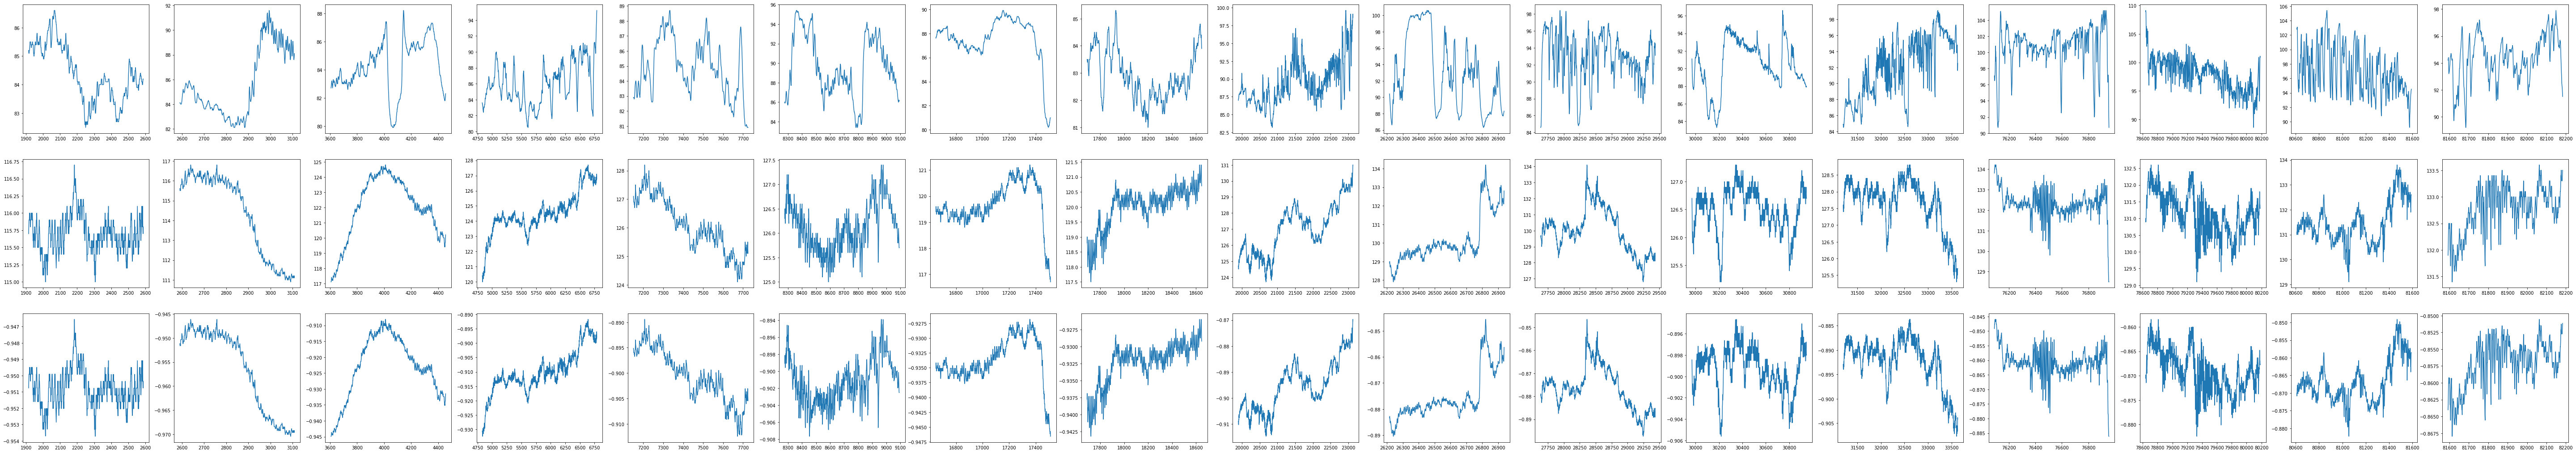

In [ ]:
data_plot = Data_Plant_On_Z_Cts
var_plot = Var_Sensor

fig_size = 6
plt.figure(figsize=(fig_size*len(data_plot), fig_size*len(var_plot)))
for i, var in enumerate(var_plot):
    for j, data in enumerate(data_plot):
        plt.subplot(len(var_plot), len(data_plot), len(data_plot)*i+j+1)
        plt.plot(data.index, data[var])
plt.show()

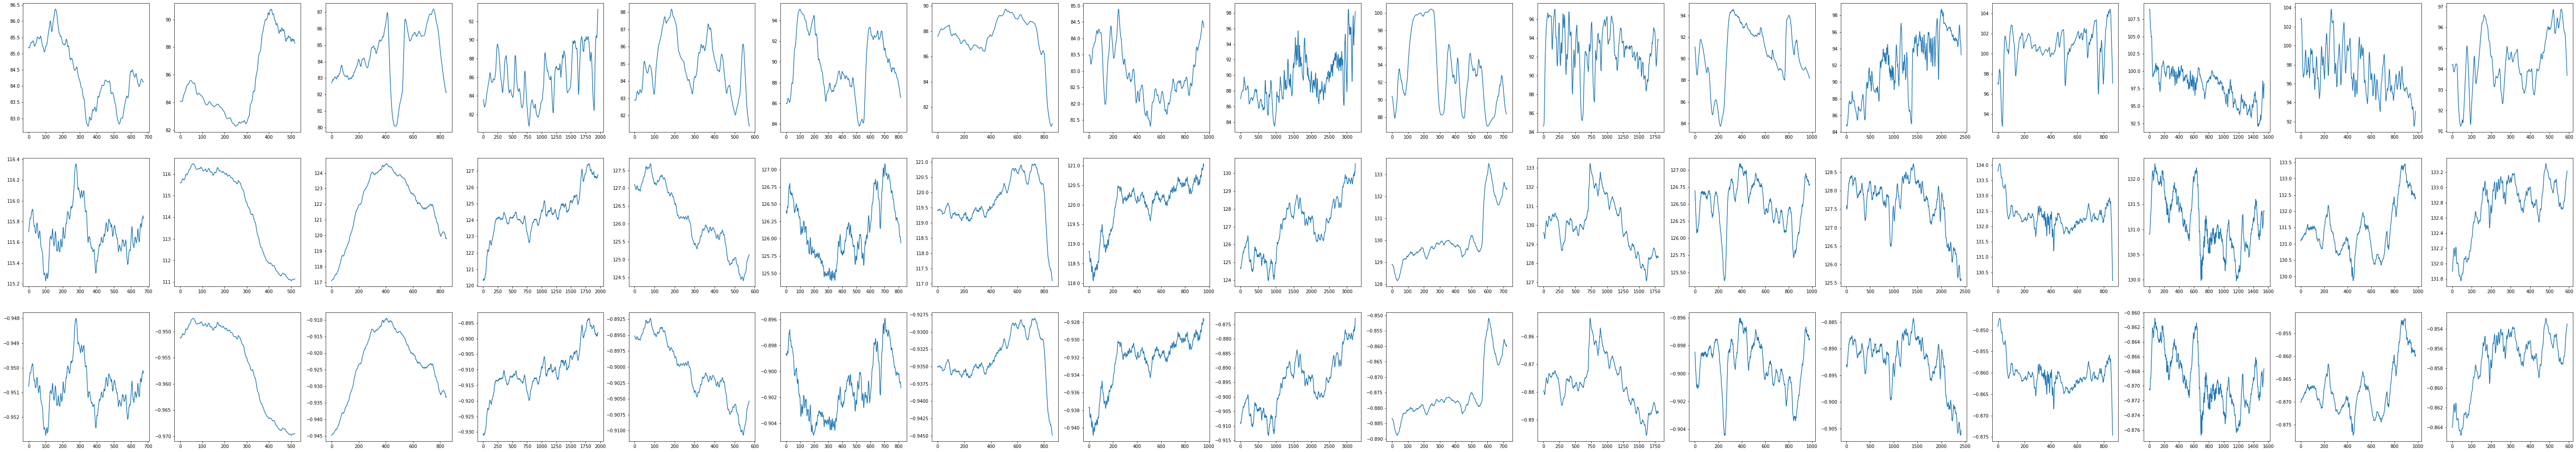

In [ ]:
data_plot = Data_Plant_On_Z_Cts_EWA
var_plot = Var_Sensor

fig_size = 6
plt.figure(figsize=(fig_size*len(data_plot), fig_size*len(var_plot)))
for i, var in enumerate(var_plot):
    for j, data in enumerate(data_plot):
        plt.subplot(len(var_plot), len(data_plot), len(data_plot)*i+j+1)
        plt.plot(data.index, data[var])
plt.show()

## Train/Test

In [ ]:
import random

def ListTrainTestSplitRandom(data_list, test_ratio=0.2, seed=42, except_list=[]):
    data_copy = data_list.copy()

    test_list=[]
    while(len(test_index) <= int(len(data_copy)*test_ratio)):
        random.seed(seed)
        num = random.randint(0, len(data_copy)-1)
        if (num not in test_index) and (num not in except_list):
            test_index.append(num)
        seed += 1
    test_index = sorted(test_index, reverse=True)
    
    print(f"Train {len(data_copy)-len(test_index)} Test {len(test_index)}")
    print(f"Test Index: {test_index}")

    for num_pop in test_index:
        test_list.append(data_copy.pop(num_pop))

    return data_copy, test_list

def ListTrainTestSplitSemiRandom(data_list, test_ratio=0.2, seed=42):
    data_copy = data_list.copy()

    test_list=[]
    test_index = []
    min_max_list = []
    for i, var in enumerate(data_list[0].columns):
        for j, data in enumerate(data_list):
            min = data[var].min()
            max = data[var].max()

            if not j:
                global_min = min
                global_max = max

                index_min = j
                index_max = j

            elif global_min > min:
                global_min = min
                index_min = j

            elif global_max < max:
                global_max = max
                index_max = j

        min_max_list = min_max_list + [index_min, index_max]

    except_list = list(set(min_max_list))        
     
    while(len(test_index) <= int(len(data_copy)*test_ratio)):
        random.seed(seed)
        num = random.randint(0, len(data_copy)-1)
        if (num not in test_index) and (num not in except_list):
            test_index.append(num)
        seed += 1
    test_index = sorted(test_index, reverse=True)
    
    print(f"Train {len(data_copy)-len(test_index)} Test {len(test_index)}")
    print(f"Test Index: {test_index}")

    for num_pop in test_index:
        test_list.append(data_copy.pop(num_pop))

    return data_copy, test_list

def ListTrainTestSplit(data, test_index):
    data_copy = data.copy()

    test_list=[]

    test_index = sorted(test_index, reverse=True)

    print(f"Train {len(data_copy)-len(test_index)} Test {len(test_index)}")
    print(f"Test Index: {test_index}")
    
    for num_pop in test_index:
        test_list.append(data_copy.pop(num_pop))

    return data_copy, test_list

In [ ]:
# by random
target_list = Data_Plant_On_Z_Cts_EWA
test_ratio = 0.10
seed = 10

List_Train, List_Test = ListTrainTestSplitSemiRandom(target_list, test_ratio=test_ratio, seed=seed)

Train 15 Test 2
Test Index: [15, 8]


In [ ]:
target_data = List_Train
data_concat = pd.concat([target_data[x] for x in range(len(target_data))])

Mean_Plant = data_concat.mean(axis=0)
Std_Plant = data_concat.std(axis=0)

data_concat.describe()

FT-3061-2     FT-3061-3  ...     TT-3061-4     PT-3061-3
count  16140.000000  16140.000000  ...  16140.000000  16140.000000
mean      70.649186    123.923688  ...    126.104285     -0.898597
std       11.457630      8.206950  ...      4.953352      0.027283
min       40.966130     99.501711  ...    111.063638     -0.969799
25%       63.403608    117.282956  ...    123.819629     -0.914054
50%       71.316854    125.708672  ...    126.856616     -0.897208
75%       75.541331    130.679194  ...    130.035922     -0.876273
max      106.800000    149.700000  ...    134.046180     -0.847207

[8 rows x 8 columns]

In [ ]:
target_data = List_Test
data_concat = pd.concat([target_data[x] for x in range(len(target_data))])
data_concat.describe()

FT-3061-2    FT-3061-3  ...    TT-3061-4    PT-3061-3
count  4218.000000  4218.000000  ...  4218.000000  4218.000000
mean     70.875974   122.940472  ...   128.022738    -0.888871
std       3.573425     4.929329  ...     2.350478     0.014786
min      59.902922   106.549205  ...   123.971911    -0.913225
25%      69.470264   119.347378  ...   126.195926    -0.900365
50%      71.066974   121.553475  ...   127.638725    -0.892236
75%      73.972368   125.483495  ...   129.783859    -0.877892
max      79.286850   136.697279  ...   133.460064    -0.851700

[8 rows x 8 columns]

### Scaling

In [ ]:
List_Train_sc = []
List_Test_sc = []

for data in List_Train:
    data_sc = (data - Mean_Plant)/Std_Plant
    List_Train_sc.append(data_sc)

for data in List_Test:
    data_sc = (data - Mean_Plant)/Std_Plant
    List_Test_sc.append(data_sc)

## 시리즈 데이터 생성

In [ ]:
def MSMOSeriesData(data_history, data_future, index_start, index_end, history_length, future_length, step):
    data = []
    labels = []

    index_start = index_start + history_length
    if index_end is None:
        index_end = len(data_history) - future_length

    for i in range(index_start, index_end):
        indices_x = range(i-history_length, i, step)
        data.append(data_history[indices_x])

        if future_length == 1:
            labels.append(data_future[i])
        else:
            labels.append(data_future[i : i+future_length : step])

    return np.array(data), np.array(labels)

In [ ]:
step = 1
history_window = step*30
future_window = step*20

Var_history = Var_Process
Var_future = Var_Sensor

In [ ]:
for i, data_sc in enumerate(List_Train_sc):
    history_data_sc, future_data_sc = MSMOSeriesData(data_sc[Var_history].values, data_sc[Var_future].values,
                                                     0, None,
                                                     history_window, future_window, step)
    if not i:
        History_Train_sc = history_data_sc
        Future_Train_sc = future_data_sc
    else:
        History_Train_sc = np.concatenate([History_Train_sc, history_data_sc], axis=0)
        Future_Train_sc = np.concatenate([Future_Train_sc, future_data_sc], axis=0)

for i, data_sc in enumerate(List_Test_sc):
    history_data_sc, future_data_sc = MSMOSeriesData(data_sc[Var_history].values, data_sc[Var_future].values,
                                                     0, None,
                                                     history_window, future_window, step)
    if not i:
        History_Test_sc = history_data_sc
        Future_Test_sc = future_data_sc
    else:
        History_Test_sc = np.concatenate([History_Test_sc, history_data_sc], axis=0)
        Future_Test_sc = np.concatenate([Future_Test_sc, future_data_sc], axis=0)

print ("(the Number of Dataset, Length of History, Features of History)",
       f"History Train: {History_Train_sc.shape}",
       f"History Test: {History_Test_sc.shape}",
       "(the Number of Dataset, Length of Future, Features of Future)",
       f"Future Train MSMO: {Future_Train_sc.shape}", 
       f"Future Test MSMO: {Future_Test_sc.shape}", 
       sep='\n')

(the Number of Dataset, Length of History, Features of History)
History Train: (15390, 30, 8)
History Test: (4118, 30, 8)
(the Number of Dataset, Length of Future, Features of Future)
Future Train MSMO: (15390, 20, 3)
Future Test MSMO: (4118, 20, 3)


## Performance index: R2 and RMSE

In [ ]:
def R_Squared(prediction, actual):    
    actual_mean = np.mean(actual, axis=0)
    SSR = np.sum( (prediction - actual)**2 , axis=0)    
    RSS = np.sum( (prediction - actual_mean )**2, axis=0 )
    TSS = np.sum( (actual - actual_mean )**2, axis=0 )    
    
    R_square = 1 - SSR/TSS
    return R_square
    
def RMSE(prediction, actual):
    rmse = np.sqrt(np.mean((prediction - actual)**2, axis=0))

    return rmse

## Baseline modeling

### Direct RNNs

In [ ]:
def DirectRNN(num_x, num_y, num_layers, num_neurons):

    model = keras.Sequential()
    model.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=[None, num_x]))

    for i in range(num_layers-2):
        model.add(SimpleRNN(num_neurons, return_sequences=True))

    model.add(SimpleRNN(num_y))

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)
    return model

In [ ]:
# List_Model_RNN = []
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

# time_start = time.time()
# for time_step in range(future_window):
#         history_train_sc = History_Train_sc
#         history_test_sc = History_Test_sc
        
#         future_train_sc = Future_Train_sc[:,time_step,:]
#         future_test_sc = Future_Test_sc[:,time_step,:]

#         model_rnn = DirectRNN(Num_Process, Num_Sensor, 3, 10)
#         history = model_rnn.fit(history_train_sc, future_train_sc,
#                                       epochs = 10000, callbacks=[early_stopping_cb],
#                                       verbose = 2, batch_size=128,
#                                       validation_data=(history_test_sc, future_test_sc))
        
#         model_rnn.save(f'{Path_Modeling}/Final Direct RNN Model/Model {time_step+1}')
#         List_Model_RNN.append(model_rnn)

# time_end = time.time()
# Training_Time = time_end - time_start

# np.set_printoptions(precision=2)
# print(f"{Training_Time} secs were taken")
# CreateFolder(f"{Path_Modeling}/Final Direct RNN Model/{Training_Time} secs were taken")

In [ ]:
# List_Model_RNN = []
# for time_step in range(future_window):
#         List_Model_RNN.append(LoadFile(Path_Modeling, f'Final RNN Model/Model {time_step+1}', 'model'))

In [ ]:
# for time_step in range(future_window):
#     history_test_sc = History_Test_sc

#     if not time_step:
#         Predict_DirRNN_sc = List_Model_RNN[time_step].predict(history_test_sc)[:,np.newaxis,:]

#     else:
#         Predict_DirRNN_sc = np.concatenate([Predict_DirRNN_sc, List_Model_RNN[time_step].predict(history_test_sc)[:,np.newaxis,:]], axis=1)

In [ ]:
# R2_DirRNN_sc = R_Squared(Predict_DirRNN_sc, Future_Test_sc).mean(axis=1)
# RMSE_DirRNN_sc = RMSE(Predict_DirRNN_sc, Future_Test_sc).mean(axis=1)

In [ ]:
# print("R2:", R2_DirRNN_sc)
# print("RMSE:", RMSE_DirRNN_sc)

### Direct LSTMs

In [ ]:
def DirectLSTM(num_x, num_y, num_layers, num_neurons):

    model = keras.Sequential()
    model.add(LSTM(num_neurons, return_sequences=True, input_shape=[None, num_x]))

    for i in range(num_layers-2):
        model.add(LSTM(num_neurons, return_sequences=True))
        
    model.add(LSTM(num_neurons))
    model.add(Dense(num_y))

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)
    return model

In [ ]:
# List_Model_LSTM = []
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

# time_start = time.time()
# for time_step in range(future_window):
#         history_train_sc = History_Train_sc
#         history_test_sc = History_Test_sc
        
#         future_train_sc = Future_Train_sc[:,time_step,:]
#         future_test_sc = Future_Test_sc[:,time_step,:]

#         model_lstm = DirectLSTM(Num_Process, Num_Sensor, 3, 10)
#         history = model_lstm.fit(history_train_sc, future_train_sc,
#                                       epochs = 10000, callbacks=[early_stopping_cb],
#                                       verbose = 2, batch_size=128,
#                                       validation_data=(history_test_sc, future_test_sc))
        
#         model_lstm.save(f'{Path_Modeling}/Final Direct LSTM Model 3 10/Model {time_step+1}')
#         List_Model_LSTM.append(model_lstm)

# time_end = time.time()
# Training_Time = time_end - time_start

# np.set_printoptions(precision=2)
# print(f"{Training_Time} secs were taken")
# CreateFolder(f"{Path_Modeling}/Final Direct LSTM Model/{Training_Time} secs were taken")

Epoch 1/10000
121/121 - 6s - loss: 0.4919 - val_loss: 0.1260
Epoch 2/10000
121/121 - 1s - loss: 0.0915 - val_loss: 0.0522
Epoch 3/10000
121/121 - 1s - loss: 0.0385 - val_loss: 0.0349
Epoch 4/10000
121/121 - 1s - loss: 0.0197 - val_loss: 0.0207
Epoch 5/10000
121/121 - 1s - loss: 0.0128 - val_loss: 0.0155
Epoch 6/10000
121/121 - 1s - loss: 0.0100 - val_loss: 0.0134
Epoch 7/10000
121/121 - 1s - loss: 0.0081 - val_loss: 0.0113
Epoch 8/10000
121/121 - 1s - loss: 0.0067 - val_loss: 0.0097
Epoch 9/10000
121/121 - 1s - loss: 0.0057 - val_loss: 0.0084
Epoch 10/10000
121/121 - 1s - loss: 0.0048 - val_loss: 0.0071
Epoch 11/10000
121/121 - 1s - loss: 0.0041 - val_loss: 0.0061
Epoch 12/10000
121/121 - 1s - loss: 0.0035 - val_loss: 0.0054
Epoch 13/10000
121/121 - 1s - loss: 0.0031 - val_loss: 0.0047
Epoch 14/10000
121/121 - 1s - loss: 0.0027 - val_loss: 0.0042
Epoch 15/10000
121/121 - 1s - loss: 0.0024 - val_loss: 0.0036
Epoch 16/10000
121/121 - 1s - loss: 0.0021 - val_loss: 0.0035
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 1/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 1/assets


Epoch 1/10000
121/121 - 5s - loss: 0.4234 - val_loss: 0.0868
Epoch 2/10000
121/121 - 1s - loss: 0.1084 - val_loss: 0.0385
Epoch 3/10000
121/121 - 1s - loss: 0.0534 - val_loss: 0.0316
Epoch 4/10000
121/121 - 1s - loss: 0.0263 - val_loss: 0.0247
Epoch 5/10000
121/121 - 1s - loss: 0.0181 - val_loss: 0.0208
Epoch 6/10000
121/121 - 1s - loss: 0.0142 - val_loss: 0.0178
Epoch 7/10000
121/121 - 1s - loss: 0.0114 - val_loss: 0.0154
Epoch 8/10000
121/121 - 1s - loss: 0.0096 - val_loss: 0.0144
Epoch 9/10000
121/121 - 1s - loss: 0.0080 - val_loss: 0.0124
Epoch 10/10000
121/121 - 1s - loss: 0.0068 - val_loss: 0.0109
Epoch 11/10000
121/121 - 1s - loss: 0.0058 - val_loss: 0.0098
Epoch 12/10000
121/121 - 1s - loss: 0.0051 - val_loss: 0.0089
Epoch 13/10000
121/121 - 1s - loss: 0.0045 - val_loss: 0.0085
Epoch 14/10000
121/121 - 1s - loss: 0.0040 - val_loss: 0.0073
Epoch 15/10000
121/121 - 1s - loss: 0.0036 - val_loss: 0.0066
Epoch 16/10000
121/121 - 1s - loss: 0.0032 - val_loss: 0.0061
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 2/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 2/assets


Epoch 1/10000
121/121 - 5s - loss: 0.3822 - val_loss: 0.0583
Epoch 2/10000
121/121 - 1s - loss: 0.0636 - val_loss: 0.0343
Epoch 3/10000
121/121 - 1s - loss: 0.0263 - val_loss: 0.0244
Epoch 4/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0206
Epoch 5/10000
121/121 - 1s - loss: 0.0133 - val_loss: 0.0180
Epoch 6/10000
121/121 - 1s - loss: 0.0110 - val_loss: 0.0157
Epoch 7/10000
121/121 - 1s - loss: 0.0095 - val_loss: 0.0140
Epoch 8/10000
121/121 - 1s - loss: 0.0083 - val_loss: 0.0132
Epoch 9/10000
121/121 - 1s - loss: 0.0074 - val_loss: 0.0113
Epoch 10/10000
121/121 - 1s - loss: 0.0066 - val_loss: 0.0106
Epoch 11/10000
121/121 - 1s - loss: 0.0059 - val_loss: 0.0095
Epoch 12/10000
121/121 - 1s - loss: 0.0053 - val_loss: 0.0088
Epoch 13/10000
121/121 - 1s - loss: 0.0048 - val_loss: 0.0083
Epoch 14/10000
121/121 - 1s - loss: 0.0045 - val_loss: 0.0077
Epoch 15/10000
121/121 - 1s - loss: 0.0041 - val_loss: 0.0072
Epoch 16/10000
121/121 - 1s - loss: 0.0038 - val_loss: 0.0066
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 3/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 3/assets


Epoch 1/10000
121/121 - 6s - loss: 0.2881 - val_loss: 0.0747
Epoch 2/10000
121/121 - 1s - loss: 0.0930 - val_loss: 0.0433
Epoch 3/10000
121/121 - 1s - loss: 0.0433 - val_loss: 0.0401
Epoch 4/10000
121/121 - 1s - loss: 0.0235 - val_loss: 0.0318
Epoch 5/10000
121/121 - 1s - loss: 0.0166 - val_loss: 0.0264
Epoch 6/10000
121/121 - 1s - loss: 0.0133 - val_loss: 0.0224
Epoch 7/10000
121/121 - 1s - loss: 0.0111 - val_loss: 0.0199
Epoch 8/10000
121/121 - 1s - loss: 0.0095 - val_loss: 0.0178
Epoch 9/10000
121/121 - 1s - loss: 0.0084 - val_loss: 0.0159
Epoch 10/10000
121/121 - 1s - loss: 0.0075 - val_loss: 0.0141
Epoch 11/10000
121/121 - 1s - loss: 0.0068 - val_loss: 0.0139
Epoch 12/10000
121/121 - 1s - loss: 0.0062 - val_loss: 0.0118
Epoch 13/10000
121/121 - 1s - loss: 0.0058 - val_loss: 0.0116
Epoch 14/10000
121/121 - 1s - loss: 0.0053 - val_loss: 0.0106
Epoch 15/10000
121/121 - 1s - loss: 0.0049 - val_loss: 0.0095
Epoch 16/10000
121/121 - 1s - loss: 0.0046 - val_loss: 0.0089
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 4/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 4/assets


Epoch 1/10000
121/121 - 8s - loss: 0.4164 - val_loss: 0.0660
Epoch 2/10000
121/121 - 1s - loss: 0.0717 - val_loss: 0.0384
Epoch 3/10000
121/121 - 1s - loss: 0.0328 - val_loss: 0.0295
Epoch 4/10000
121/121 - 1s - loss: 0.0209 - val_loss: 0.0244
Epoch 5/10000
121/121 - 1s - loss: 0.0159 - val_loss: 0.0218
Epoch 6/10000
121/121 - 1s - loss: 0.0132 - val_loss: 0.0205
Epoch 7/10000
121/121 - 1s - loss: 0.0112 - val_loss: 0.0179
Epoch 8/10000
121/121 - 1s - loss: 0.0099 - val_loss: 0.0171
Epoch 9/10000
121/121 - 1s - loss: 0.0088 - val_loss: 0.0153
Epoch 10/10000
121/121 - 1s - loss: 0.0080 - val_loss: 0.0147
Epoch 11/10000
121/121 - 1s - loss: 0.0072 - val_loss: 0.0135
Epoch 12/10000
121/121 - 1s - loss: 0.0066 - val_loss: 0.0125
Epoch 13/10000
121/121 - 1s - loss: 0.0060 - val_loss: 0.0120
Epoch 14/10000
121/121 - 1s - loss: 0.0056 - val_loss: 0.0114
Epoch 15/10000
121/121 - 1s - loss: 0.0053 - val_loss: 0.0105
Epoch 16/10000
121/121 - 1s - loss: 0.0049 - val_loss: 0.0098
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 5/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 5/assets


Epoch 1/10000
121/121 - 6s - loss: 0.4867 - val_loss: 0.0986
Epoch 2/10000
121/121 - 1s - loss: 0.0718 - val_loss: 0.0430
Epoch 3/10000
121/121 - 1s - loss: 0.0318 - val_loss: 0.0353
Epoch 4/10000
121/121 - 1s - loss: 0.0222 - val_loss: 0.0330
Epoch 5/10000
121/121 - 1s - loss: 0.0178 - val_loss: 0.0280
Epoch 6/10000
121/121 - 1s - loss: 0.0152 - val_loss: 0.0263
Epoch 7/10000
121/121 - 1s - loss: 0.0135 - val_loss: 0.0228
Epoch 8/10000
121/121 - 1s - loss: 0.0121 - val_loss: 0.0216
Epoch 9/10000
121/121 - 1s - loss: 0.0112 - val_loss: 0.0202
Epoch 10/10000
121/121 - 1s - loss: 0.0103 - val_loss: 0.0186
Epoch 11/10000
121/121 - 1s - loss: 0.0094 - val_loss: 0.0175
Epoch 12/10000
121/121 - 1s - loss: 0.0088 - val_loss: 0.0176
Epoch 13/10000
121/121 - 1s - loss: 0.0084 - val_loss: 0.0164
Epoch 14/10000
121/121 - 1s - loss: 0.0079 - val_loss: 0.0158
Epoch 15/10000
121/121 - 1s - loss: 0.0076 - val_loss: 0.0150
Epoch 16/10000
121/121 - 1s - loss: 0.0073 - val_loss: 0.0140
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 6/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 6/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3930 - val_loss: 0.0674
Epoch 2/10000
121/121 - 1s - loss: 0.0729 - val_loss: 0.0400
Epoch 3/10000
121/121 - 1s - loss: 0.0322 - val_loss: 0.0317
Epoch 4/10000
121/121 - 1s - loss: 0.0236 - val_loss: 0.0286
Epoch 5/10000
121/121 - 1s - loss: 0.0186 - val_loss: 0.0249
Epoch 6/10000
121/121 - 1s - loss: 0.0158 - val_loss: 0.0233
Epoch 7/10000
121/121 - 1s - loss: 0.0138 - val_loss: 0.0215
Epoch 8/10000
121/121 - 1s - loss: 0.0123 - val_loss: 0.0202
Epoch 9/10000
121/121 - 1s - loss: 0.0111 - val_loss: 0.0190
Epoch 10/10000
121/121 - 1s - loss: 0.0101 - val_loss: 0.0181
Epoch 11/10000
121/121 - 1s - loss: 0.0094 - val_loss: 0.0166
Epoch 12/10000
121/121 - 1s - loss: 0.0088 - val_loss: 0.0160
Epoch 13/10000
121/121 - 1s - loss: 0.0083 - val_loss: 0.0158
Epoch 14/10000
121/121 - 1s - loss: 0.0079 - val_loss: 0.0150
Epoch 15/10000
121/121 - 1s - loss: 0.0075 - val_loss: 0.0143
Epoch 16/10000
121/121 - 1s - loss: 0.0071 - val_loss: 0.0136
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 7/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 7/assets


Epoch 1/10000
121/121 - 6s - loss: 0.4293 - val_loss: 0.0797
Epoch 2/10000
121/121 - 1s - loss: 0.0945 - val_loss: 0.0380
Epoch 3/10000
121/121 - 1s - loss: 0.0436 - val_loss: 0.0315
Epoch 4/10000
121/121 - 1s - loss: 0.0288 - val_loss: 0.0277
Epoch 5/10000
121/121 - 1s - loss: 0.0221 - val_loss: 0.0262
Epoch 6/10000
121/121 - 1s - loss: 0.0183 - val_loss: 0.0253
Epoch 7/10000
121/121 - 1s - loss: 0.0157 - val_loss: 0.0247
Epoch 8/10000
121/121 - 1s - loss: 0.0143 - val_loss: 0.0233
Epoch 9/10000
121/121 - 1s - loss: 0.0130 - val_loss: 0.0224
Epoch 10/10000
121/121 - 1s - loss: 0.0120 - val_loss: 0.0216
Epoch 11/10000
121/121 - 1s - loss: 0.0113 - val_loss: 0.0205
Epoch 12/10000
121/121 - 1s - loss: 0.0107 - val_loss: 0.0201
Epoch 13/10000
121/121 - 1s - loss: 0.0100 - val_loss: 0.0197
Epoch 14/10000
121/121 - 1s - loss: 0.0096 - val_loss: 0.0195
Epoch 15/10000
121/121 - 1s - loss: 0.0091 - val_loss: 0.0189
Epoch 16/10000
121/121 - 1s - loss: 0.0087 - val_loss: 0.0190
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 8/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 8/assets


Epoch 1/10000
121/121 - 6s - loss: 0.2949 - val_loss: 0.0675
Epoch 2/10000
121/121 - 1s - loss: 0.0718 - val_loss: 0.0463
Epoch 3/10000
121/121 - 1s - loss: 0.0358 - val_loss: 0.0390
Epoch 4/10000
121/121 - 1s - loss: 0.0250 - val_loss: 0.0341
Epoch 5/10000
121/121 - 1s - loss: 0.0206 - val_loss: 0.0327
Epoch 6/10000
121/121 - 1s - loss: 0.0185 - val_loss: 0.0303
Epoch 7/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0289
Epoch 8/10000
121/121 - 1s - loss: 0.0159 - val_loss: 0.0288
Epoch 9/10000
121/121 - 1s - loss: 0.0149 - val_loss: 0.0278
Epoch 10/10000
121/121 - 1s - loss: 0.0140 - val_loss: 0.0268
Epoch 11/10000
121/121 - 1s - loss: 0.0133 - val_loss: 0.0269
Epoch 12/10000
121/121 - 1s - loss: 0.0126 - val_loss: 0.0275
Epoch 13/10000
121/121 - 1s - loss: 0.0122 - val_loss: 0.0268
Epoch 14/10000
121/121 - 1s - loss: 0.0117 - val_loss: 0.0259
Epoch 15/10000
121/121 - 1s - loss: 0.0113 - val_loss: 0.0260
Epoch 16/10000
121/121 - 1s - loss: 0.0110 - val_loss: 0.0249
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 9/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 9/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3066 - val_loss: 0.0947
Epoch 2/10000
121/121 - 1s - loss: 0.0621 - val_loss: 0.0537
Epoch 3/10000
121/121 - 1s - loss: 0.0329 - val_loss: 0.0432
Epoch 4/10000
121/121 - 1s - loss: 0.0250 - val_loss: 0.0382
Epoch 5/10000
121/121 - 1s - loss: 0.0218 - val_loss: 0.0337
Epoch 6/10000
121/121 - 1s - loss: 0.0199 - val_loss: 0.0317
Epoch 7/10000
121/121 - 1s - loss: 0.0185 - val_loss: 0.0305
Epoch 8/10000
121/121 - 1s - loss: 0.0174 - val_loss: 0.0290
Epoch 9/10000
121/121 - 1s - loss: 0.0163 - val_loss: 0.0281
Epoch 10/10000
121/121 - 1s - loss: 0.0154 - val_loss: 0.0272
Epoch 11/10000
121/121 - 1s - loss: 0.0146 - val_loss: 0.0275
Epoch 12/10000
121/121 - 1s - loss: 0.0138 - val_loss: 0.0263
Epoch 13/10000
121/121 - 1s - loss: 0.0130 - val_loss: 0.0254
Epoch 14/10000
121/121 - 1s - loss: 0.0123 - val_loss: 0.0254
Epoch 15/10000
121/121 - 1s - loss: 0.0118 - val_loss: 0.0241
Epoch 16/10000
121/121 - 1s - loss: 0.0112 - val_loss: 0.0236
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 10/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 10/assets


Epoch 1/10000
121/121 - 5s - loss: 0.4328 - val_loss: 0.0847
Epoch 2/10000
121/121 - 1s - loss: 0.0940 - val_loss: 0.0483
Epoch 3/10000
121/121 - 1s - loss: 0.0477 - val_loss: 0.0384
Epoch 4/10000
121/121 - 1s - loss: 0.0306 - val_loss: 0.0332
Epoch 5/10000
121/121 - 1s - loss: 0.0239 - val_loss: 0.0312
Epoch 6/10000
121/121 - 1s - loss: 0.0207 - val_loss: 0.0300
Epoch 7/10000
121/121 - 1s - loss: 0.0186 - val_loss: 0.0304
Epoch 8/10000
121/121 - 1s - loss: 0.0172 - val_loss: 0.0278
Epoch 9/10000
121/121 - 1s - loss: 0.0162 - val_loss: 0.0280
Epoch 10/10000
121/121 - 1s - loss: 0.0151 - val_loss: 0.0268
Epoch 11/10000
121/121 - 1s - loss: 0.0144 - val_loss: 0.0265
Epoch 12/10000
121/121 - 1s - loss: 0.0138 - val_loss: 0.0266
Epoch 13/10000
121/121 - 1s - loss: 0.0132 - val_loss: 0.0264
Epoch 14/10000
121/121 - 1s - loss: 0.0128 - val_loss: 0.0251
Epoch 15/10000
121/121 - 1s - loss: 0.0122 - val_loss: 0.0243
Epoch 16/10000
121/121 - 1s - loss: 0.0118 - val_loss: 0.0250
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 11/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 11/assets


Epoch 1/10000
121/121 - 6s - loss: 0.4668 - val_loss: 0.0828
Epoch 2/10000
121/121 - 1s - loss: 0.0732 - val_loss: 0.0435
Epoch 3/10000
121/121 - 1s - loss: 0.0338 - val_loss: 0.0350
Epoch 4/10000
121/121 - 1s - loss: 0.0262 - val_loss: 0.0315
Epoch 5/10000
121/121 - 1s - loss: 0.0226 - val_loss: 0.0311
Epoch 6/10000
121/121 - 1s - loss: 0.0205 - val_loss: 0.0295
Epoch 7/10000
121/121 - 1s - loss: 0.0191 - val_loss: 0.0307
Epoch 8/10000
121/121 - 1s - loss: 0.0180 - val_loss: 0.0290
Epoch 9/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0288
Epoch 10/10000
121/121 - 1s - loss: 0.0163 - val_loss: 0.0291
Epoch 11/10000
121/121 - 1s - loss: 0.0157 - val_loss: 0.0280
Epoch 12/10000
121/121 - 1s - loss: 0.0153 - val_loss: 0.0281
Epoch 13/10000
121/121 - 1s - loss: 0.0147 - val_loss: 0.0285
Epoch 14/10000
121/121 - 1s - loss: 0.0142 - val_loss: 0.0287
Epoch 15/10000
121/121 - 1s - loss: 0.0137 - val_loss: 0.0271
Epoch 16/10000
121/121 - 1s - loss: 0.0133 - val_loss: 0.0269
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 12/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 12/assets


Epoch 1/10000
121/121 - 6s - loss: 0.2999 - val_loss: 0.0600
Epoch 2/10000
121/121 - 1s - loss: 0.0792 - val_loss: 0.0526
Epoch 3/10000
121/121 - 1s - loss: 0.0431 - val_loss: 0.0405
Epoch 4/10000
121/121 - 1s - loss: 0.0310 - val_loss: 0.0389
Epoch 5/10000
121/121 - 1s - loss: 0.0262 - val_loss: 0.0382
Epoch 6/10000
121/121 - 1s - loss: 0.0233 - val_loss: 0.0357
Epoch 7/10000
121/121 - 1s - loss: 0.0214 - val_loss: 0.0351
Epoch 8/10000
121/121 - 1s - loss: 0.0200 - val_loss: 0.0347
Epoch 9/10000
121/121 - 1s - loss: 0.0188 - val_loss: 0.0332
Epoch 10/10000
121/121 - 1s - loss: 0.0179 - val_loss: 0.0327
Epoch 11/10000
121/121 - 1s - loss: 0.0172 - val_loss: 0.0314
Epoch 12/10000
121/121 - 1s - loss: 0.0164 - val_loss: 0.0318
Epoch 13/10000
121/121 - 1s - loss: 0.0158 - val_loss: 0.0316
Epoch 14/10000
121/121 - 1s - loss: 0.0152 - val_loss: 0.0303
Epoch 15/10000
121/121 - 1s - loss: 0.0148 - val_loss: 0.0301
Epoch 16/10000
121/121 - 1s - loss: 0.0143 - val_loss: 0.0307
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 13/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 13/assets


Epoch 1/10000
121/121 - 5s - loss: 0.3713 - val_loss: 0.0745
Epoch 2/10000
121/121 - 1s - loss: 0.0663 - val_loss: 0.0580
Epoch 3/10000
121/121 - 1s - loss: 0.0358 - val_loss: 0.0478
Epoch 4/10000
121/121 - 1s - loss: 0.0282 - val_loss: 0.0452
Epoch 5/10000
121/121 - 1s - loss: 0.0252 - val_loss: 0.0434
Epoch 6/10000
121/121 - 1s - loss: 0.0235 - val_loss: 0.0410
Epoch 7/10000
121/121 - 1s - loss: 0.0221 - val_loss: 0.0427
Epoch 8/10000
121/121 - 1s - loss: 0.0210 - val_loss: 0.0417
Epoch 9/10000
121/121 - 1s - loss: 0.0200 - val_loss: 0.0402
Epoch 10/10000
121/121 - 1s - loss: 0.0193 - val_loss: 0.0397
Epoch 11/10000
121/121 - 1s - loss: 0.0187 - val_loss: 0.0397
Epoch 12/10000
121/121 - 1s - loss: 0.0179 - val_loss: 0.0382
Epoch 13/10000
121/121 - 1s - loss: 0.0173 - val_loss: 0.0381
Epoch 14/10000
121/121 - 1s - loss: 0.0168 - val_loss: 0.0382
Epoch 15/10000
121/121 - 1s - loss: 0.0164 - val_loss: 0.0371
Epoch 16/10000
121/121 - 1s - loss: 0.0160 - val_loss: 0.0373
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 14/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 14/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3165 - val_loss: 0.0602
Epoch 2/10000
121/121 - 1s - loss: 0.1021 - val_loss: 0.0475
Epoch 3/10000
121/121 - 1s - loss: 0.0592 - val_loss: 0.0510
Epoch 4/10000
121/121 - 1s - loss: 0.0392 - val_loss: 0.0466
Epoch 5/10000
121/121 - 1s - loss: 0.0331 - val_loss: 0.0453
Epoch 6/10000
121/121 - 1s - loss: 0.0295 - val_loss: 0.0429
Epoch 7/10000
121/121 - 1s - loss: 0.0272 - val_loss: 0.0416
Epoch 8/10000
121/121 - 1s - loss: 0.0256 - val_loss: 0.0388
Epoch 9/10000
121/121 - 1s - loss: 0.0242 - val_loss: 0.0397
Epoch 10/10000
121/121 - 1s - loss: 0.0229 - val_loss: 0.0393
Epoch 11/10000
121/121 - 1s - loss: 0.0219 - val_loss: 0.0381
Epoch 12/10000
121/121 - 1s - loss: 0.0209 - val_loss: 0.0373
Epoch 13/10000
121/121 - 1s - loss: 0.0200 - val_loss: 0.0354
Epoch 14/10000
121/121 - 1s - loss: 0.0190 - val_loss: 0.0336
Epoch 15/10000
121/121 - 1s - loss: 0.0185 - val_loss: 0.0346
Epoch 16/10000
121/121 - 1s - loss: 0.0177 - val_loss: 0.0326
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 15/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 15/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3493 - val_loss: 0.0947
Epoch 2/10000
121/121 - 1s - loss: 0.0910 - val_loss: 0.0505
Epoch 3/10000
121/121 - 1s - loss: 0.0497 - val_loss: 0.0462
Epoch 4/10000
121/121 - 1s - loss: 0.0356 - val_loss: 0.0447
Epoch 5/10000
121/121 - 1s - loss: 0.0297 - val_loss: 0.0415
Epoch 6/10000
121/121 - 1s - loss: 0.0264 - val_loss: 0.0405
Epoch 7/10000
121/121 - 1s - loss: 0.0244 - val_loss: 0.0387
Epoch 8/10000
121/121 - 1s - loss: 0.0231 - val_loss: 0.0395
Epoch 9/10000
121/121 - 1s - loss: 0.0217 - val_loss: 0.0376
Epoch 10/10000
121/121 - 1s - loss: 0.0205 - val_loss: 0.0377
Epoch 11/10000
121/121 - 1s - loss: 0.0199 - val_loss: 0.0354
Epoch 12/10000
121/121 - 1s - loss: 0.0191 - val_loss: 0.0388
Epoch 13/10000
121/121 - 1s - loss: 0.0186 - val_loss: 0.0348
Epoch 14/10000
121/121 - 1s - loss: 0.0181 - val_loss: 0.0353
Epoch 15/10000
121/121 - 1s - loss: 0.0175 - val_loss: 0.0343
Epoch 16/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0333
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 16/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 16/assets


Epoch 1/10000
121/121 - 9s - loss: 0.3734 - val_loss: 0.0838
Epoch 2/10000
121/121 - 1s - loss: 0.1029 - val_loss: 0.0555
Epoch 3/10000
121/121 - 1s - loss: 0.0611 - val_loss: 0.0498
Epoch 4/10000
121/121 - 1s - loss: 0.0413 - val_loss: 0.0456
Epoch 5/10000
121/121 - 1s - loss: 0.0337 - val_loss: 0.0460
Epoch 6/10000
121/121 - 1s - loss: 0.0300 - val_loss: 0.0459
Epoch 7/10000
121/121 - 1s - loss: 0.0278 - val_loss: 0.0475
Epoch 8/10000
121/121 - 1s - loss: 0.0261 - val_loss: 0.0462
Epoch 9/10000
121/121 - 1s - loss: 0.0247 - val_loss: 0.0457
Epoch 10/10000
121/121 - 1s - loss: 0.0233 - val_loss: 0.0456
Epoch 11/10000
121/121 - 1s - loss: 0.0221 - val_loss: 0.0441
Epoch 12/10000
121/121 - 1s - loss: 0.0211 - val_loss: 0.0470
Epoch 13/10000
121/121 - 1s - loss: 0.0202 - val_loss: 0.0489
Epoch 14/10000
121/121 - 1s - loss: 0.0195 - val_loss: 0.0481
Epoch 15/10000
121/121 - 1s - loss: 0.0186 - val_loss: 0.0501
Epoch 16/10000
121/121 - 1s - loss: 0.0181 - val_loss: 0.0496
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 17/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 17/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3766 - val_loss: 0.1009
Epoch 2/10000
121/121 - 1s - loss: 0.0974 - val_loss: 0.0495
Epoch 3/10000
121/121 - 1s - loss: 0.0509 - val_loss: 0.0501
Epoch 4/10000
121/121 - 1s - loss: 0.0361 - val_loss: 0.0460
Epoch 5/10000
121/121 - 1s - loss: 0.0309 - val_loss: 0.0443
Epoch 6/10000
121/121 - 1s - loss: 0.0281 - val_loss: 0.0429
Epoch 7/10000
121/121 - 1s - loss: 0.0263 - val_loss: 0.0429
Epoch 8/10000
121/121 - 1s - loss: 0.0249 - val_loss: 0.0420
Epoch 9/10000
121/121 - 1s - loss: 0.0237 - val_loss: 0.0418
Epoch 10/10000
121/121 - 1s - loss: 0.0228 - val_loss: 0.0418
Epoch 11/10000
121/121 - 1s - loss: 0.0221 - val_loss: 0.0419
Epoch 12/10000
121/121 - 1s - loss: 0.0212 - val_loss: 0.0414
Epoch 13/10000
121/121 - 1s - loss: 0.0207 - val_loss: 0.0421
Epoch 14/10000
121/121 - 1s - loss: 0.0201 - val_loss: 0.0434
Epoch 15/10000
121/121 - 1s - loss: 0.0194 - val_loss: 0.0423
Epoch 16/10000
121/121 - 1s - loss: 0.0189 - val_loss: 0.0430
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 18/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 18/assets


Epoch 1/10000
121/121 - 5s - loss: 0.3415 - val_loss: 0.0632
Epoch 2/10000
121/121 - 1s - loss: 0.0793 - val_loss: 0.0551
Epoch 3/10000
121/121 - 1s - loss: 0.0478 - val_loss: 0.0466
Epoch 4/10000
121/121 - 1s - loss: 0.0374 - val_loss: 0.0414
Epoch 5/10000
121/121 - 1s - loss: 0.0323 - val_loss: 0.0396
Epoch 6/10000
121/121 - 1s - loss: 0.0293 - val_loss: 0.0403
Epoch 7/10000
121/121 - 1s - loss: 0.0276 - val_loss: 0.0399
Epoch 8/10000
121/121 - 1s - loss: 0.0263 - val_loss: 0.0388
Epoch 9/10000
121/121 - 1s - loss: 0.0255 - val_loss: 0.0401
Epoch 10/10000
121/121 - 1s - loss: 0.0244 - val_loss: 0.0405
Epoch 11/10000
121/121 - 1s - loss: 0.0236 - val_loss: 0.0409
Epoch 12/10000
121/121 - 1s - loss: 0.0227 - val_loss: 0.0422
Epoch 13/10000
121/121 - 1s - loss: 0.0222 - val_loss: 0.0395
Epoch 14/10000
121/121 - 1s - loss: 0.0214 - val_loss: 0.0436
Epoch 15/10000
121/121 - 1s - loss: 0.0208 - val_loss: 0.0429
Epoch 16/10000
121/121 - 1s - loss: 0.0203 - val_loss: 0.0413
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 19/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 19/assets


Epoch 1/10000
121/121 - 6s - loss: 0.5246 - val_loss: 0.1411
Epoch 2/10000
121/121 - 1s - loss: 0.1294 - val_loss: 0.0712
Epoch 3/10000
121/121 - 1s - loss: 0.0632 - val_loss: 0.0570
Epoch 4/10000
121/121 - 1s - loss: 0.0428 - val_loss: 0.0523
Epoch 5/10000
121/121 - 1s - loss: 0.0353 - val_loss: 0.0479
Epoch 6/10000
121/121 - 1s - loss: 0.0312 - val_loss: 0.0459
Epoch 7/10000
121/121 - 1s - loss: 0.0288 - val_loss: 0.0459
Epoch 8/10000
121/121 - 1s - loss: 0.0269 - val_loss: 0.0445
Epoch 9/10000
121/121 - 1s - loss: 0.0256 - val_loss: 0.0445
Epoch 10/10000
121/121 - 1s - loss: 0.0245 - val_loss: 0.0455
Epoch 11/10000
121/121 - 1s - loss: 0.0237 - val_loss: 0.0448
Epoch 12/10000
121/121 - 1s - loss: 0.0230 - val_loss: 0.0455
Epoch 13/10000
121/121 - 1s - loss: 0.0222 - val_loss: 0.0457
Epoch 14/10000
121/121 - 1s - loss: 0.0217 - val_loss: 0.0459
Epoch 15/10000
121/121 - 1s - loss: 0.0210 - val_loss: 0.0468
Epoch 16/10000
121/121 - 1s - loss: 0.0206 - val_loss: 0.0451
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 20/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model 3 10/Model 20/assets


2012.780847787857 secs were taken


In [ ]:
List_Model_LSTM = []
for time_step in range(future_window):
        List_Model_LSTM.append(LoadFile(Path_Modeling, f'Final Direct LSTM Model 3 10/Model {time_step+1}', 'model'))

Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 1
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 2
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 3
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 4
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 5
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 6
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 7
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 8
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 9
Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct LSTM Model/Model 10
Model is loaded from: /content/gdrive/M

In [ ]:
for time_step in range(future_window):
    history_test_sc = History_Test_sc

    if not time_step:
        Predict_DirLSTM_sc = List_Model_LSTM[time_step].predict(history_test_sc)[:,np.newaxis,:]

    else:
        Predict_DirLSTM_sc = np.concatenate([Predict_DirLSTM_sc, List_Model_LSTM[time_step].predict(history_test_sc)[:,np.newaxis,:]], axis=1)

In [ ]:
R2_DirLSTM_sc = R_Squared(Predict_DirLSTM_sc, Future_Test_sc).mean(axis=1)
RMSE_DirLSTM_sc = RMSE(Predict_DirLSTM_sc, Future_Test_sc).mean(axis=1)

In [ ]:
print("R2:", R2_DirLSTM_sc)
print("RMSE:", RMSE_DirLSTM_sc)

R2: [1.   1.   1.   1.   0.99 0.99 0.99 0.98 0.98 0.97 0.96 0.95 0.95 0.92
 0.93 0.93 0.9  0.91 0.92 0.9 ]
RMSE: [0.01 0.01 0.02 0.03 0.05 0.05 0.06 0.08 0.08 0.11 0.12 0.13 0.13 0.17
 0.15 0.15 0.19 0.18 0.17 0.18]


### Direct GRUs

In [ ]:
def DirectGRU(num_x, num_y, num_layers, num_neurons):

    model = keras.Sequential()
    model.add(GRU(num_neurons, return_sequences=True, input_shape=[None, num_x]))

    for i in range(num_layers-2):
        model.add(GRU(num_neurons, return_sequences=True))

    model.add(GRU(num_neurons))
    model.add(Dense(num_y))

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)
    return model

In [ ]:
# List_Model_GRU = []
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

# time_start = time.time()
# for time_step in range(future_window):
#         history_train = History_Train_sc
#         history_test = History_Test_sc
        
#         future_train = Future_Train_sc[:,time_step,:]
#         future_test = Future_Test_sc[:,time_step,:]

#         model_gru = DirectGRU(Num_Process, Num_Sensor, 3, 10)
#         history = model_gru.fit(history_train, future_train,
#                                       epochs = 10000, callbacks=[early_stopping_cb],
#                                       verbose = 2, batch_size=128,
#                                       validation_data=(history_test, future_test))
        
#         model_gru.save(f'{Path_Modeling}/Final Direct GRU Model 3 10/Model {time_step+1}')
#         List_Model_GRU.append(model_gru)

# time_end = time.time()
# Training_Time = time_end - time_start

# np.set_printoptions(precision=2)
# print(f"{Training_Time} secs were taken")
# CreateFolder(f"{Path_Modeling}/Final Direct GRU Model/{Training_Time} secs were taken")

Epoch 1/10000
121/121 - 5s - loss: 0.3522 - val_loss: 0.0400
Epoch 2/10000
121/121 - 1s - loss: 0.0410 - val_loss: 0.0162
Epoch 3/10000
121/121 - 1s - loss: 0.0202 - val_loss: 0.0121
Epoch 4/10000
121/121 - 1s - loss: 0.0117 - val_loss: 0.0081
Epoch 5/10000
121/121 - 1s - loss: 0.0072 - val_loss: 0.0051
Epoch 6/10000
121/121 - 1s - loss: 0.0049 - val_loss: 0.0040
Epoch 7/10000
121/121 - 1s - loss: 0.0036 - val_loss: 0.0028
Epoch 8/10000
121/121 - 1s - loss: 0.0028 - val_loss: 0.0022
Epoch 9/10000
121/121 - 1s - loss: 0.0022 - val_loss: 0.0018
Epoch 10/10000
121/121 - 1s - loss: 0.0017 - val_loss: 0.0014
Epoch 11/10000
121/121 - 1s - loss: 0.0014 - val_loss: 0.0012
Epoch 12/10000
121/121 - 1s - loss: 0.0012 - val_loss: 0.0011
Epoch 13/10000
121/121 - 1s - loss: 0.0010 - val_loss: 9.5466e-04
Epoch 14/10000
121/121 - 1s - loss: 8.7014e-04 - val_loss: 7.9302e-04
Epoch 15/10000
121/121 - 1s - loss: 7.6956e-04 - val_loss: 8.0498e-04
Epoch 16/10000
121/121 - 1s - loss: 6.7615e-04 - val_loss: 

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 1/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 1/assets


Epoch 1/10000
121/121 - 12s - loss: 0.4247 - val_loss: 0.0697
Epoch 2/10000
121/121 - 1s - loss: 0.0579 - val_loss: 0.0248
Epoch 3/10000
121/121 - 1s - loss: 0.0219 - val_loss: 0.0160
Epoch 4/10000
121/121 - 1s - loss: 0.0137 - val_loss: 0.0113
Epoch 5/10000
121/121 - 1s - loss: 0.0097 - val_loss: 0.0093
Epoch 6/10000
121/121 - 1s - loss: 0.0072 - val_loss: 0.0070
Epoch 7/10000
121/121 - 1s - loss: 0.0055 - val_loss: 0.0060
Epoch 8/10000
121/121 - 1s - loss: 0.0044 - val_loss: 0.0045
Epoch 9/10000
121/121 - 1s - loss: 0.0035 - val_loss: 0.0037
Epoch 10/10000
121/121 - 1s - loss: 0.0029 - val_loss: 0.0036
Epoch 11/10000
121/121 - 1s - loss: 0.0025 - val_loss: 0.0028
Epoch 12/10000
121/121 - 1s - loss: 0.0021 - val_loss: 0.0026
Epoch 13/10000
121/121 - 1s - loss: 0.0018 - val_loss: 0.0023
Epoch 14/10000
121/121 - 1s - loss: 0.0016 - val_loss: 0.0021
Epoch 15/10000
121/121 - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 16/10000
121/121 - 1s - loss: 0.0013 - val_loss: 0.0016
Epoch 17/10000
1

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 2/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 2/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3225 - val_loss: 0.0445
Epoch 2/10000
121/121 - 1s - loss: 0.0759 - val_loss: 0.0185
Epoch 3/10000
121/121 - 1s - loss: 0.0211 - val_loss: 0.0157
Epoch 4/10000
121/121 - 1s - loss: 0.0119 - val_loss: 0.0107
Epoch 5/10000
121/121 - 1s - loss: 0.0087 - val_loss: 0.0083
Epoch 6/10000
121/121 - 1s - loss: 0.0067 - val_loss: 0.0068
Epoch 7/10000
121/121 - 1s - loss: 0.0054 - val_loss: 0.0057
Epoch 8/10000
121/121 - 1s - loss: 0.0045 - val_loss: 0.0049
Epoch 9/10000
121/121 - 1s - loss: 0.0038 - val_loss: 0.0043
Epoch 10/10000
121/121 - 1s - loss: 0.0033 - val_loss: 0.0040
Epoch 11/10000
121/121 - 1s - loss: 0.0029 - val_loss: 0.0034
Epoch 12/10000
121/121 - 1s - loss: 0.0025 - val_loss: 0.0031
Epoch 13/10000
121/121 - 1s - loss: 0.0023 - val_loss: 0.0028
Epoch 14/10000
121/121 - 1s - loss: 0.0020 - val_loss: 0.0026
Epoch 15/10000
121/121 - 1s - loss: 0.0018 - val_loss: 0.0025
Epoch 16/10000
121/121 - 1s - loss: 0.0017 - val_loss: 0.0023
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 3/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 3/assets


Epoch 1/10000
121/121 - 6s - loss: 0.2467 - val_loss: 0.0768
Epoch 2/10000
121/121 - 1s - loss: 0.0653 - val_loss: 0.0204
Epoch 3/10000
121/121 - 1s - loss: 0.0205 - val_loss: 0.0137
Epoch 4/10000
121/121 - 1s - loss: 0.0118 - val_loss: 0.0107
Epoch 5/10000
121/121 - 1s - loss: 0.0085 - val_loss: 0.0088
Epoch 6/10000
121/121 - 1s - loss: 0.0067 - val_loss: 0.0078
Epoch 7/10000
121/121 - 1s - loss: 0.0055 - val_loss: 0.0065
Epoch 8/10000
121/121 - 1s - loss: 0.0046 - val_loss: 0.0057
Epoch 9/10000
121/121 - 1s - loss: 0.0040 - val_loss: 0.0053
Epoch 10/10000
121/121 - 1s - loss: 0.0035 - val_loss: 0.0048
Epoch 11/10000
121/121 - 1s - loss: 0.0032 - val_loss: 0.0045
Epoch 12/10000
121/121 - 1s - loss: 0.0029 - val_loss: 0.0041
Epoch 13/10000
121/121 - 1s - loss: 0.0026 - val_loss: 0.0037
Epoch 14/10000
121/121 - 1s - loss: 0.0025 - val_loss: 0.0034
Epoch 15/10000
121/121 - 1s - loss: 0.0023 - val_loss: 0.0032
Epoch 16/10000
121/121 - 1s - loss: 0.0022 - val_loss: 0.0032
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 4/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 4/assets


Epoch 1/10000
121/121 - 6s - loss: 0.4347 - val_loss: 0.0640
Epoch 2/10000
121/121 - 1s - loss: 0.0750 - val_loss: 0.0279
Epoch 3/10000
121/121 - 1s - loss: 0.0301 - val_loss: 0.0205
Epoch 4/10000
121/121 - 1s - loss: 0.0181 - val_loss: 0.0147
Epoch 5/10000
121/121 - 1s - loss: 0.0131 - val_loss: 0.0124
Epoch 6/10000
121/121 - 1s - loss: 0.0102 - val_loss: 0.0106
Epoch 7/10000
121/121 - 1s - loss: 0.0083 - val_loss: 0.0090
Epoch 8/10000
121/121 - 1s - loss: 0.0070 - val_loss: 0.0083
Epoch 9/10000
121/121 - 1s - loss: 0.0060 - val_loss: 0.0077
Epoch 10/10000
121/121 - 1s - loss: 0.0053 - val_loss: 0.0072
Epoch 11/10000
121/121 - 1s - loss: 0.0047 - val_loss: 0.0067
Epoch 12/10000
121/121 - 1s - loss: 0.0043 - val_loss: 0.0063
Epoch 13/10000
121/121 - 1s - loss: 0.0040 - val_loss: 0.0059
Epoch 14/10000
121/121 - 1s - loss: 0.0037 - val_loss: 0.0057
Epoch 15/10000
121/121 - 1s - loss: 0.0035 - val_loss: 0.0055
Epoch 16/10000
121/121 - 1s - loss: 0.0033 - val_loss: 0.0052
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 5/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 5/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3209 - val_loss: 0.0723
Epoch 2/10000
121/121 - 1s - loss: 0.0632 - val_loss: 0.0240
Epoch 3/10000
121/121 - 1s - loss: 0.0209 - val_loss: 0.0173
Epoch 4/10000
121/121 - 1s - loss: 0.0127 - val_loss: 0.0139
Epoch 5/10000
121/121 - 1s - loss: 0.0095 - val_loss: 0.0125
Epoch 6/10000
121/121 - 1s - loss: 0.0078 - val_loss: 0.0114
Epoch 7/10000
121/121 - 1s - loss: 0.0067 - val_loss: 0.0104
Epoch 8/10000
121/121 - 1s - loss: 0.0059 - val_loss: 0.0100
Epoch 9/10000
121/121 - 1s - loss: 0.0054 - val_loss: 0.0094
Epoch 10/10000
121/121 - 1s - loss: 0.0049 - val_loss: 0.0093
Epoch 11/10000
121/121 - 1s - loss: 0.0047 - val_loss: 0.0086
Epoch 12/10000
121/121 - 1s - loss: 0.0044 - val_loss: 0.0081
Epoch 13/10000
121/121 - 1s - loss: 0.0042 - val_loss: 0.0077
Epoch 14/10000
121/121 - 1s - loss: 0.0040 - val_loss: 0.0076
Epoch 15/10000
121/121 - 1s - loss: 0.0038 - val_loss: 0.0073
Epoch 16/10000
121/121 - 1s - loss: 0.0037 - val_loss: 0.0073
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 6/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 6/assets


Epoch 1/10000
121/121 - 6s - loss: 0.2723 - val_loss: 0.0599
Epoch 2/10000
121/121 - 1s - loss: 0.0513 - val_loss: 0.0274
Epoch 3/10000
121/121 - 1s - loss: 0.0235 - val_loss: 0.0249
Epoch 4/10000
121/121 - 1s - loss: 0.0163 - val_loss: 0.0199
Epoch 5/10000
121/121 - 1s - loss: 0.0129 - val_loss: 0.0172
Epoch 6/10000
121/121 - 1s - loss: 0.0109 - val_loss: 0.0141
Epoch 7/10000
121/121 - 1s - loss: 0.0095 - val_loss: 0.0138
Epoch 8/10000
121/121 - 1s - loss: 0.0085 - val_loss: 0.0124
Epoch 9/10000
121/121 - 1s - loss: 0.0078 - val_loss: 0.0115
Epoch 10/10000
121/121 - 1s - loss: 0.0072 - val_loss: 0.0110
Epoch 11/10000
121/121 - 1s - loss: 0.0069 - val_loss: 0.0103
Epoch 12/10000
121/121 - 1s - loss: 0.0065 - val_loss: 0.0100
Epoch 13/10000
121/121 - 1s - loss: 0.0062 - val_loss: 0.0096
Epoch 14/10000
121/121 - 1s - loss: 0.0060 - val_loss: 0.0092
Epoch 15/10000
121/121 - 1s - loss: 0.0057 - val_loss: 0.0090
Epoch 16/10000
121/121 - 1s - loss: 0.0056 - val_loss: 0.0087
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 7/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 7/assets


Epoch 1/10000
121/121 - 6s - loss: 0.1955 - val_loss: 0.0398
Epoch 2/10000
121/121 - 1s - loss: 0.0362 - val_loss: 0.0252
Epoch 3/10000
121/121 - 1s - loss: 0.0229 - val_loss: 0.0203
Epoch 4/10000
121/121 - 1s - loss: 0.0173 - val_loss: 0.0179
Epoch 5/10000
121/121 - 1s - loss: 0.0139 - val_loss: 0.0167
Epoch 6/10000
121/121 - 1s - loss: 0.0118 - val_loss: 0.0155
Epoch 7/10000
121/121 - 1s - loss: 0.0103 - val_loss: 0.0154
Epoch 8/10000
121/121 - 1s - loss: 0.0093 - val_loss: 0.0145
Epoch 9/10000
121/121 - 1s - loss: 0.0086 - val_loss: 0.0136
Epoch 10/10000
121/121 - 1s - loss: 0.0080 - val_loss: 0.0132
Epoch 11/10000
121/121 - 1s - loss: 0.0076 - val_loss: 0.0133
Epoch 12/10000
121/121 - 1s - loss: 0.0073 - val_loss: 0.0128
Epoch 13/10000
121/121 - 1s - loss: 0.0070 - val_loss: 0.0119
Epoch 14/10000
121/121 - 1s - loss: 0.0068 - val_loss: 0.0117
Epoch 15/10000
121/121 - 1s - loss: 0.0066 - val_loss: 0.0112
Epoch 16/10000
121/121 - 1s - loss: 0.0064 - val_loss: 0.0111
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 8/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 8/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3324 - val_loss: 0.1022
Epoch 2/10000
121/121 - 1s - loss: 0.0629 - val_loss: 0.0415
Epoch 3/10000
121/121 - 1s - loss: 0.0301 - val_loss: 0.0256
Epoch 4/10000
121/121 - 1s - loss: 0.0208 - val_loss: 0.0227
Epoch 5/10000
121/121 - 1s - loss: 0.0164 - val_loss: 0.0195
Epoch 6/10000
121/121 - 1s - loss: 0.0137 - val_loss: 0.0184
Epoch 7/10000
121/121 - 1s - loss: 0.0119 - val_loss: 0.0169
Epoch 8/10000
121/121 - 1s - loss: 0.0106 - val_loss: 0.0162
Epoch 9/10000
121/121 - 1s - loss: 0.0096 - val_loss: 0.0148
Epoch 10/10000
121/121 - 1s - loss: 0.0088 - val_loss: 0.0151
Epoch 11/10000
121/121 - 1s - loss: 0.0084 - val_loss: 0.0138
Epoch 12/10000
121/121 - 1s - loss: 0.0080 - val_loss: 0.0135
Epoch 13/10000
121/121 - 1s - loss: 0.0077 - val_loss: 0.0129
Epoch 14/10000
121/121 - 1s - loss: 0.0074 - val_loss: 0.0132
Epoch 15/10000
121/121 - 1s - loss: 0.0072 - val_loss: 0.0129
Epoch 16/10000
121/121 - 1s - loss: 0.0070 - val_loss: 0.0133
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 9/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 9/assets


Epoch 1/10000
121/121 - 5s - loss: 0.4627 - val_loss: 0.0657
Epoch 2/10000
121/121 - 1s - loss: 0.0555 - val_loss: 0.0267
Epoch 3/10000
121/121 - 1s - loss: 0.0273 - val_loss: 0.0256
Epoch 4/10000
121/121 - 1s - loss: 0.0209 - val_loss: 0.0226
Epoch 5/10000
121/121 - 1s - loss: 0.0173 - val_loss: 0.0203
Epoch 6/10000
121/121 - 1s - loss: 0.0149 - val_loss: 0.0186
Epoch 7/10000
121/121 - 1s - loss: 0.0134 - val_loss: 0.0174
Epoch 8/10000
121/121 - 1s - loss: 0.0124 - val_loss: 0.0172
Epoch 9/10000
121/121 - 1s - loss: 0.0116 - val_loss: 0.0164
Epoch 10/10000
121/121 - 1s - loss: 0.0110 - val_loss: 0.0160
Epoch 11/10000
121/121 - 1s - loss: 0.0105 - val_loss: 0.0154
Epoch 12/10000
121/121 - 1s - loss: 0.0101 - val_loss: 0.0156
Epoch 13/10000
121/121 - 1s - loss: 0.0098 - val_loss: 0.0151
Epoch 14/10000
121/121 - 1s - loss: 0.0095 - val_loss: 0.0151
Epoch 15/10000
121/121 - 1s - loss: 0.0092 - val_loss: 0.0147
Epoch 16/10000
121/121 - 1s - loss: 0.0089 - val_loss: 0.0147
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 10/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 10/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3024 - val_loss: 0.0563
Epoch 2/10000
121/121 - 1s - loss: 0.0543 - val_loss: 0.0344
Epoch 3/10000
121/121 - 1s - loss: 0.0262 - val_loss: 0.0248
Epoch 4/10000
121/121 - 1s - loss: 0.0194 - val_loss: 0.0224
Epoch 5/10000
121/121 - 1s - loss: 0.0165 - val_loss: 0.0205
Epoch 6/10000
121/121 - 1s - loss: 0.0148 - val_loss: 0.0202
Epoch 7/10000
121/121 - 1s - loss: 0.0137 - val_loss: 0.0199
Epoch 8/10000
121/121 - 1s - loss: 0.0129 - val_loss: 0.0198
Epoch 9/10000
121/121 - 1s - loss: 0.0124 - val_loss: 0.0192
Epoch 10/10000
121/121 - 1s - loss: 0.0120 - val_loss: 0.0183
Epoch 11/10000
121/121 - 1s - loss: 0.0117 - val_loss: 0.0179
Epoch 12/10000
121/121 - 1s - loss: 0.0114 - val_loss: 0.0178
Epoch 13/10000
121/121 - 1s - loss: 0.0112 - val_loss: 0.0181
Epoch 14/10000
121/121 - 1s - loss: 0.0110 - val_loss: 0.0187
Epoch 15/10000
121/121 - 1s - loss: 0.0108 - val_loss: 0.0190
Epoch 16/10000
121/121 - 1s - loss: 0.0106 - val_loss: 0.0186
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 11/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 11/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3406 - val_loss: 0.0591
Epoch 2/10000
121/121 - 1s - loss: 0.0528 - val_loss: 0.0321
Epoch 3/10000
121/121 - 1s - loss: 0.0292 - val_loss: 0.0289
Epoch 4/10000
121/121 - 1s - loss: 0.0232 - val_loss: 0.0276
Epoch 5/10000
121/121 - 1s - loss: 0.0198 - val_loss: 0.0256
Epoch 6/10000
121/121 - 1s - loss: 0.0176 - val_loss: 0.0253
Epoch 7/10000
121/121 - 1s - loss: 0.0160 - val_loss: 0.0244
Epoch 8/10000
121/121 - 1s - loss: 0.0148 - val_loss: 0.0233
Epoch 9/10000
121/121 - 1s - loss: 0.0141 - val_loss: 0.0234
Epoch 10/10000
121/121 - 1s - loss: 0.0134 - val_loss: 0.0235
Epoch 11/10000
121/121 - 1s - loss: 0.0128 - val_loss: 0.0247
Epoch 12/10000
121/121 - 1s - loss: 0.0124 - val_loss: 0.0239
Epoch 13/10000
121/121 - 1s - loss: 0.0120 - val_loss: 0.0225
Epoch 14/10000
121/121 - 1s - loss: 0.0117 - val_loss: 0.0241
Epoch 15/10000
121/121 - 1s - loss: 0.0115 - val_loss: 0.0232
Epoch 16/10000
121/121 - 1s - loss: 0.0111 - val_loss: 0.0223
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 12/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 12/assets


Epoch 1/10000
121/121 - 5s - loss: 0.2830 - val_loss: 0.0514
Epoch 2/10000
121/121 - 1s - loss: 0.0576 - val_loss: 0.0365
Epoch 3/10000
121/121 - 1s - loss: 0.0284 - val_loss: 0.0316
Epoch 4/10000
121/121 - 1s - loss: 0.0219 - val_loss: 0.0282
Epoch 5/10000
121/121 - 1s - loss: 0.0191 - val_loss: 0.0282
Epoch 6/10000
121/121 - 1s - loss: 0.0172 - val_loss: 0.0258
Epoch 7/10000
121/121 - 1s - loss: 0.0161 - val_loss: 0.0254
Epoch 8/10000
121/121 - 1s - loss: 0.0151 - val_loss: 0.0253
Epoch 9/10000
121/121 - 1s - loss: 0.0145 - val_loss: 0.0244
Epoch 10/10000
121/121 - 1s - loss: 0.0140 - val_loss: 0.0236
Epoch 11/10000
121/121 - 1s - loss: 0.0136 - val_loss: 0.0225
Epoch 12/10000
121/121 - 1s - loss: 0.0132 - val_loss: 0.0226
Epoch 13/10000
121/121 - 1s - loss: 0.0131 - val_loss: 0.0231
Epoch 14/10000
121/121 - 1s - loss: 0.0127 - val_loss: 0.0226
Epoch 15/10000
121/121 - 1s - loss: 0.0124 - val_loss: 0.0225
Epoch 16/10000
121/121 - 1s - loss: 0.0123 - val_loss: 0.0218
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 13/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 13/assets


Epoch 1/10000
121/121 - 6s - loss: 0.2824 - val_loss: 0.0626
Epoch 2/10000
121/121 - 1s - loss: 0.0484 - val_loss: 0.0383
Epoch 3/10000
121/121 - 1s - loss: 0.0314 - val_loss: 0.0304
Epoch 4/10000
121/121 - 1s - loss: 0.0252 - val_loss: 0.0279
Epoch 5/10000
121/121 - 1s - loss: 0.0219 - val_loss: 0.0266
Epoch 6/10000
121/121 - 1s - loss: 0.0197 - val_loss: 0.0250
Epoch 7/10000
121/121 - 1s - loss: 0.0181 - val_loss: 0.0249
Epoch 8/10000
121/121 - 1s - loss: 0.0170 - val_loss: 0.0254
Epoch 9/10000
121/121 - 1s - loss: 0.0162 - val_loss: 0.0243
Epoch 10/10000
121/121 - 1s - loss: 0.0155 - val_loss: 0.0257
Epoch 11/10000
121/121 - 1s - loss: 0.0150 - val_loss: 0.0252
Epoch 12/10000
121/121 - 1s - loss: 0.0145 - val_loss: 0.0247
Epoch 13/10000
121/121 - 1s - loss: 0.0142 - val_loss: 0.0253
Epoch 14/10000
121/121 - 1s - loss: 0.0139 - val_loss: 0.0240
Epoch 15/10000
121/121 - 1s - loss: 0.0136 - val_loss: 0.0230
Epoch 16/10000
121/121 - 1s - loss: 0.0134 - val_loss: 0.0250
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 14/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 14/assets


Epoch 1/10000
121/121 - 5s - loss: 0.3119 - val_loss: 0.0593
Epoch 2/10000
121/121 - 1s - loss: 0.0585 - val_loss: 0.0418
Epoch 3/10000
121/121 - 1s - loss: 0.0336 - val_loss: 0.0341
Epoch 4/10000
121/121 - 1s - loss: 0.0267 - val_loss: 0.0307
Epoch 5/10000
121/121 - 1s - loss: 0.0236 - val_loss: 0.0286
Epoch 6/10000
121/121 - 1s - loss: 0.0216 - val_loss: 0.0278
Epoch 7/10000
121/121 - 1s - loss: 0.0203 - val_loss: 0.0267
Epoch 8/10000
121/121 - 1s - loss: 0.0193 - val_loss: 0.0263
Epoch 9/10000
121/121 - 1s - loss: 0.0185 - val_loss: 0.0254
Epoch 10/10000
121/121 - 1s - loss: 0.0179 - val_loss: 0.0250
Epoch 11/10000
121/121 - 1s - loss: 0.0174 - val_loss: 0.0251
Epoch 12/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0248
Epoch 13/10000
121/121 - 1s - loss: 0.0167 - val_loss: 0.0260
Epoch 14/10000
121/121 - 1s - loss: 0.0164 - val_loss: 0.0240
Epoch 15/10000
121/121 - 1s - loss: 0.0161 - val_loss: 0.0242
Epoch 16/10000
121/121 - 1s - loss: 0.0158 - val_loss: 0.0242
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 15/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 15/assets


Epoch 1/10000
121/121 - 5s - loss: 0.3610 - val_loss: 0.0532
Epoch 2/10000
121/121 - 1s - loss: 0.0709 - val_loss: 0.0401
Epoch 3/10000
121/121 - 1s - loss: 0.0377 - val_loss: 0.0377
Epoch 4/10000
121/121 - 1s - loss: 0.0298 - val_loss: 0.0338
Epoch 5/10000
121/121 - 1s - loss: 0.0260 - val_loss: 0.0324
Epoch 6/10000
121/121 - 1s - loss: 0.0237 - val_loss: 0.0308
Epoch 7/10000
121/121 - 1s - loss: 0.0221 - val_loss: 0.0297
Epoch 8/10000
121/121 - 1s - loss: 0.0209 - val_loss: 0.0302
Epoch 9/10000
121/121 - 1s - loss: 0.0200 - val_loss: 0.0289
Epoch 10/10000
121/121 - 1s - loss: 0.0192 - val_loss: 0.0301
Epoch 11/10000
121/121 - 1s - loss: 0.0185 - val_loss: 0.0284
Epoch 12/10000
121/121 - 1s - loss: 0.0177 - val_loss: 0.0279
Epoch 13/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0284
Epoch 14/10000
121/121 - 1s - loss: 0.0165 - val_loss: 0.0273
Epoch 15/10000
121/121 - 1s - loss: 0.0161 - val_loss: 0.0287
Epoch 16/10000
121/121 - 1s - loss: 0.0157 - val_loss: 0.0281
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 16/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 16/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3081 - val_loss: 0.0462
Epoch 2/10000
121/121 - 1s - loss: 0.0496 - val_loss: 0.0416
Epoch 3/10000
121/121 - 1s - loss: 0.0331 - val_loss: 0.0372
Epoch 4/10000
121/121 - 1s - loss: 0.0278 - val_loss: 0.0353
Epoch 5/10000
121/121 - 1s - loss: 0.0248 - val_loss: 0.0327
Epoch 6/10000
121/121 - 1s - loss: 0.0230 - val_loss: 0.0322
Epoch 7/10000
121/121 - 1s - loss: 0.0218 - val_loss: 0.0312
Epoch 8/10000
121/121 - 1s - loss: 0.0209 - val_loss: 0.0318
Epoch 9/10000
121/121 - 1s - loss: 0.0202 - val_loss: 0.0316
Epoch 10/10000
121/121 - 1s - loss: 0.0194 - val_loss: 0.0322
Epoch 11/10000
121/121 - 1s - loss: 0.0190 - val_loss: 0.0311
Epoch 12/10000
121/121 - 1s - loss: 0.0185 - val_loss: 0.0305
Epoch 13/10000
121/121 - 1s - loss: 0.0181 - val_loss: 0.0301
Epoch 14/10000
121/121 - 1s - loss: 0.0178 - val_loss: 0.0307
Epoch 15/10000
121/121 - 1s - loss: 0.0175 - val_loss: 0.0319
Epoch 16/10000
121/121 - 1s - loss: 0.0171 - val_loss: 0.0306
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 17/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 17/assets


Epoch 1/10000
121/121 - 6s - loss: 0.3631 - val_loss: 0.0637
Epoch 2/10000
121/121 - 1s - loss: 0.0653 - val_loss: 0.0421
Epoch 3/10000
121/121 - 1s - loss: 0.0409 - val_loss: 0.0359
Epoch 4/10000
121/121 - 1s - loss: 0.0322 - val_loss: 0.0325
Epoch 5/10000
121/121 - 1s - loss: 0.0283 - val_loss: 0.0328
Epoch 6/10000
121/121 - 1s - loss: 0.0260 - val_loss: 0.0309
Epoch 7/10000
121/121 - 1s - loss: 0.0245 - val_loss: 0.0310
Epoch 8/10000
121/121 - 1s - loss: 0.0233 - val_loss: 0.0317
Epoch 9/10000
121/121 - 1s - loss: 0.0225 - val_loss: 0.0300
Epoch 10/10000
121/121 - 1s - loss: 0.0217 - val_loss: 0.0306
Epoch 11/10000
121/121 - 1s - loss: 0.0211 - val_loss: 0.0308
Epoch 12/10000
121/121 - 1s - loss: 0.0205 - val_loss: 0.0304
Epoch 13/10000
121/121 - 1s - loss: 0.0201 - val_loss: 0.0303
Epoch 14/10000
121/121 - 1s - loss: 0.0195 - val_loss: 0.0298
Epoch 15/10000
121/121 - 1s - loss: 0.0193 - val_loss: 0.0306
Epoch 16/10000
121/121 - 1s - loss: 0.0188 - val_loss: 0.0309
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 18/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 18/assets


Epoch 1/10000
121/121 - 5s - loss: 0.3534 - val_loss: 0.0614
Epoch 2/10000
121/121 - 1s - loss: 0.0711 - val_loss: 0.0448
Epoch 3/10000
121/121 - 1s - loss: 0.0436 - val_loss: 0.0412
Epoch 4/10000
121/121 - 1s - loss: 0.0344 - val_loss: 0.0388
Epoch 5/10000
121/121 - 1s - loss: 0.0299 - val_loss: 0.0359
Epoch 6/10000
121/121 - 1s - loss: 0.0273 - val_loss: 0.0361
Epoch 7/10000
121/121 - 1s - loss: 0.0258 - val_loss: 0.0352
Epoch 8/10000
121/121 - 1s - loss: 0.0246 - val_loss: 0.0340
Epoch 9/10000
121/121 - 1s - loss: 0.0235 - val_loss: 0.0336
Epoch 10/10000
121/121 - 1s - loss: 0.0228 - val_loss: 0.0342
Epoch 11/10000
121/121 - 1s - loss: 0.0225 - val_loss: 0.0329
Epoch 12/10000
121/121 - 1s - loss: 0.0218 - val_loss: 0.0335
Epoch 13/10000
121/121 - 1s - loss: 0.0213 - val_loss: 0.0326
Epoch 14/10000
121/121 - 1s - loss: 0.0210 - val_loss: 0.0334
Epoch 15/10000
121/121 - 1s - loss: 0.0206 - val_loss: 0.0321
Epoch 16/10000
121/121 - 1s - loss: 0.0203 - val_loss: 0.0320
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 19/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 19/assets


Epoch 1/10000
121/121 - 5s - loss: 0.4618 - val_loss: 0.0993
Epoch 2/10000
121/121 - 1s - loss: 0.1164 - val_loss: 0.0522
Epoch 3/10000
121/121 - 1s - loss: 0.0606 - val_loss: 0.0486
Epoch 4/10000
121/121 - 1s - loss: 0.0407 - val_loss: 0.0431
Epoch 5/10000
121/121 - 1s - loss: 0.0346 - val_loss: 0.0420
Epoch 6/10000
121/121 - 1s - loss: 0.0310 - val_loss: 0.0386
Epoch 7/10000
121/121 - 1s - loss: 0.0288 - val_loss: 0.0385
Epoch 8/10000
121/121 - 1s - loss: 0.0272 - val_loss: 0.0397
Epoch 9/10000
121/121 - 1s - loss: 0.0261 - val_loss: 0.0402
Epoch 10/10000
121/121 - 1s - loss: 0.0254 - val_loss: 0.0385
Epoch 11/10000
121/121 - 1s - loss: 0.0248 - val_loss: 0.0394
Epoch 12/10000
121/121 - 1s - loss: 0.0242 - val_loss: 0.0384
Epoch 13/10000
121/121 - 1s - loss: 0.0237 - val_loss: 0.0382
Epoch 14/10000
121/121 - 1s - loss: 0.0232 - val_loss: 0.0391
Epoch 15/10000
121/121 - 1s - loss: 0.0228 - val_loss: 0.0364
Epoch 16/10000
121/121 - 1s - loss: 0.0226 - val_loss: 0.0376
Epoch 17/10000
12

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 20/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Direct GRU Model 3 10/Model 20/assets


2041.7249209880829 secs were taken


In [ ]:
List_Model_GRU = []
for time_step in range(future_window):
        List_Model_GRU.append(LoadFile(Path_Modeling, f'Final Direct GRU Model 3 10/Model {time_step+1}', 'model'))

In [ ]:
for time_step in range(future_window):
    history_test_sc = History_Test_sc

    if not time_step:
        Predict_DirGRU_sc = List_Model_GRU[time_step].predict(history_test_sc)[:,np.newaxis,:]

    else:
        Predict_DirGRU_sc = np.concatenate([Predict_DirGRU_sc, List_Model_GRU[time_step].predict(history_test_sc)[:,np.newaxis,:]], axis=1)

In [ ]:
# Predict_DirGRU = Predict_DirGRU_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# Future_Test = Future_Test_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values

In [ ]:
R2_DirGRU_sc = R_Squared(Predict_DirGRU_sc, Future_Test_sc).mean(axis=1)
RMSE_DirGRU_sc = RMSE(Predict_DirGRU_sc, Future_Test_sc).mean(axis=1)

In [ ]:
print("R2:", R2_DirGRU_sc)
print("RMSE:", RMSE_DirGRU_sc)

R2: [1.   1.   1.   1.   1.   0.99 0.99 0.99 0.98 0.98 0.98 0.97 0.96 0.96
 0.96 0.95 0.94 0.94 0.93 0.93]
RMSE: [0.01 0.01 0.02 0.03 0.03 0.05 0.05 0.07 0.07 0.08 0.09 0.1  0.11 0.12
 0.12 0.13 0.14 0.14 0.15 0.15]


In [ ]:
pd.DataFrame(RMSE(Predict_DirGRU_sc, Future_Test_sc))

0         1         2
0   0.008018  0.008366  0.007829
1   0.015525  0.007427  0.010088
2   0.030550  0.012796  0.015332
3   0.044715  0.014681  0.017326
4   0.063266  0.018035  0.022382
5   0.087600  0.023570  0.028385
6   0.104204  0.024906  0.032191
7   0.132234  0.029600  0.035179
8   0.143980  0.031254  0.037269
9   0.170203  0.036989  0.046752
10  0.181378  0.038005  0.046762
11  0.206501  0.041402  0.050621
12  0.227881  0.049535  0.058564
13  0.248333  0.049908  0.060176
14  0.244478  0.048901  0.062423
15  0.271776  0.056671  0.067483
16  0.282379  0.055224  0.070417
17  0.281478  0.062114  0.078947
18  0.284789  0.074282  0.087672
19  0.302801  0.064111  0.082570

In [ ]:
pd.DataFrame(R_Squared(Predict_DirGRU_sc, Future_Test_sc))

0         1         2
0   0.999887  0.999681  0.999786
1   0.999577  0.999749  0.999645
2   0.998360  0.999255  0.999179
3   0.996487  0.999019  0.998952
4   0.992965  0.998520  0.998252
5   0.986508  0.997473  0.997190
6   0.980903  0.997178  0.996387
7   0.969235  0.996015  0.995687
8   0.963511  0.995558  0.995161
9   0.948983  0.993780  0.992387
10  0.942032  0.993435  0.992387
11  0.924817  0.992211  0.991082
12  0.908389  0.988853  0.988069
13  0.891148  0.988687  0.987408
14  0.894450  0.989142  0.986454
15  0.869510  0.985421  0.984175
16  0.859085  0.986159  0.982775
17  0.859954  0.982493  0.978357
18  0.856624  0.974968  0.973319
19  0.837912  0.981359  0.976343

In [ ]:
print(R_Squared(Predict_DirGRU_sc, Future_Test_sc).mean())

0.9722047683425369

## Sequence-to-sequence modeling

### Seq2Seq RNN

In [ ]:
def Seq2SeqRNN(num_x, num_y, history_window, future_window, num_layers, num_neurons):

    model = keras.Sequential()
    # Encoder
    model.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=[history_window, num_x]))
    for i in range(num_layers-2):
        model.add(SimpleRNN(num_neurons, return_sequences=True))
    model.add(SimpleRNN(num_neurons))

    model.add(RepeatVector(future_window, input_shape=[num_neurons]))

    # Decoder
    model.add(SimpleRNN(num_neurons, return_sequences=True))
    for i in range(num_layers-1):
        model.add(SimpleRNN(num_neurons, return_sequences=True))
    model.add(TimeDistributed(Dense(num_y)))

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)
    
    return model

In [ ]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

# Model_Seq2SeqRNN = Seq2SeqRNN(Num_Process, Num_Sensor, history_window, future_window, 3, 10)

# time_start = time.time()
# history = Model_Seq2SeqRNN.fit(History_Train_sc, Future_Train_sc,
#                             epochs = 10000, callbacks=[early_stopping_cb],
#                             verbose = 2, batch_size=128,
#                             validation_data=(History_Test_sc, Future_Test_sc))

# Model_Seq2SeqRNN.save(f'{Path_Modeling}/Final Seq2Seq RNN Model Noise')
# time_end = time.time()
# Training_Time = time_end - time_start

# np.set_printoptions(precision=2)
# print(f"{Training_Time} secs were taken")
# CreateFolder(f"{Path_Modeling}/Final Seq2Seq RNN Model Noise/{Training_Time} secs were taken")

In [ ]:
# Model_Seq2SeqRNN = LoadFile(Path_Modeling, f'Final Seq2Seq RNN Model Noise', 'model')

In [ ]:
# Predict_Seq2SeqRNN_sc = Model_Seq2SeqRNN.predict(History_Train_sc)

In [ ]:
# R2_Seq2SeqRNN_sc = R_Squared(Predict_Seq2SeqRNN_sc, Future_Test_sc).mean(axis=1)
# RMSE_Seq2SeqRNN_sc = RMSE(Predict_Seq2SeqRNN_sc, Future_Test_sc).mean(axis=1)

In [ ]:
# print("R2:", R2_Seq2SeqRNN_sc)
# print("RMSE:", RMSE_Seq2SeqRNN_sc)

### Seq2Seq LSTM

In [ ]:
def Seq2SeqLSTM(num_x, num_y, history_window, future_window, num_layers, num_neurons):

    model = keras.Sequential()
    # Encoder
    model.add(LSTM(num_neurons, return_sequences=True, input_shape=[history_window, num_x]))
    for i in range(num_layers-2):
        model.add(LSTM(num_neurons, return_sequences=True))
    model.add(LSTM(num_neurons))

    model.add(RepeatVector(future_window, input_shape=[num_neurons]))

    # Decoder
    model.add(LSTM(num_neurons, return_sequences=True))
    for i in range(num_layers-1):
        model.add(LSTM(num_neurons, return_sequences=True))
    model.add(TimeDistributed(Dense(num_y)))

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)
    
    return model

In [ ]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

# Model_Seq2SeqLSTM = Seq2SeqLSTM(Num_Process, Num_Sensor, history_window, future_window, 3, 10)

# time_start = time.time()
# history = Model_Seq2SeqLSTM.fit(History_Train_sc, Future_Train_sc,
#                             epochs = 10000, callbacks=[early_stopping_cb],
#                             verbose = 2, batch_size=128,
#                             validation_data=(History_Test_sc, Future_Test_sc))

# Model_Seq2SeqLSTM.save(f'{Path_Modeling}/Final Seq2Seq LSTM Model')
# time_end = time.time()
# Training_Time = time_end - time_start

# np.set_printoptions(precision=2)
# print(f"{Training_Time} secs were taken")
# CreateFolder(f"{Path_Modeling}/Final Seq2Seq LSTM Model/{Training_Time} secs were taken")

In [ ]:
Model_Seq2SeqLSTM = LoadFile(Path_Modeling, f'Final Seq2Seq LSTM Model', 'model')

Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Seq2Seq LSTM Model


In [ ]:
Predict_Seq2SeqLSTM_sc = Model_Seq2SeqLSTM.predict(History_Test_sc)

In [ ]:
R2_Seq2SeqLSTM_sc = R_Squared(Predict_Seq2SeqLSTM_sc, Future_Test_sc).mean(axis=1)
RMSE_Seq2SeqLSTM_sc = RMSE(Predict_Seq2SeqLSTM_sc, Future_Test_sc).mean(axis=1)

In [ ]:
print("R2:", R2_Seq2SeqLSTM_sc)
print("RMSE:", RMSE_Seq2SeqLSTM_sc)

R2: [0.97 0.97 0.97 0.97 0.97 0.97 0.96 0.96 0.96 0.95 0.95 0.94 0.94 0.93
 0.93 0.93 0.92 0.92 0.92 0.91]
RMSE: [0.11 0.1  0.1  0.1  0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.14 0.15 0.15
 0.15 0.16 0.16 0.17 0.17 0.17]


### Seq2Seq GRU

In [ ]:
def Seq2SeqGRU(num_x, num_y, history_window, future_window, num_layers, num_neurons):

    model = keras.Sequential()
    # Encoder
    model.add(GRU(num_neurons, return_sequences=True, input_shape=[history_window, num_x]))
    for i in range(num_layers-2):
        model.add(GRU(num_neurons, return_sequences=True))
    model.add(GRU(num_neurons))

    model.add(RepeatVector(future_window, input_shape=[num_neurons]))

    # Decoder
    model.add(GRU(num_neurons, return_sequences=True))
    for i in range(num_layers-1):
        model.add(GRU(num_neurons, return_sequences=True))
    model.add(TimeDistributed(Dense(num_y)))

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)
    
    return model

In [ ]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

# Model_Seq2SeqGRU = Seq2SeqGRU(Num_Process, Num_Sensor, history_window, future_window, 3, 10)

# time_start = time.time()
# history = Model_Seq2SeqGRU.fit(History_Train_sc, Future_Train_sc,
#                             epochs = 10000, callbacks=[early_stopping_cb],
#                             verbose = 2, batch_size=128,
#                             validation_data=(History_Test_sc, Future_Test_sc))

# Model_Seq2SeqGRU.save(f'{Path_Modeling}/Final Seq2Seq GRU Model')
# time_end = time.time()
# Training_Time = time_end - time_start

# np.set_printoptions(precision=2)
# print(f"{Training_Time} secs were taken")
# CreateFolder(f"{Path_Modeling}/Final Seq2Seq GRU Model/{Training_Time} secs were taken")

In [ ]:
Model_Seq2SeqGRU = LoadFile(Path_Modeling, f'Final Seq2Seq GRU Model', 'model')

Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/Final Seq2Seq GRU Model


In [ ]:
Predict_Seq2SeqGRU_sc = Model_Seq2SeqGRU.predict(History_Test_sc)

In [ ]:
# Predict_Seq2SeqGRU = Predict_Seq2SeqGRU_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# Future_Test = Future_Test_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values

In [ ]:
R2_Seq2SeqGRU_sc = R_Squared(Predict_Seq2SeqGRU_sc, Future_Test_sc).mean(axis=1)
RMSE_Seq2SeqGRU_sc = RMSE(Predict_Seq2SeqGRU_sc, Future_Test_sc).mean(axis=1)

In [ ]:
print("R2:", R2_Seq2SeqGRU_sc)
print("RMSE:", RMSE_Seq2SeqGRU_sc)

R2: [0.99 1.   1.   0.99 0.99 0.99 0.99 0.99 0.98 0.98 0.98 0.97 0.97 0.96
 0.96 0.96 0.95 0.95 0.95 0.94]
RMSE: [0.04 0.04 0.04 0.04 0.05 0.05 0.06 0.07 0.08 0.08 0.09 0.1  0.1  0.11
 0.11 0.12 0.12 0.13 0.13 0.14]


In [ ]:
pd.DataFrame(RMSE(Predict_Seq2SeqGRU_sc, Future_Test_sc))

0         1         2
0   0.079790  0.022987  0.031778
1   0.072193  0.018875  0.029113
2   0.067834  0.020623  0.030170
3   0.074174  0.021587  0.031720
4   0.086605  0.023835  0.033229
5   0.102215  0.026149  0.035376
6   0.119112  0.028394  0.037649
7   0.136133  0.030579  0.039964
8   0.152642  0.032767  0.042356
9   0.168290  0.035015  0.044865
10  0.182915  0.037356  0.047511
11  0.196464  0.039782  0.050268
12  0.208967  0.042258  0.053082
13  0.220507  0.044729  0.055880
14  0.231209  0.047156  0.058613
15  0.241220  0.049511  0.061257
16  0.250678  0.051781  0.063799
17  0.259683  0.053964  0.066244
18  0.268279  0.056083  0.068626
19  0.276479  0.058161  0.070971

In [ ]:
pd.DataFrame(R_Squared(Predict_Seq2SeqGRU_sc, Future_Test_sc))

0         1         2
0   0.988821  0.997594  0.996472
1   0.990847  0.998378  0.997040
2   0.991917  0.998064  0.996822
3   0.990332  0.997879  0.996489
4   0.986817  0.997415  0.996148
5   0.981631  0.996889  0.995636
6   0.975048  0.996333  0.995058
7   0.967394  0.995747  0.994434
8   0.958988  0.995118  0.993750
9   0.950123  0.994426  0.992990
10  0.941045  0.993657  0.992141
11  0.931947  0.992809  0.991206
12  0.922966  0.991888  0.990198
13  0.914176  0.990913  0.989141
14  0.905596  0.989903  0.988058
15  0.897203  0.988872  0.986960
16  0.888949  0.987831  0.985861
17  0.880802  0.986786  0.984761
18  0.872766  0.985731  0.983652
19  0.864867  0.984658  0.982522

In [ ]:
R_Squared(Predict_Seq2SeqGRU_sc, Future_Test_sc).mean()

0.9748743761681894

## Comparison graph

In [ ]:
def HistorySteps(length):
    return list(range(-length, 0))
    
def PlotMSMO(num_plot, len_hist, len_fut, future, predictions=False, labels=False, colors=False):
    num_in = HistorySteps(len_hist)
    num_out = range(len_fut)
    plt.figure(figsize=(10*future.shape[2], 5))

    for i in range(future.shape[2]):
        plt.subplot(1, future.shape[2], i+1)
        history_plot = future[num_plot - len_hist:num_plot, 0, i]
        future_plot = future[num_plot, :len_fut, i]

        plt.plot(num_in, np.array(history_plot), 'k', label='History')
        plt.plot(num_out, np.array(future_plot), 'k--', label='Actual values', linewidth=1.5)

        if predictions:
            for prediction, label, color in zip(predictions, labels, colors):
                prediction_plot = prediction[num_plot, :len_fut, i]
                plt.plot(num_out, np.array(prediction_plot), f'{color}--', marker='x', label=label, linewidth=1.5)

        # plt.title(f'{Var_Sens[i]}', Font_Title)
        plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
Error_Seq2SeqGRU = np.sum( np.abs( Future_Test_sc - Predict_Seq2SeqGRU_sc ) , axis=1)
Error_Seq2SeqGRU.shape

(4118, 3)

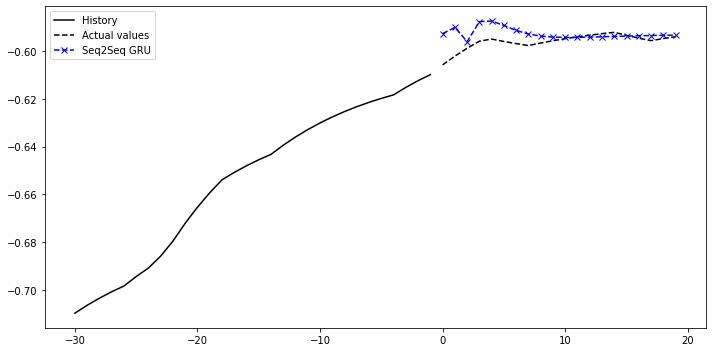

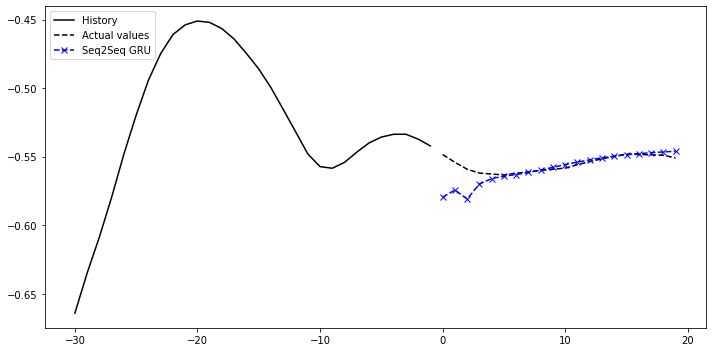

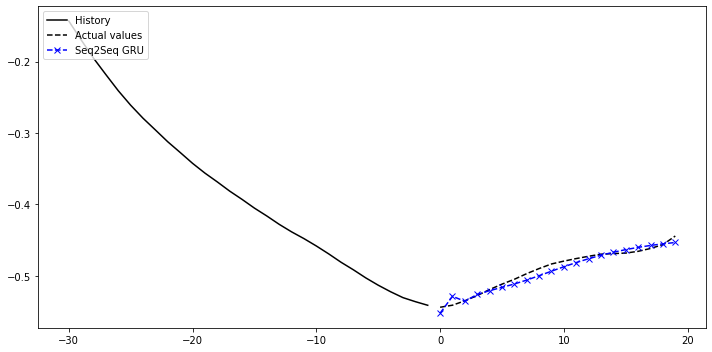

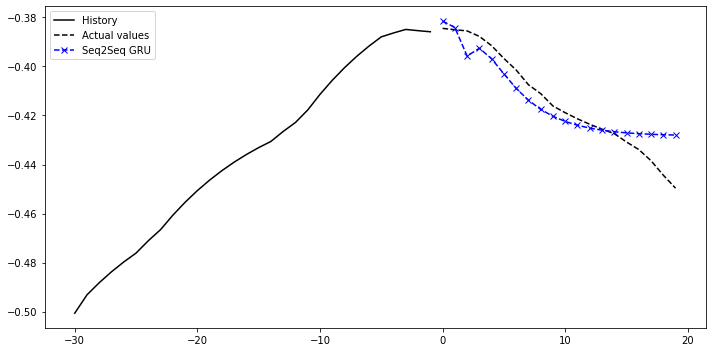

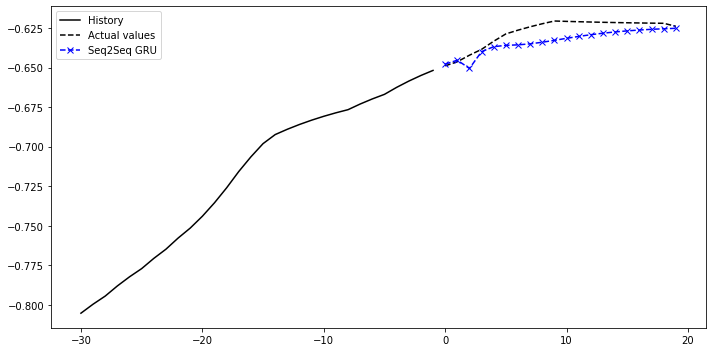

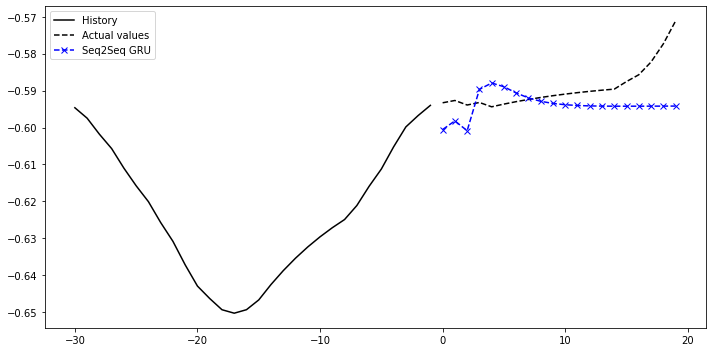

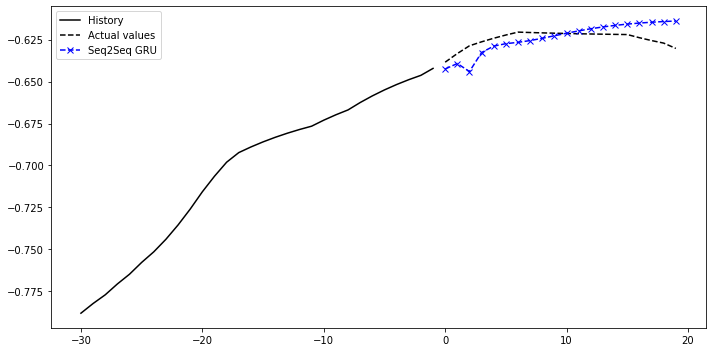

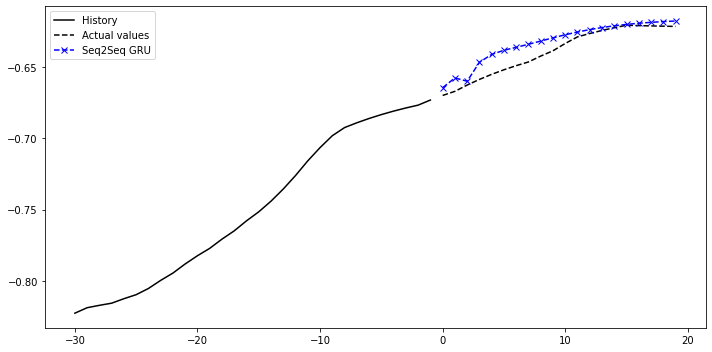

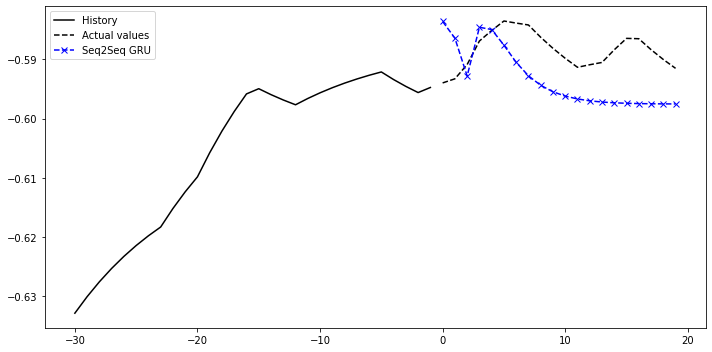

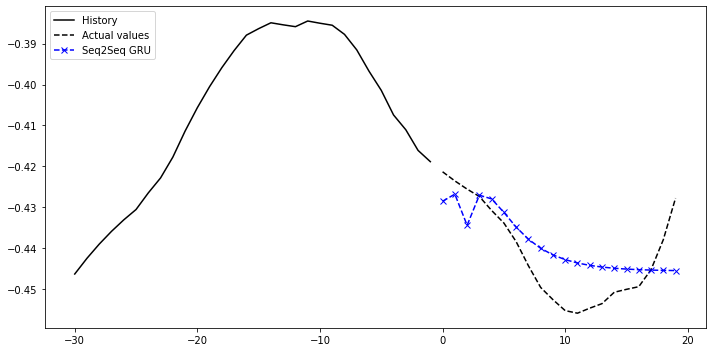

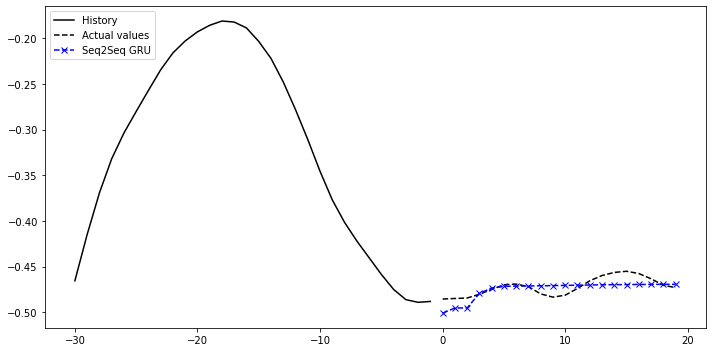

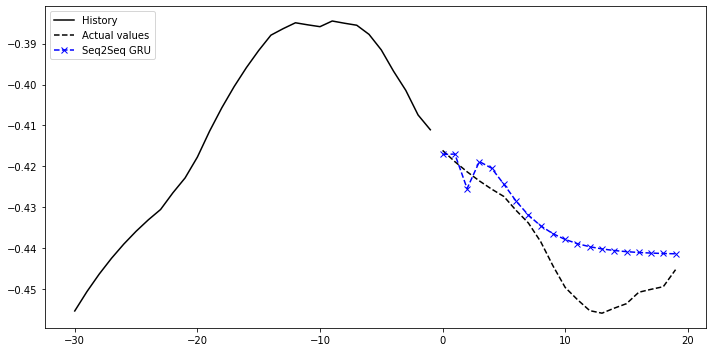

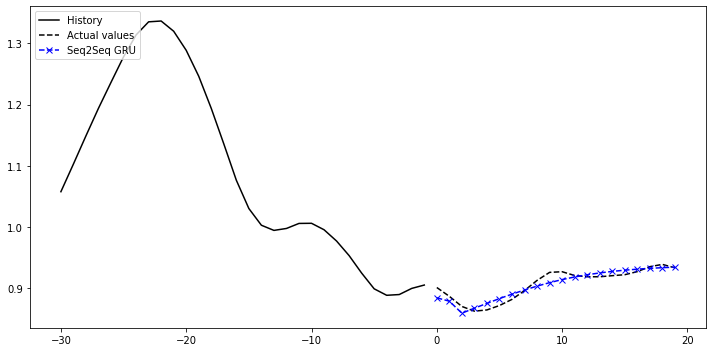

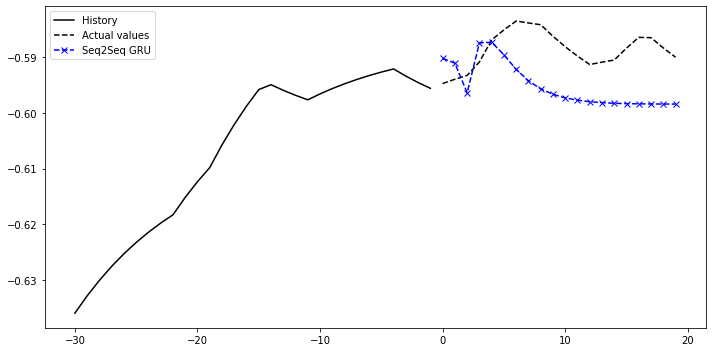

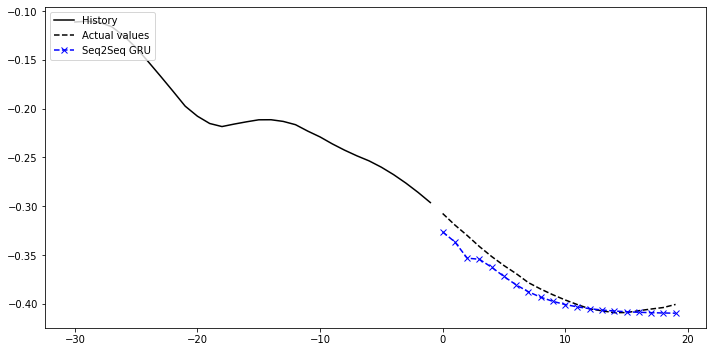

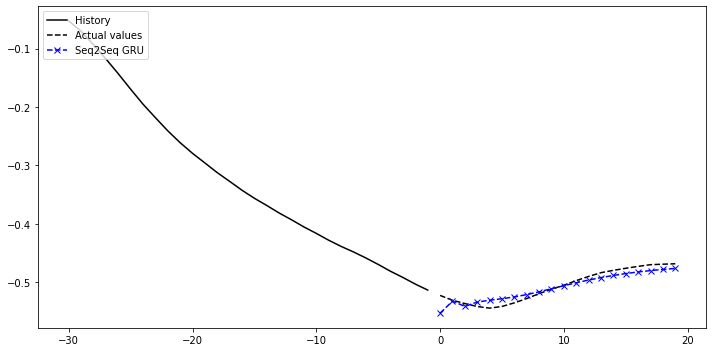

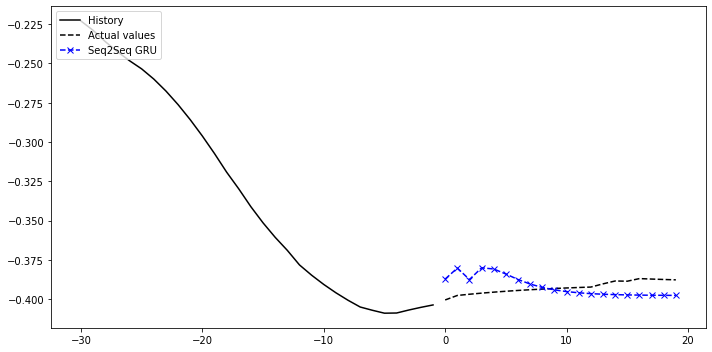

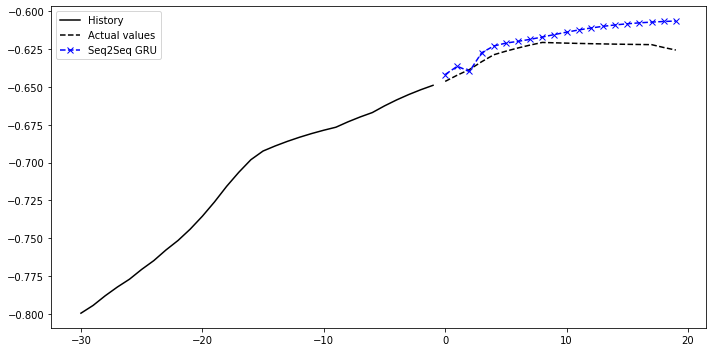

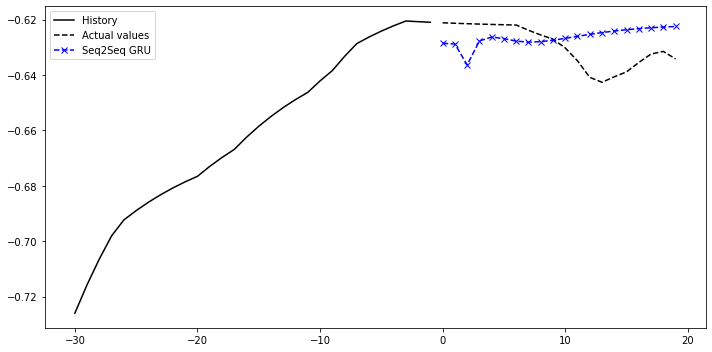

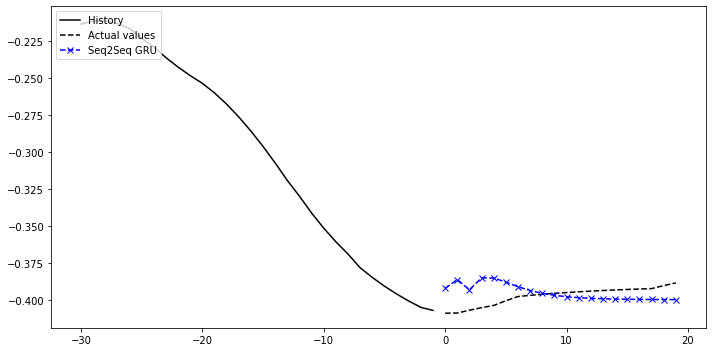

In [ ]:
num_var=0
for num in np.argsort(Error_Seq2SeqGRU[:,num_var], axis=0)[:20]:
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]], 
             [Predict_Seq2SeqGRU_sc[:,:,[num_var]]], 
             ["Seq2Seq GRU"], 
             ['b'])

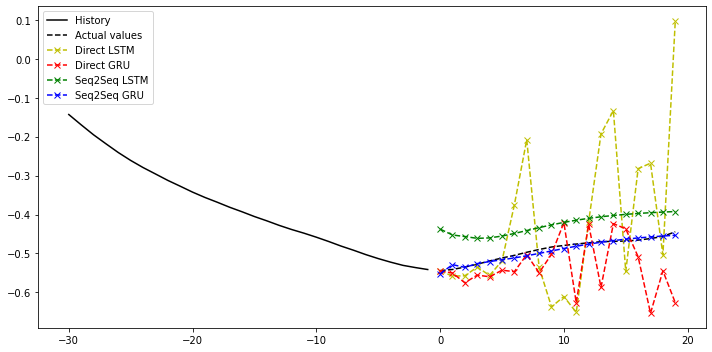

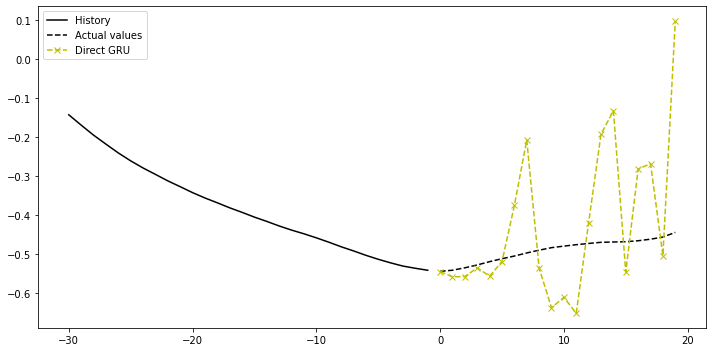

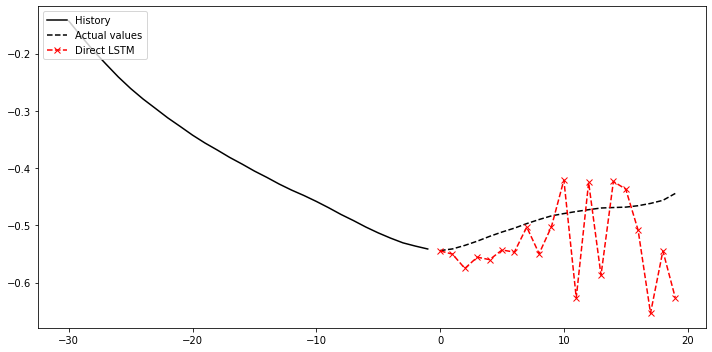

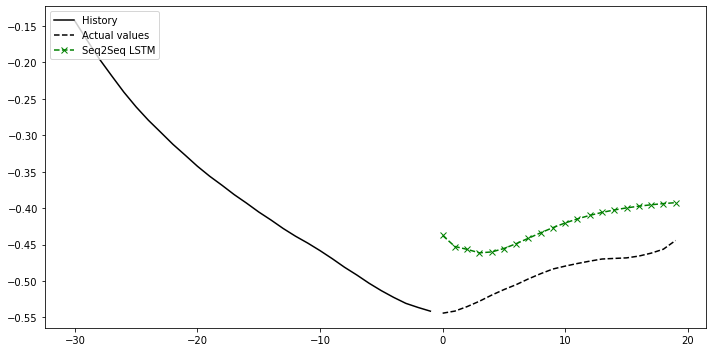

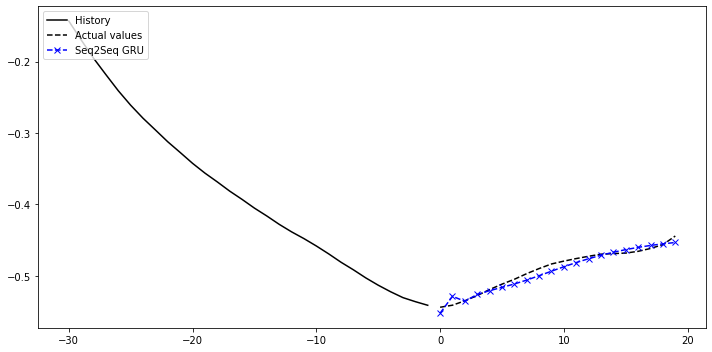

In [ ]:
num_var=0
for num in np.argsort(Error_Seq2SeqGRU[:,num_var], axis=0)[[2]]:
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]], 
             [Predict_DirLSTM_sc[:,:,[num_var]], Predict_DirGRU_sc[:,:,[num_var]], Predict_Seq2SeqLSTM_sc[:,:,[num_var]], Predict_Seq2SeqGRU_sc[:,:,[num_var]]], 
             ["Direct LSTM", "Direct GRU", "Seq2Seq LSTM", "Seq2Seq GRU"], 
             ['y', 'r', 'g', 'b'])
    
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_DirLSTM_sc[:,:,[num_var]]],
             ["Direct GRU"], 
             ['y'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_DirGRU_sc[:,:,[num_var]]],
             ["Direct LSTM"], 
             ['r'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_Seq2SeqLSTM_sc[:,:,[num_var]]],
             ["Seq2Seq LSTM"], 
             ['g'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_Seq2SeqGRU_sc[:,:,[num_var]]],
             ["Seq2Seq GRU"], 
             ['b'])

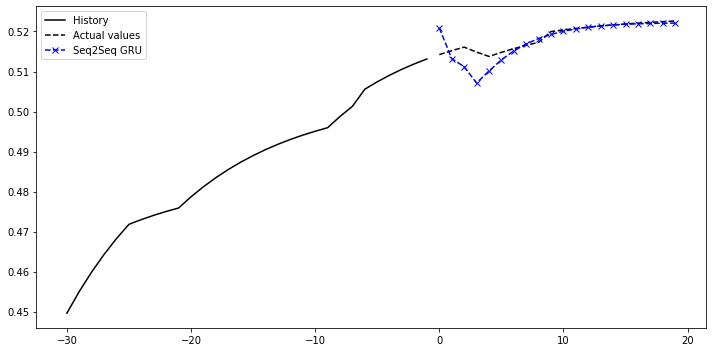

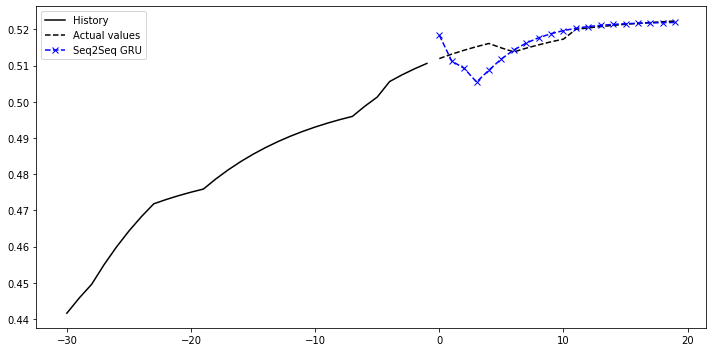

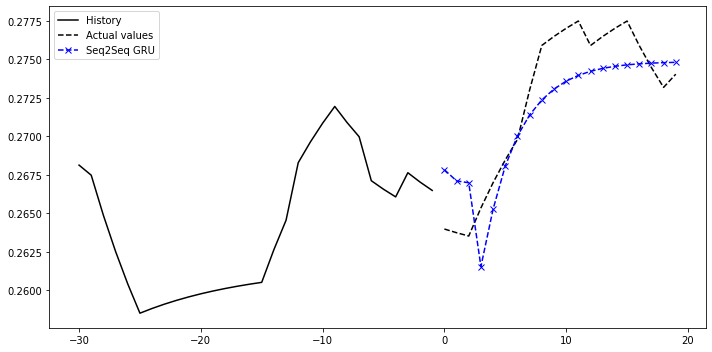

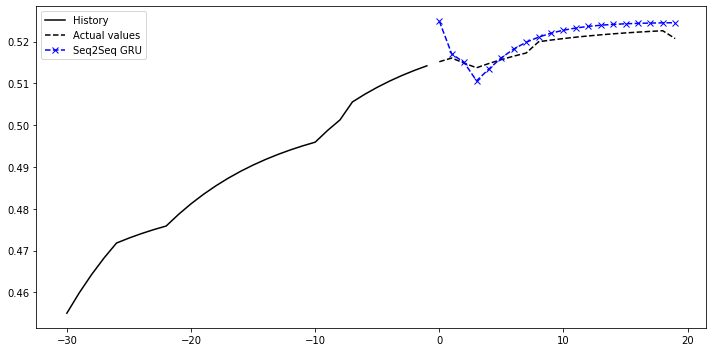

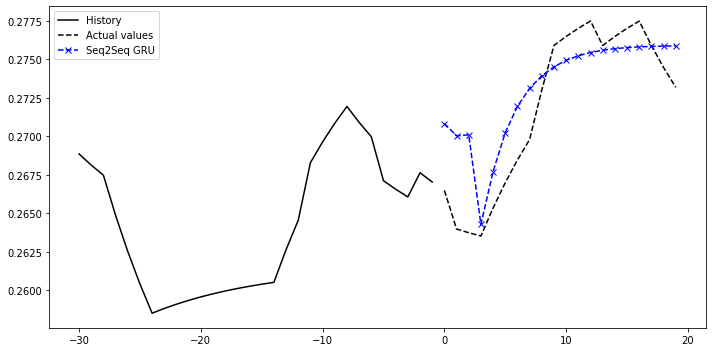

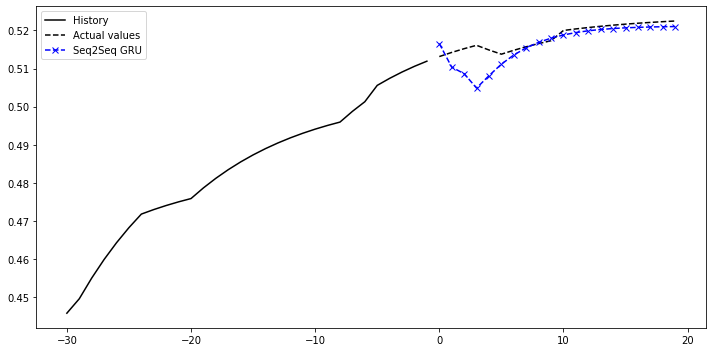

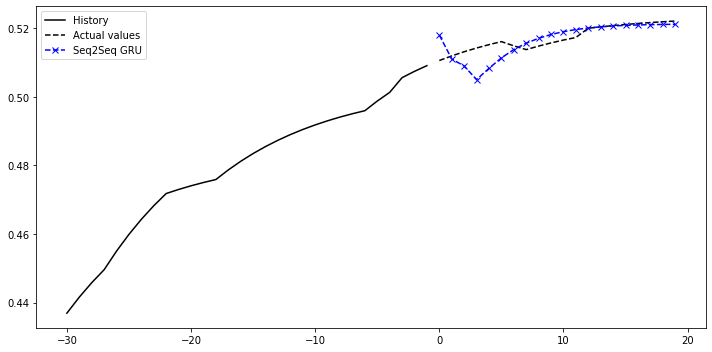

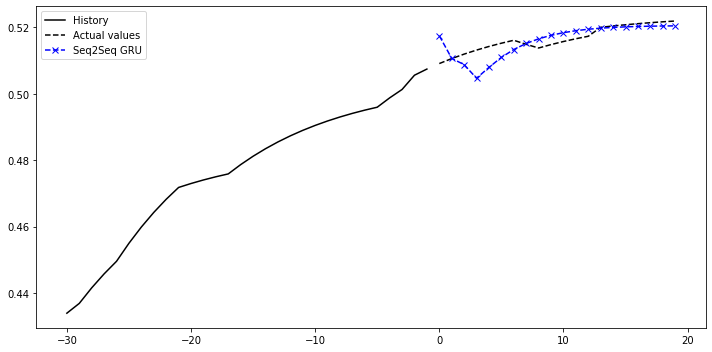

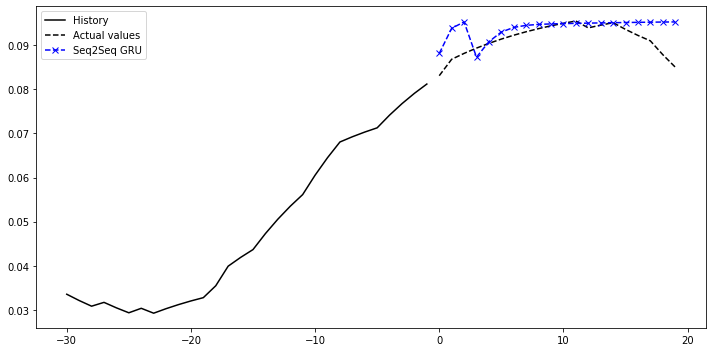

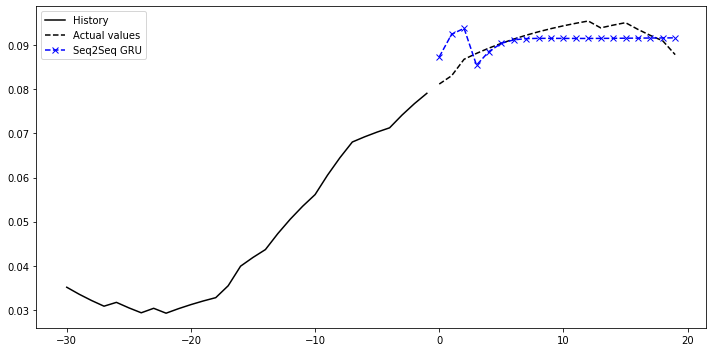

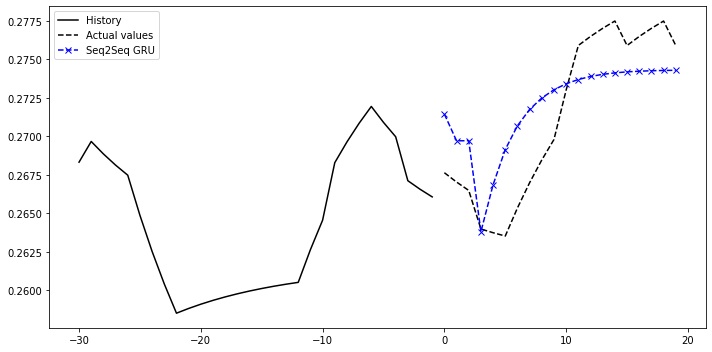

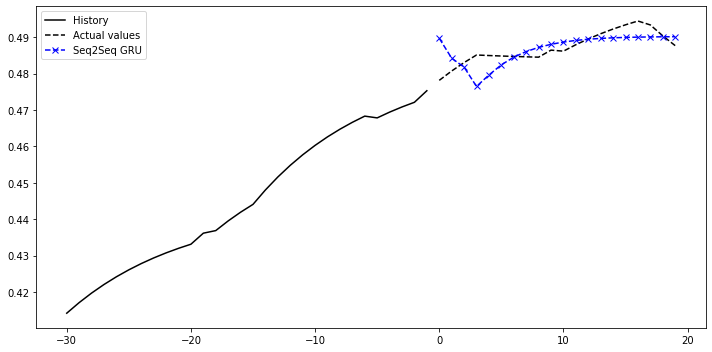

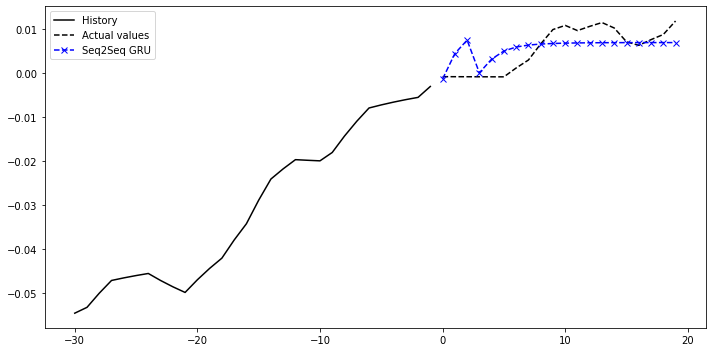

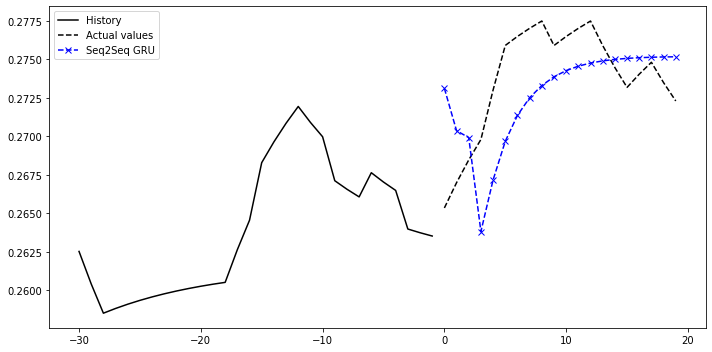

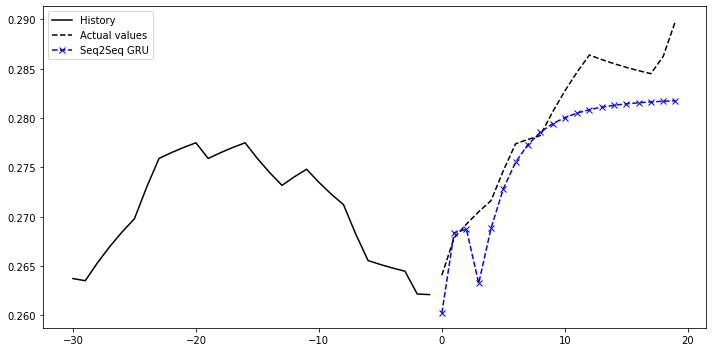

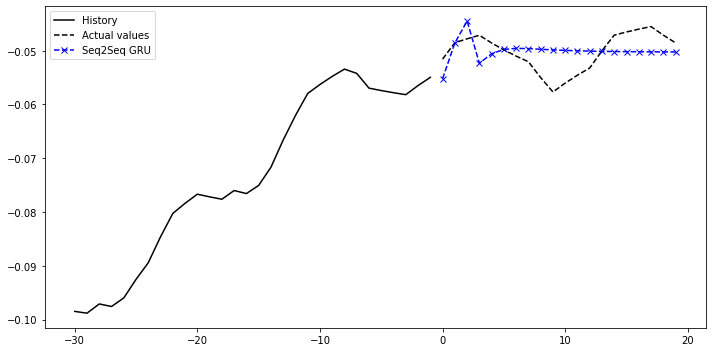

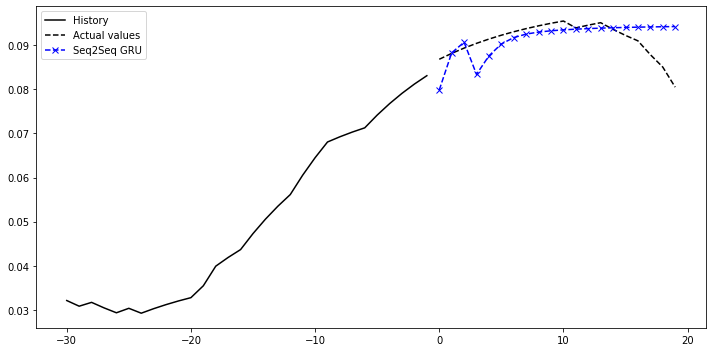

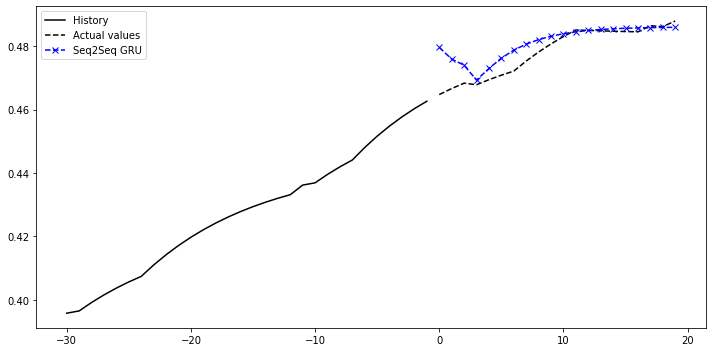

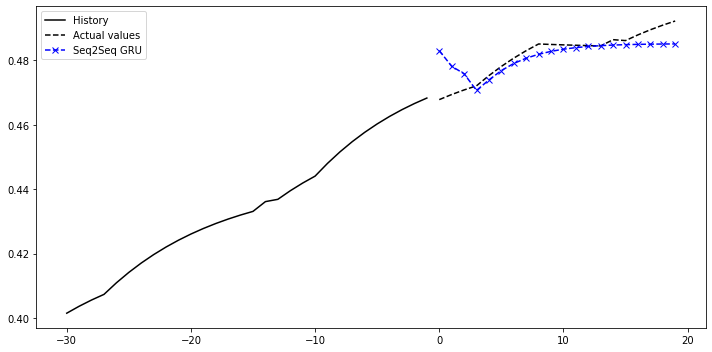

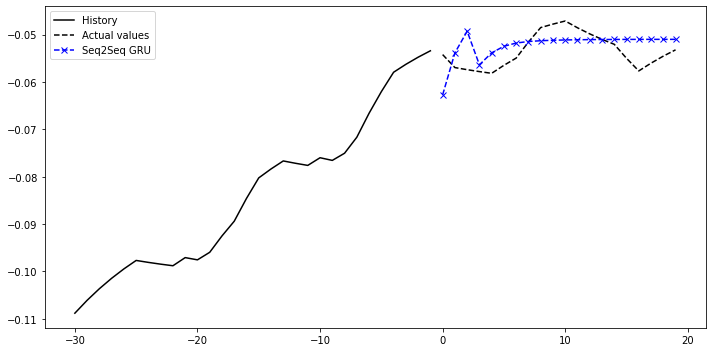

In [ ]:
num_var=1
for num in np.argsort(Error_Seq2SeqGRU[:,num_var], axis=0)[:20]:
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]], 
             [Predict_Seq2SeqGRU_sc[:,:,[num_var]]], 
             ["Seq2Seq GRU"], 
             ['b'])

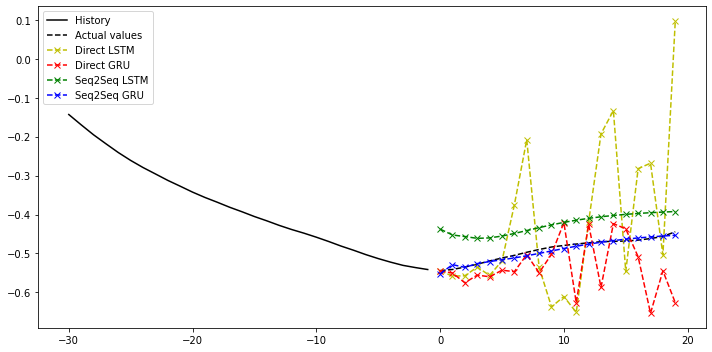

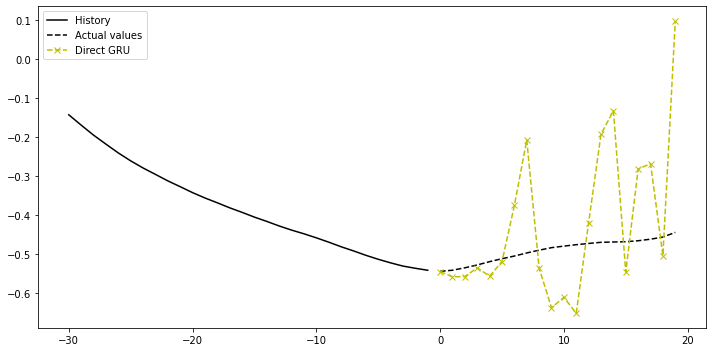

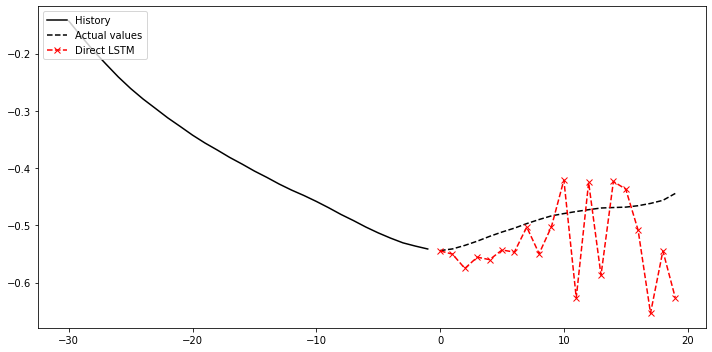

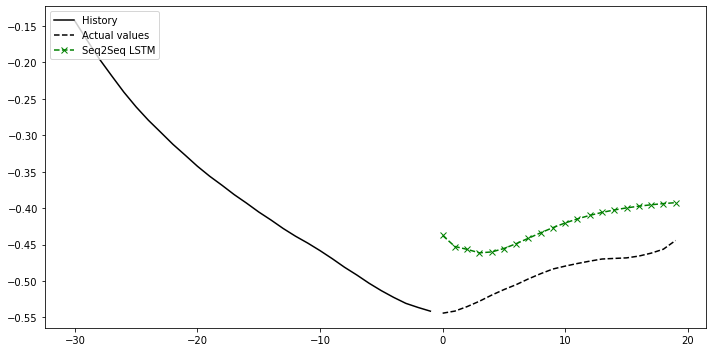

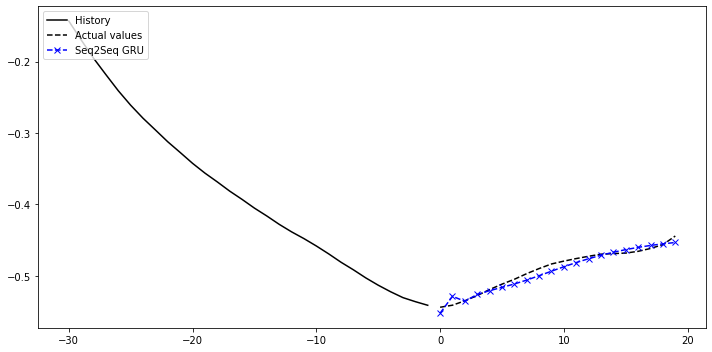

In [ ]:
num_var=1
for num in np.argsort(Error_Seq2SeqGRU[:,num_var], axis=0)[[2]]:
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]], 
             [Predict_DirLSTM_sc[:,:,[num_var]], Predict_DirGRU_sc[:,:,[num_var]], Predict_Seq2SeqLSTM_sc[:,:,[num_var]], Predict_Seq2SeqGRU_sc[:,:,[num_var]]], 
             ["Direct LSTM", "Direct GRU", "Seq2Seq LSTM", "Seq2Seq GRU"], 
             ['y', 'r', 'g', 'b'])
    
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_DirLSTM_sc[:,:,[num_var]]],
             ["Direct GRU"], 
             ['y'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_DirGRU_sc[:,:,[num_var]]],
             ["Direct LSTM"], 
             ['r'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_Seq2SeqLSTM_sc[:,:,[num_var]]],
             ["Seq2Seq LSTM"], 
             ['g'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_Seq2SeqGRU_sc[:,:,[num_var]]],
             ["Seq2Seq GRU"], 
             ['b'])

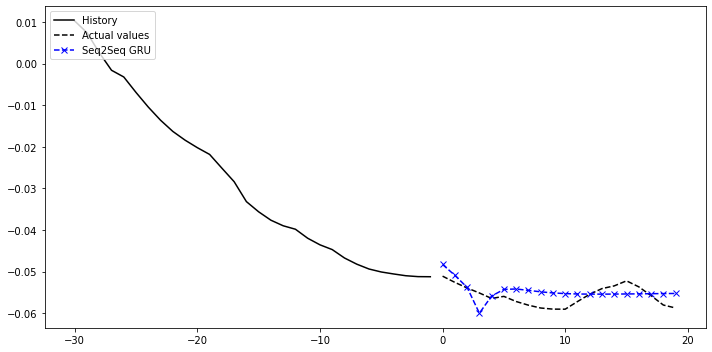

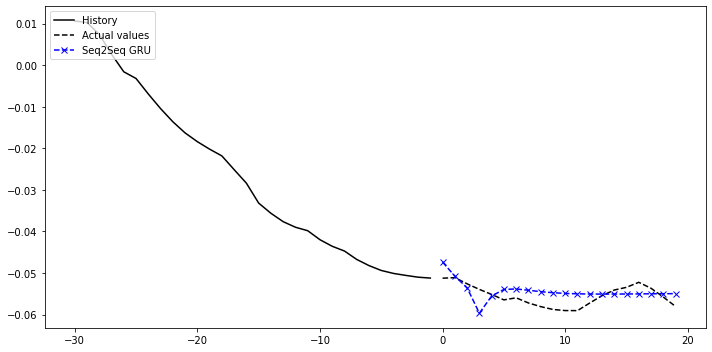

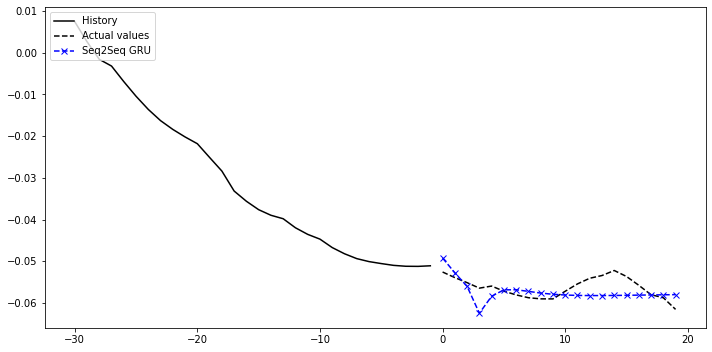

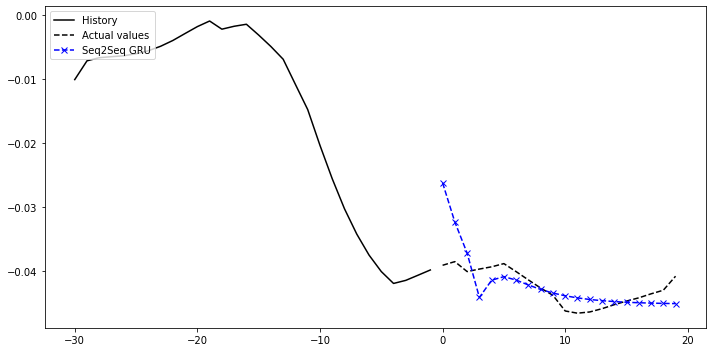

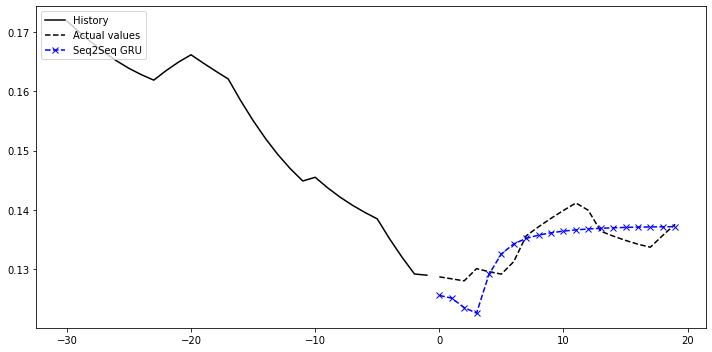

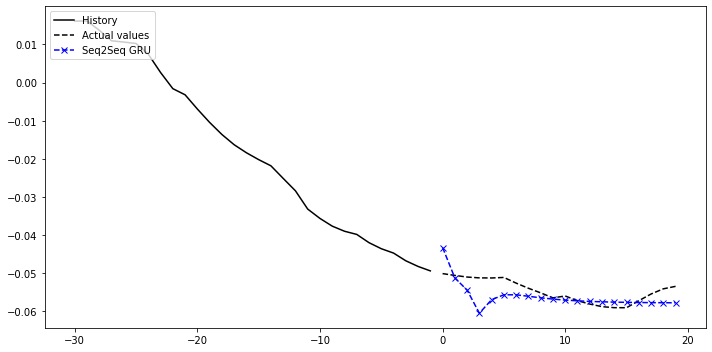

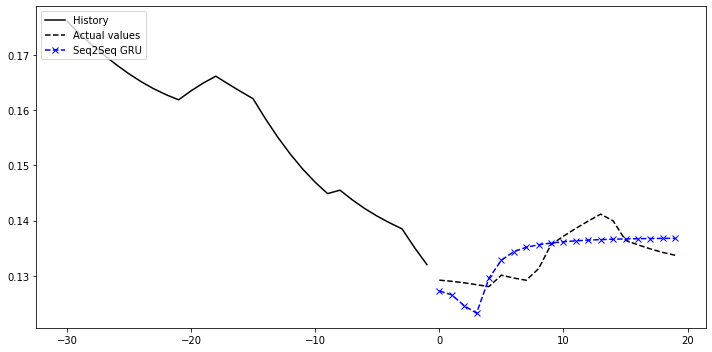

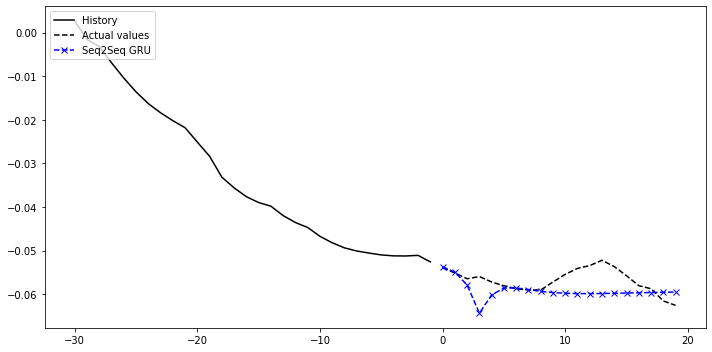

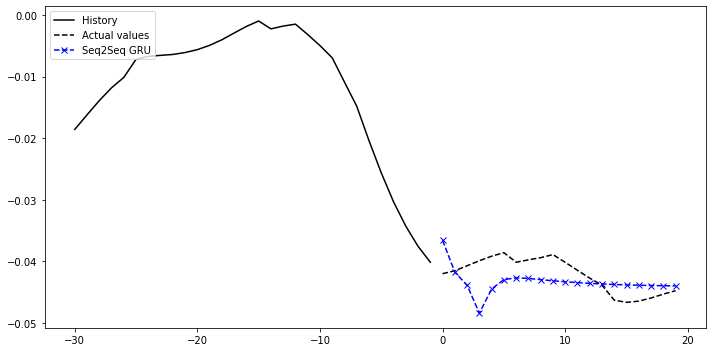

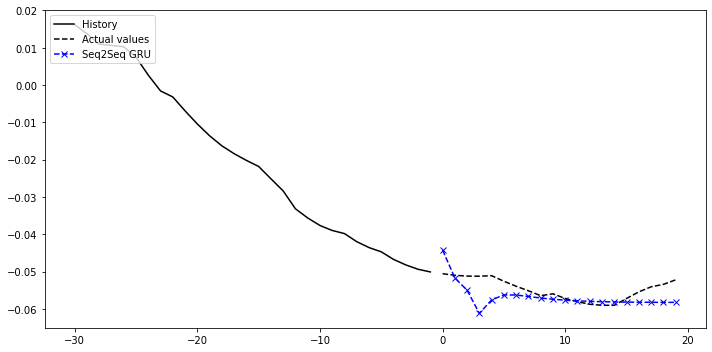

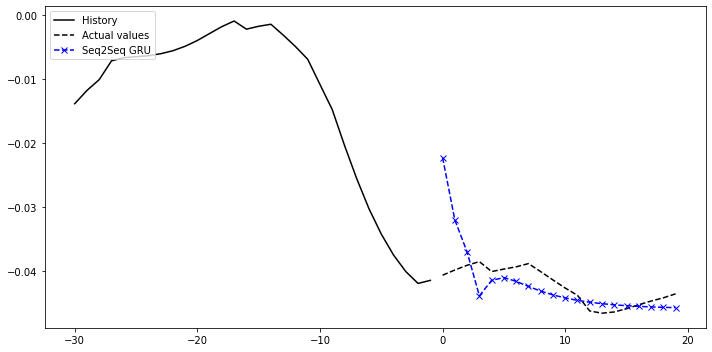

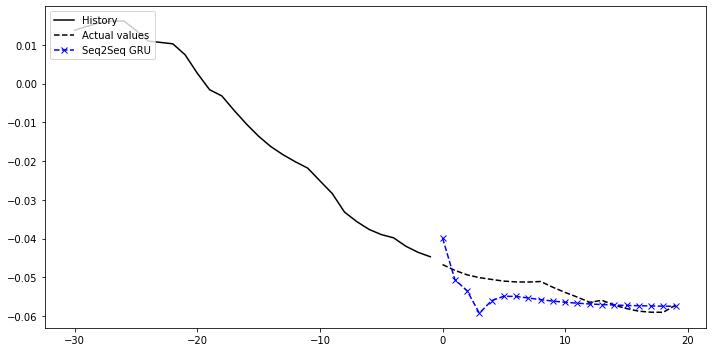

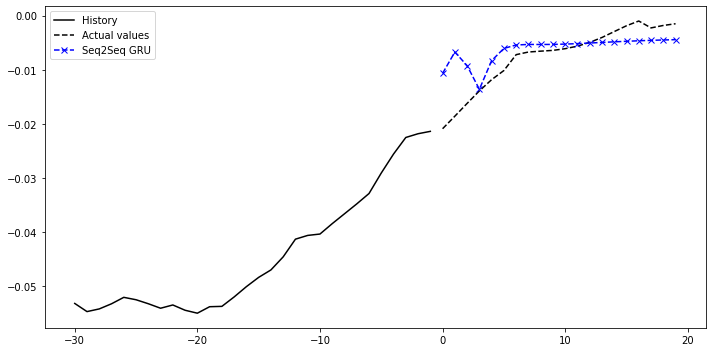

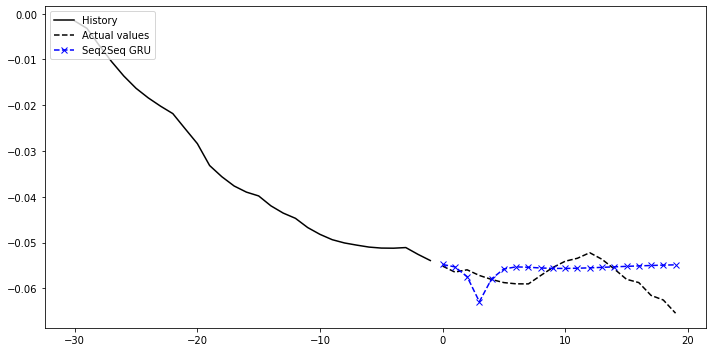

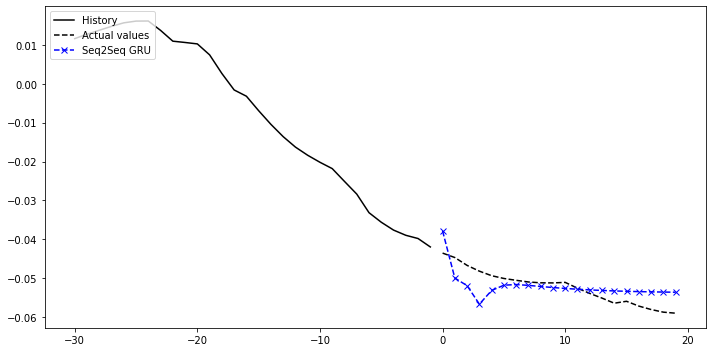

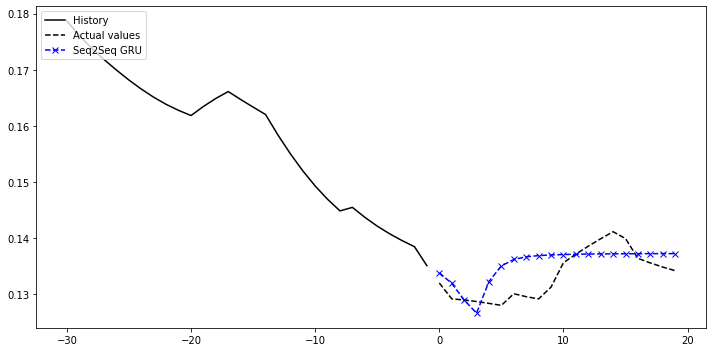

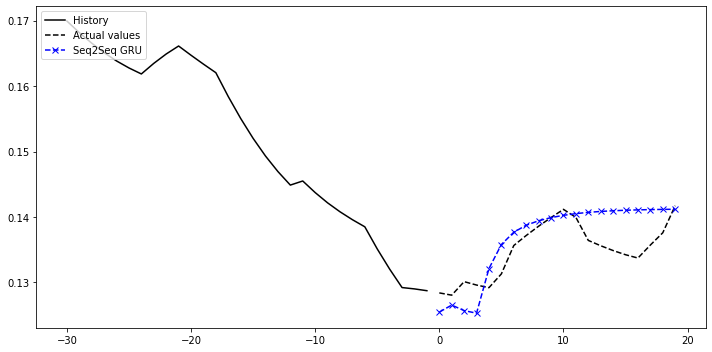

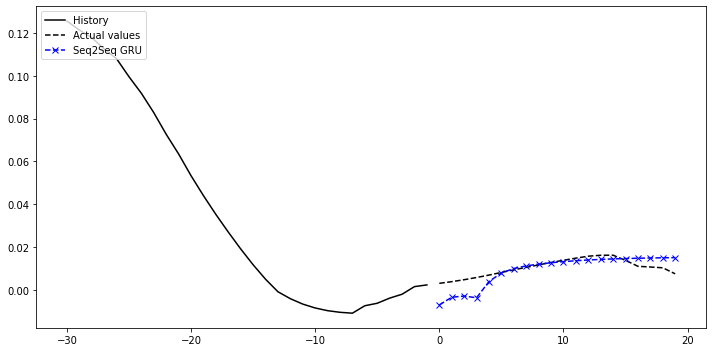

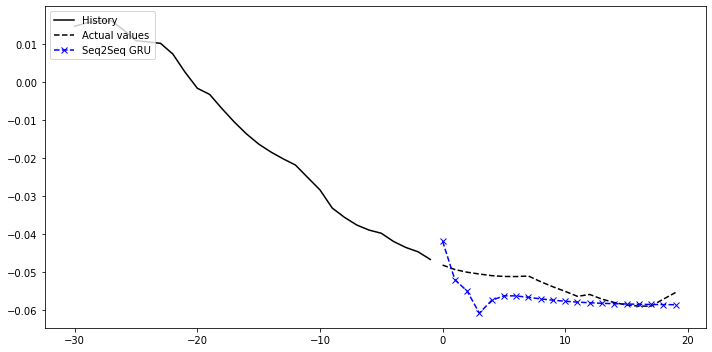

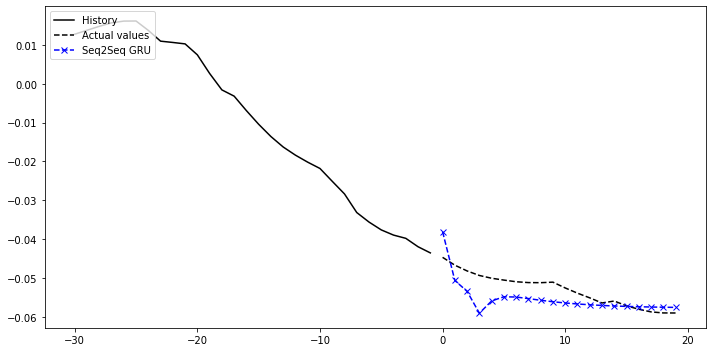

In [ ]:
num_var=2
for num in np.argsort(Error_Seq2SeqGRU[:,num_var], axis=0)[:20]:
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]], 
             [Predict_Seq2SeqGRU_sc[:,:,[num_var]]], 
             ["Seq2Seq GRU"], 
             ['b'])

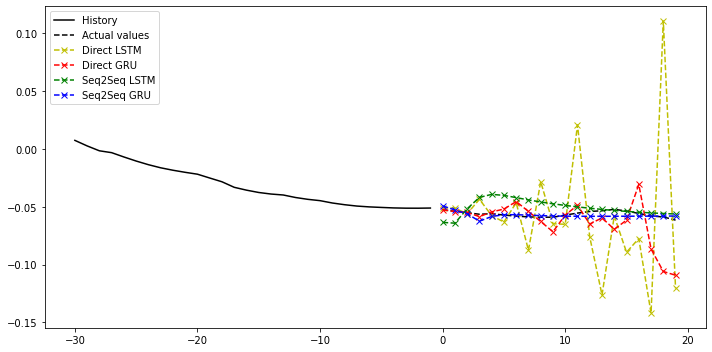

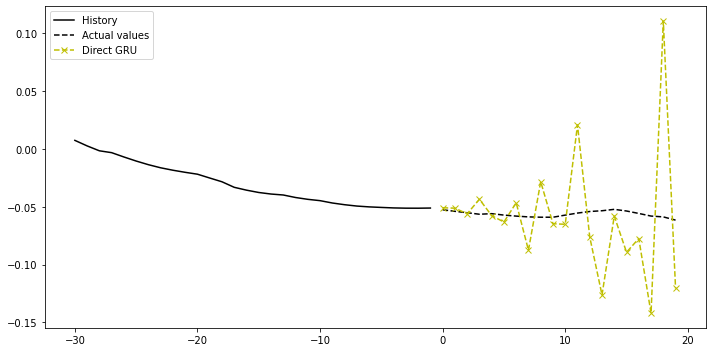

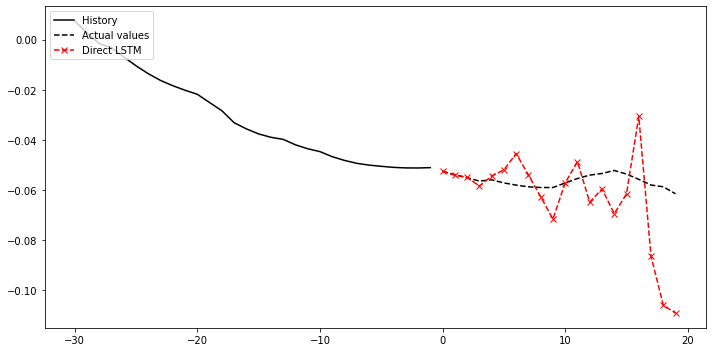

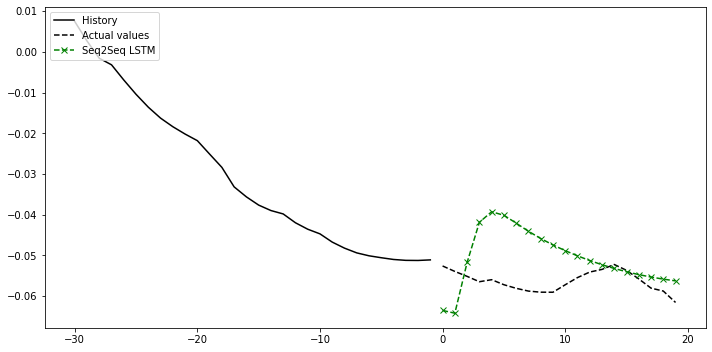

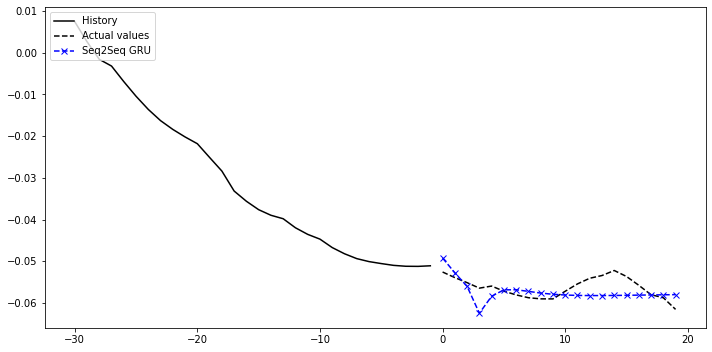

In [ ]:
num_var=2
for num in np.argsort(Error_Seq2SeqGRU[:,num_var], axis=0)[[2]]:
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]], 
             [Predict_DirLSTM_sc[:,:,[num_var]], Predict_DirGRU_sc[:,:,[num_var]], Predict_Seq2SeqLSTM_sc[:,:,[num_var]], Predict_Seq2SeqGRU_sc[:,:,[num_var]]], 
             ["Direct LSTM", "Direct GRU", "Seq2Seq LSTM", "Seq2Seq GRU"], 
             ['y', 'r', 'g', 'b'])
    
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_DirLSTM_sc[:,:,[num_var]]],
             ["Direct GRU"], 
             ['y'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_DirGRU_sc[:,:,[num_var]]],
             ["Direct LSTM"], 
             ['r'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_Seq2SeqLSTM_sc[:,:,[num_var]]],
             ["Seq2Seq LSTM"], 
             ['g'])
    PlotMSMO(num, history_window, future_window, 
             Future_Test_sc[:,:,[num_var]],  
             [Predict_Seq2SeqGRU_sc[:,:,[num_var]]],
             ["Seq2Seq GRU"], 
             ['b'])

# DNN Soft Sensor

In [ ]:
Var_S = Var_Sensor
Var_Q = ['Acetoin']
Var_SoftSensor = Var_S + Var_Q

Num_S = len(Var_S)
Num_Q = len(Var_Q)

## Load Aspen data

In [ ]:
Name_Data_Aspen = f"Final Data Aspen"
Data_Aspen = LoadFile(Path_Data, Name_Data_Aspen, 'csv')

Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data Aspen.csv
Dataset shape: (758, 13)


## Load sample data

In [ ]:
Name_Data_Sample = f"Final Data Sample"
Data_Sample = LoadFile(Path_Data, Name_Data_Sample, 'csv')

Data_Sample_for_Pressure_sc = (Data_Sample[X_Pressure]-Mean_Pressure[X_Pressure])/Std_Pressure[X_Pressure]
Data_Sample_Pressure_sc = Model_Pressure.predict(Data_Sample_for_Pressure_sc)
Data_Sample_Pressure = Data_Sample_Pressure_sc*Std_Pressure[Y_Pressure].values + Mean_Pressure[Y_Pressure].values

Data_Sample["PT-3061-3"] = Data_Sample_Pressure

Dataset is loaded from: /content/gdrive/My Drive/2,3-BDO/Data/Final Data Sample.csv
Dataset shape: (123, 66)


In [ ]:
Data_Sample[Var_SoftSensor].describe()

TT-3061-3   TT-3061-4   PT-3061-3     Acetoin
count  123.000000  123.000000  123.000000  123.000000
mean    91.759350  126.131707   -0.898228    0.121059
std      7.294798    5.262414    0.028645    0.037586
min     78.500000  110.600000   -0.971670    0.055000
25%     85.700000  123.950000   -0.913372    0.092000
50%     90.000000  127.400000   -0.894188    0.117000
75%     96.400000  130.000000   -0.876388    0.150000
max    111.700000  134.900000   -0.840820    0.251000

## Combine data

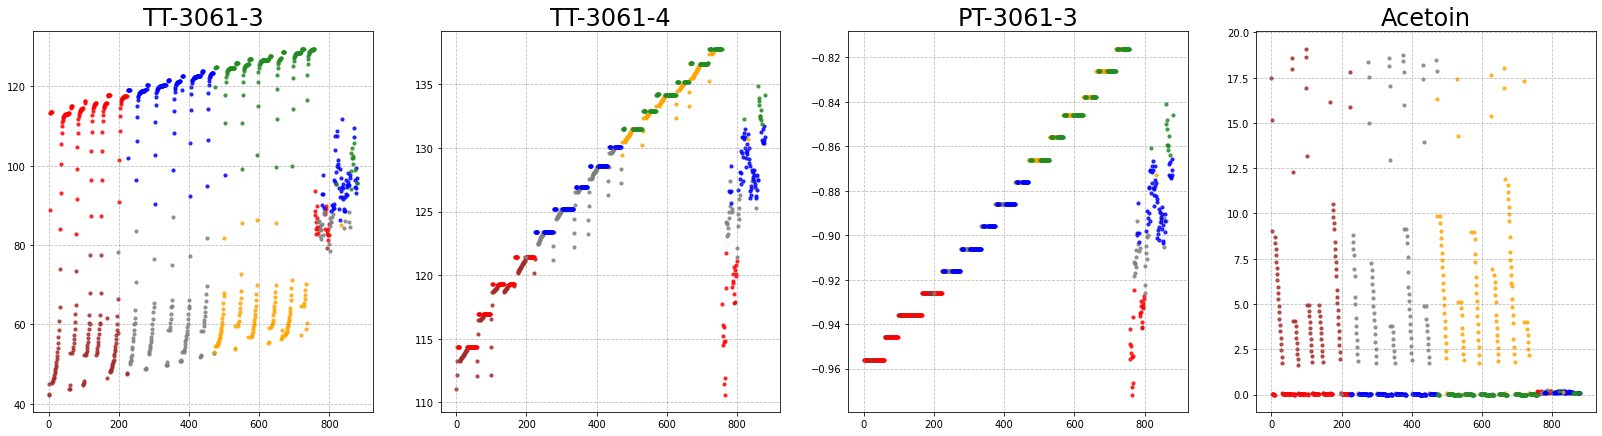

In [ ]:
Data_Combined = pd.concat([Data_Aspen[Var_SoftSensor], Data_Sample[Var_SoftSensor]], axis=0).reset_index(drop=True)

target_data = Data_Combined
n_cluster = 6
random_state = 10

data_clust, _ = KmeanCluster(target_data, num_cluster=n_cluster, target_columns=Var_S, random_state=random_state)
KmeanPlot(data_clust, figsize=7)

### Sample data 중에서 off-spec으로 분류되는 데이터 제거

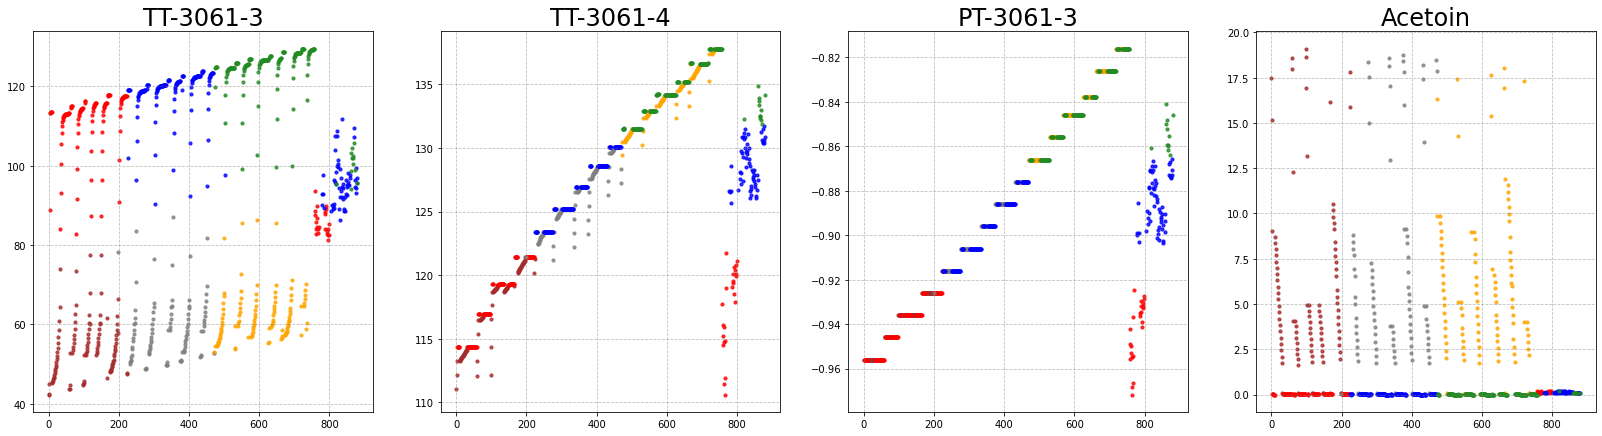

In [ ]:
data_clust_sample = data_clust[len(Data_Aspen):]
data_clust_sample_on = data_clust_sample.loc[data_clust_sample['Color']!='gray']
data_clust_sample_on = data_clust_sample_on.loc[data_clust_sample_on['Color']!='orange']
data_clust_sample_on = data_clust_sample_on.loc[data_clust_sample_on['Color']!='brown']

Data_Combined_V2 = pd.concat([data_clust[:len(Data_Aspen)], data_clust_sample_on], axis=0)

KmeanPlot(Data_Combined_V2, figsize=7)

## Train/Test

In [ ]:
# Stratified split
from sklearn.model_selection import StratifiedShuffleSplit

target_data = Data_Combined_V2
test_ratio = 0.2
random_state = 10
category = 'Color'

split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=random_state)
for train_idx, test_idx in split.split(target_data, target_data[category]):
    train = target_data.iloc[train_idx]
    test = target_data.iloc[test_idx]

Data_Train = train[Var_SoftSensor]
Data_Test = test[Var_SoftSensor]

## Scaling

In [ ]:
Mean_SoftSensor = Data_Combined_V2.mean(axis=0)
Std_SoftSensor = Data_Combined_V2.std(axis=0)

print(f"MEAN:\n{Mean_SoftSensor}")
print()
print(f"STD:\n{Std_SoftSensor}")
print()

MEAN:
TT-3061-3     94.808576
TT-3061-4    126.782145
PT-3061-3     -0.889934
Acetoin        2.078971
Cluster        2.402810
dtype: float64

STD:
TT-3061-3    29.253709
TT-3061-4     7.048407
PT-3061-3     0.041750
Acetoin       4.015608
Cluster       1.570326
dtype: float64



In [ ]:
# Mean_SoftSensor = Mean_Plant[Var_Sensor]
# Mean_SoftSensor['Acetoin'] = Data_Train.mean(axis=0)[Var_Q].values[0]

# Std_SoftSensor = Std_Plant[Var_Sensor]
# Std_SoftSensor['Acetoin'] = Data_Train.std(axis=0)[Var_Q].values[0]

In [ ]:
Data_Train_sc = (Data_Train-Mean_SoftSensor)/Std_SoftSensor
Data_Test_sc = (Data_Test-Mean_SoftSensor)/Std_SoftSensor

## Modeling

In [ ]:
# def DNN(num_x, num_y, num_layers, num_neurons):
#     model = keras.Sequential()
#     model.add(  Dense( num_neurons, activation="relu", input_shape=[num_x] )  )
#     for i in range(num_layers-1):
#         model.add(  Dense( num_neurons, activation="relu" )  )
#     model.add(  Dense( num_y )  )

#     optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
#     model.compile(loss='mse',
#                   optimizer = optimizer)
#     return model

# Model_SoftSensor = DNN(Num_S, Num_Q, 2, 25)

# history = Model_SoftSensor.fit(Data_Train_sc[Var_S], Data_Train_sc[Var_Q],
#                             epochs = 10000, callbacks=[keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')],
#                             verbose = 2, batch_size=64,
#                             validation_data=(Data_Test_sc[Var_S], Data_Test_sc[Var_Q]))

# Model_SoftSensor.save(f'{Path_Modeling}/Final Soft Sensor Model 4')

Epoch 1/10000
11/11 - 0s - loss: 0.9167 - val_loss: 0.8855
Epoch 2/10000
11/11 - 0s - loss: 0.7696 - val_loss: 0.7631
Epoch 3/10000
11/11 - 0s - loss: 0.6694 - val_loss: 0.6781
Epoch 4/10000
11/11 - 0s - loss: 0.6033 - val_loss: 0.6223
Epoch 5/10000
11/11 - 0s - loss: 0.5566 - val_loss: 0.5880
Epoch 6/10000
11/11 - 0s - loss: 0.5297 - val_loss: 0.5626
Epoch 7/10000
11/11 - 0s - loss: 0.5094 - val_loss: 0.5414
Epoch 8/10000
11/11 - 0s - loss: 0.4929 - val_loss: 0.5222
Epoch 9/10000
11/11 - 0s - loss: 0.4775 - val_loss: 0.5006
Epoch 10/10000
11/11 - 0s - loss: 0.4611 - val_loss: 0.4812
Epoch 11/10000
11/11 - 0s - loss: 0.4458 - val_loss: 0.4614
Epoch 12/10000
11/11 - 0s - loss: 0.4280 - val_loss: 0.4413
Epoch 13/10000
11/11 - 0s - loss: 0.4096 - val_loss: 0.4245
Epoch 14/10000
11/11 - 0s - loss: 0.3931 - val_loss: 0.4036
Epoch 15/10000
11/11 - 0s - loss: 0.3763 - val_loss: 0.3847
Epoch 16/10000
11/11 - 0s - loss: 0.3617 - val_loss: 0.3679
Epoch 17/10000
11/11 - 0s - loss: 0.3455 - val_lo

In [ ]:
# Name_Model_SoftSensor = f"Final Soft Sensor Model 4"
Name_Model_SoftSensor = f"SOFT SENSOR FINAL MODEL"
Model_SoftSensor = LoadFile(Path_Modeling, Name_Model_SoftSensor, 'model')

Model is loaded from: /content/gdrive/My Drive/2,3-BDO/Modeling/SOFT SENSOR FINAL MODEL


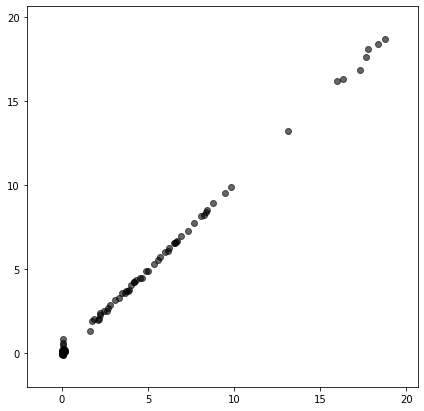

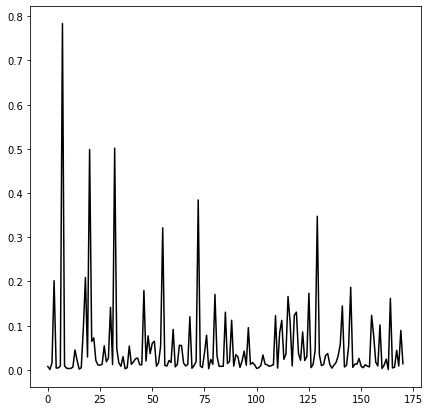

In [ ]:
Predict_Sensor_sc = Model_SoftSensor.predict(Data_Test_sc[Var_S])[:,0]
Actual_Sensor_sc = Data_Test_sc[Var_Q].values[:,0]

Mean_Acetoin = Mean_SoftSensor[Var_Q].values
Std_Acetoin = Std_SoftSensor[Var_Q].values

Predict_Sensor = Predict_Sensor_sc * Std_Acetoin + Mean_Acetoin
Actual_Sensor = Actual_Sensor_sc * Std_Acetoin + Mean_Acetoin

plot_min = np.minimum(Actual_Sensor.min(), Predict_Sensor.min())
plot_max = np.maximum(Actual_Sensor.max(), Predict_Sensor.max())
plot_len = plot_max - plot_min

plot_low = plot_min - plot_len*0.1
plot_upp = plot_max + plot_len*0.1

plt.figure(figsize=(7,7))
plt.scatter(Actual_Sensor, Predict_Sensor, c='k', alpha=0.6)
plt.xlim(plot_low, plot_upp)
plt.ylim(plot_low, plot_upp)


plt.figure(figsize=(7,7))
plt.plot(range(len(Predict_Sensor)), np.abs(Predict_Sensor-Actual_Sensor), c='k')

In [ ]:
Data_Test_onsepc = Data_Test.loc[Data_Test['Acetoin']  < 1]
Data_Test_offsepc = Data_Test.loc[Data_Test['Acetoin'] >= 1]

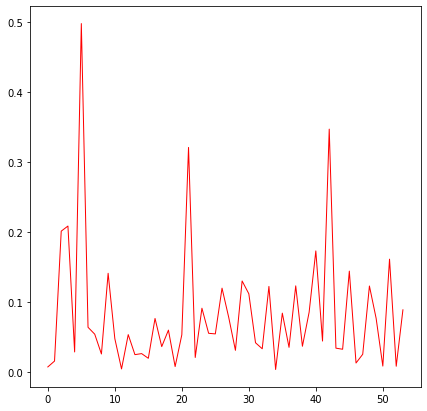

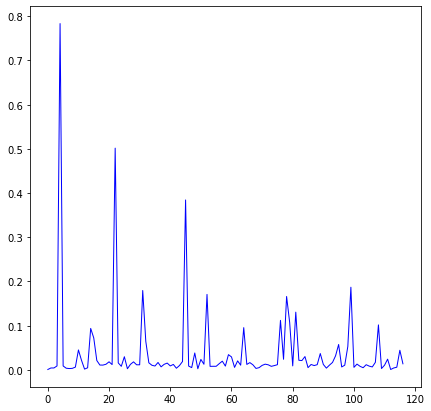

In [ ]:
Data_Test_onsepc_sc = Data_Test_sc.loc[Data_Test_sc['Acetoin'] * Std_Acetoin + Mean_Acetoin < 1]
Data_Test_offsepc_sc = Data_Test_sc.loc[Data_Test_sc['Acetoin'] * Std_Acetoin + Mean_Acetoin >= 1]

Predict_Sensor_onspec_sc = Model_SoftSensor.predict(Data_Test_onsepc_sc[Var_S])[:,0]
Predict_Sensor_offspec_sc = Model_SoftSensor.predict(Data_Test_offsepc_sc[Var_S])[:,0]

Predict_Sensor_onspec = Predict_Sensor_onspec_sc * Std_Acetoin + Mean_Acetoin
Predict_Sensor_offspec = Predict_Sensor_offspec_sc * Std_Acetoin + Mean_Acetoin

Actual_Sensor_onspec_sc = Data_Test_onsepc_sc[Var_Q].values[:,0]
Actual_Sensor_offspec_sc = Data_Test_offsepc_sc[Var_Q].values[:,0]

Actual_Sensor_onspec = Actual_Sensor_onspec_sc * Std_Acetoin + Mean_Acetoin
Actual_Sensor_offspec = Actual_Sensor_offspec_sc * Std_Acetoin + Mean_Acetoin

plt.figure(figsize=(7,7))
plt.plot(range(len(Actual_Sensor_offspec)), np.abs(Predict_Sensor_offspec-Actual_Sensor_offspec), c='r', linewidth=1, label='Off-spec')
plt.figure(figsize=(7,7))
plt.plot(range(len(Actual_Sensor_onspec)), np.abs(Predict_Sensor_onspec-Actual_Sensor_onspec), c='b', linewidth=1, label='On-spec')

# Hybrid Modeling

In [ ]:
target_list = Data_Plant_On_Z_Cts_EWA

for i, data in enumerate(target_list):
    history_data, future_data = MSMOSeriesData(data[Var_history].values, data[Var_future].values,
                                                     0, None,
                                                     history_window, future_window, step)
    
    if not i:
        Plant_history = history_data
        Plant_future = future_data

    else:
        Plant_history = np.concatenate([Plant_history, history_data], axis=0)
        Plant_future = np.concatenate([Plant_future, future_data], axis=0)

Plant_history_sc = (Plant_history - Mean_Plant[Var_history].values)/Std_Plant[Var_history].values
Plant_future_sc = (Plant_future - Mean_Plant[Var_future].values,)/Std_Plant[Var_future].values,

In [ ]:
target_list_sc = Future_Test_sc

target_list = target_list_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
sv_list_sc = (target_list - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

qvs_list_sc = []
for sv_sc in sv_list_sc:
    qv_sc = Model_SoftSensor.predict(sv_sc)

    qvs_list_sc.append(qv_sc)

qvs_list_sc = np.array(qvs_list_sc)
qvs_list_sc = qvs_list_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values

def Absolute_Leaky_Relu(x):
    return np.maximum(0.1*(-x), x)

QVs_Actual_relu = Absolute_Leaky_Relu(qvs_list_sc)

In [ ]:
target_list_sc = Predict_DirLSTM_sc

target_list = target_list_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
sv_list_sc = (target_list - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

qvs_list_sc = []
for sv_sc in sv_list_sc:
    qv_sc = Model_SoftSensor.predict(sv_sc)

    qvs_list_sc.append(qv_sc)

qvs_list_sc = np.array(qvs_list_sc)
qvs_list_sc = qvs_list_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values

def Absolute_Leaky_Relu(x):
    return np.maximum(0.1*(-x), x)

QVs_DirLSTM_relu = Absolute_Leaky_Relu(qvs_list_sc)

In [ ]:
target_list_sc = Predict_DirGRU_sc

target_list = target_list_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
sv_list_sc = (target_list - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

qvs_list_sc = []
for sv_sc in sv_list_sc:
    qv_sc = Model_SoftSensor.predict(sv_sc)

    qvs_list_sc.append(qv_sc)

qvs_list_sc = np.array(qvs_list_sc)
qvs_list_sc = qvs_list_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values

def Absolute_Leaky_Relu(x):
    return np.maximum(0.1*(-x), x)

QVs_DirGRU_relu = Absolute_Leaky_Relu(qvs_list_sc)

In [ ]:
target_list_sc = Predict_Seq2SeqLSTM_sc

target_list = target_list_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
sv_list_sc = (target_list - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

qvs_list_sc = []
for sv_sc in sv_list_sc:
    qv_sc = Model_SoftSensor.predict(sv_sc)

    qvs_list_sc.append(qv_sc)

qvs_list_sc = np.array(qvs_list_sc)
qvs_list_sc = qvs_list_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values

def Absolute_Leaky_Relu(x):
    return np.maximum(0.1*(-x), x)

QVs_Seq2SeqLSTM_relu = Absolute_Leaky_Relu(qvs_list_sc)

In [ ]:
target_list_sc = Predict_Seq2SeqGRU_sc

target_list = target_list_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
sv_list_sc = (target_list - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

qvs_list_sc = []
for sv_sc in sv_list_sc:
    qv_sc = Model_SoftSensor.predict(sv_sc)

    qvs_list_sc.append(qv_sc)

qvs_list_sc = np.array(qvs_list_sc)
qvs_list_sc = qvs_list_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values

def Absolute_Leaky_Relu(x):
    return np.maximum(0.1*(-x), x)

QVs_Seq2SeqGRU_relu = Absolute_Leaky_Relu(qvs_list_sc)

In [ ]:
markersize=3.5
linewidth=1
criterion = 0.233817
criterion_width = 1.5
figsize = (21,7)

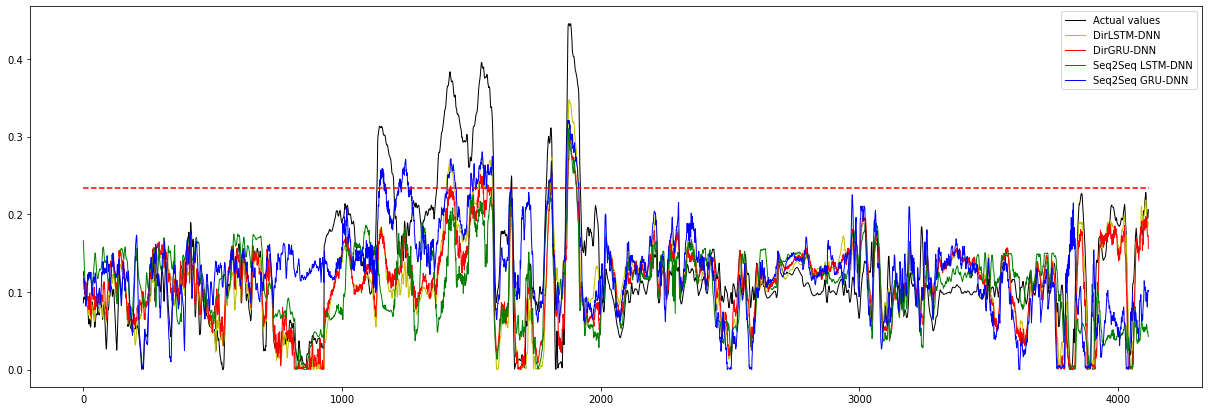

In [ ]:
target_time = 0
plt.figure(figsize=figsize)
plt.plot(QVs_Actual_relu[: , target_time , 0], 'k-', linewidth=linewidth, label="Actual values")
plt.plot(QVs_DirLSTM_relu[: , target_time , 0], 'y-', linewidth=linewidth, label="DirLSTM-DNN")
plt.plot(QVs_DirGRU_relu[: , target_time , 0], 'r-', linewidth=linewidth, label="DirGRU-DNN")
plt.plot(QVs_Seq2SeqLSTM_relu[: , target_time , 0], 'g-', linewidth=linewidth, label="Seq2Seq LSTM-DNN")
plt.plot(QVs_Seq2SeqGRU_relu[: , target_time , 0], 'b-', linewidth=linewidth, label="Seq2Seq GRU-DNN")

# plt.ylim(-0.5, 6)
plt.legend()
plt.plot([0, len(QVs_Actual_relu)], [criterion, criterion], 'r--', linewidth=criterion_width)

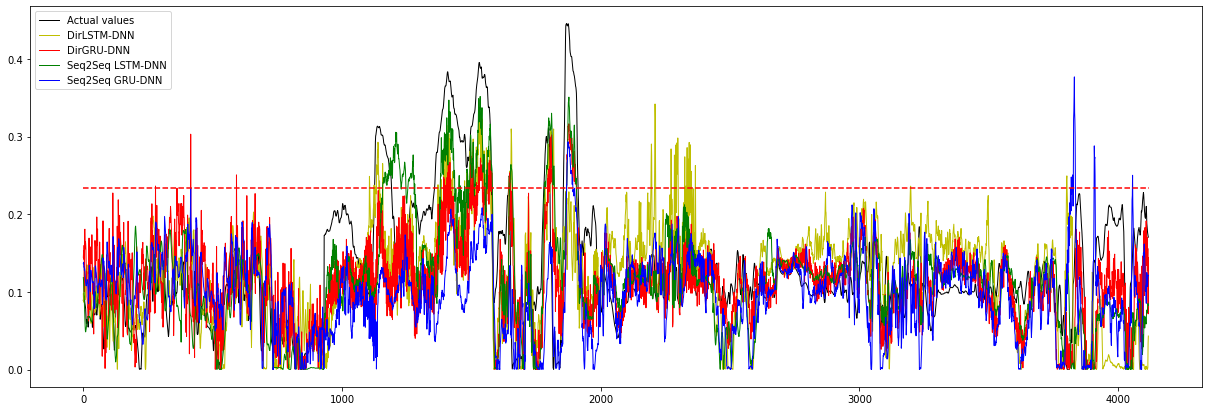

In [ ]:
target_time = 9
plt.figure(figsize=figsize)
plt.plot(QVs_Actual_relu[: , target_time , 0], 'k-', linewidth=linewidth, label="Actual values")
plt.plot(QVs_DirLSTM_relu[: , target_time , 0], 'y-', linewidth=linewidth, label="DirLSTM-DNN")
plt.plot(QVs_DirGRU_relu[: , target_time , 0], 'r-', linewidth=linewidth, label="DirGRU-DNN")
plt.plot(QVs_Seq2SeqLSTM_relu[: , target_time , 0], 'g-', linewidth=linewidth, label="Seq2Seq LSTM-DNN")
plt.plot(QVs_Seq2SeqGRU_relu[: , target_time , 0], 'b-', linewidth=linewidth, label="Seq2Seq GRU-DNN")

# plt.ylim(-0.5, 6)
plt.legend()
plt.plot([0, len(QVs_Actual_relu)], [criterion, criterion], 'r--', linewidth=criterion_width)

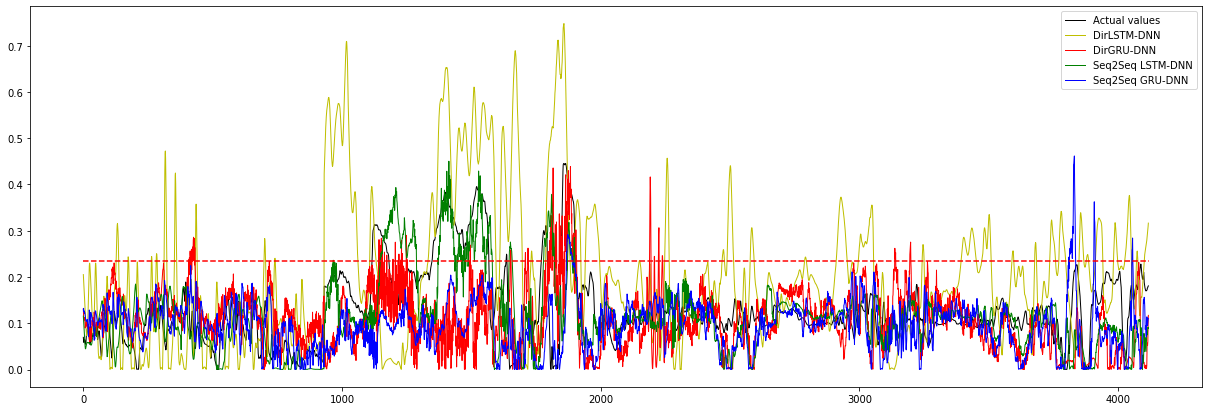

In [ ]:
target_time = 19
plt.figure(figsize=figsize)
plt.plot(QVs_Actual_relu[: , target_time , 0], 'k-', linewidth=linewidth, label="Actual values")
plt.plot(QVs_DirLSTM_relu[: , target_time , 0], 'y-', linewidth=linewidth, label="DirLSTM-DNN")
plt.plot(QVs_DirGRU_relu[: , target_time , 0], 'r-', linewidth=linewidth, l
         abel="DirGRU-DNN")
plt.plot(QVs_Seq2SeqLSTM_relu[: , target_time , 0], 'g-', linewidth=linewidth, label="Seq2Seq LSTM-DNN")
plt.plot(QVs_Seq2SeqGRU_relu[: , target_time , 0], 'b-', linewidth=linewidth, label="Seq2Seq GRU-DNN")

# plt.ylim(-0.5, 6)
plt.legend()
plt.plot([0, len(QVs_Actual_relu)], [criterion, criterion], 'r--', linewidth=criterion_width)

# 예전 코드

In [ ]:
# List_QVs_Actual_sc = []
# List_QVs_DirLSTM_sc = []
# List_QVs_DirGRU_sc = []
# List_QVs_Seq2SeqLSTM_sc = []
# List_QVs_Seq2SeqGRU_sc = []

# Future_Test = Future_Test_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# SVs_Actual_sc = (Future_Test - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

# Predict_DirLSTM = Predict_DirLSTM_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# SVs_DirLSTM_sc = (Predict_DirLSTM - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

# Predict_DirGRU = Predict_DirGRU_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# SVs_DirGRU_sc = (Predict_DirGRU - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

# Predict_Seq2SeqLSTM = Predict_Seq2SeqLSTM_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# SVs_Seq2SeqLSTM_sc = (Predict_Seq2SeqLSTM - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

# Predict_Seq2SeqGRU = Predict_Seq2SeqGRU_sc * Std_Plant[Var_Sensor].values + Mean_Plant[Var_Sensor].values
# SVs_Seq2SeqGRU_sc = (Predict_Seq2SeqGRU - Mean_SoftSensor[Var_Sensor].values) / Std_SoftSensor[Var_Sensor].values

# for sv_actual_sc, sv_dirlstm_sc,  sv_dirgru_sc,  sv_seq2seqlstm_sc, sv_seq2seqgru_sc in zip(SVs_Actual_sc, SVs_DirLSTM_sc, SVs_DirGRU_sc, SVs_Seq2SeqLSTM_sc, SVs_Seq2SeqGRU_sc):
#     qv_actual_sc = Model_SoftSensor.predict(sv_actual_sc)
#     qv_dirlstm_sc = Model_SoftSensor.predict(sv_dirlstm_sc)
#     qv_dirgru_sc = Model_SoftSensor.predict(sv_dirgru_sc)
#     qv_seq2seqlstm_sc = Model_SoftSensor.predict(sv_seq2seqlstm_sc)
#     qv_seq2seqgru_sc = Model_SoftSensor.predict(sv_seq2seqgru_sc)
    
#     List_QVs_Actual_sc.append(qv_actual_sc)
#     List_QVs_DirLSTM_sc.append(qv_dirlstm_sc)
#     List_QVs_DirGRU_sc.append(qv_dirgru_sc)
#     List_QVs_Seq2SeqLSTM_sc.append(qv_seq2seqlstm_sc)
#     List_QVs_Seq2SeqGRU_sc.append(qv_seq2seqgru_sc)

# QVs_Actual_sc = np.array(List_QVs_Actual_sc)
# QVs_DirLSTM_sc = np.array(List_QVs_DirLSTM_sc)
# QVs_DirGRU_sc = np.array(List_QVs_DirGRU_sc)
# QVs_Seq2SeqLSTM_sc = np.array(List_QVs_Seq2SeqLSTM_sc)
# QVs_Seq2SeqGRU_sc = np.array(List_QVs_Seq2SeqGRU_sc)

KeyboardInterrupt: ignored

In [ ]:
# QVs_Actual = QVs_Actual_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values
# QVs_DirLSTM = QVs_DirLSTM_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values
# QVs_DirGRU = QVs_DirGRU_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values
# QVs_Seq2SeqLSTM = QVs_Seq2SeqLSTM_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values
# QVs_Seq2SeqGRU = QVs_Seq2SeqGRU_sc * Std_SoftSensor[Var_Q].values + Mean_SoftSensor[Var_Q].values

# def Absolute_Leaky_Relu(x):
#     return np.maximum(0.1*(-x), x)

# QVs_Actual_relu = Absolute_Leaky_Relu(QVs_Actual)
# QVs_DirLSTM_relu = Absolute_Leaky_Relu(QVs_DirLSTM)
# QVs_DirGRU_relu = Absolute_Leaky_Relu(QVs_DirGRU)
# QVs_Seq2SeqLSTM_relu = Absolute_Leaky_Relu(QVs_Seq2SeqLSTM)
# QVs_Seq2SeqGRU_relu = Absolute_Leaky_Relu(QVs_Seq2SeqGRU)